In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(filepath_or_buffer='./ether_price.txt', sep='|')
df.sort_index(ascending=False, inplace=True)
df.index.size

626

In [4]:
df.head()

,DATE,PRICE,OPEN,HIGH,LOW,CHANGE
625,"Mar 10, 2016",11.75,11.20,11.85,11.07,4.91
624,"Mar 11, 2016",11.95,11.75,11.95,11.75,1.70
623,"Mar 12, 2016",12.92,11.95,13.45,11.95,8.12
622,"Mar 13, 2016",15.07,12.92,15.07,12.92,16.64
621,"Mar 14, 2016",12.50,15.07,15.07,11.40,-17.05


In [5]:
plt.style.use('classic')

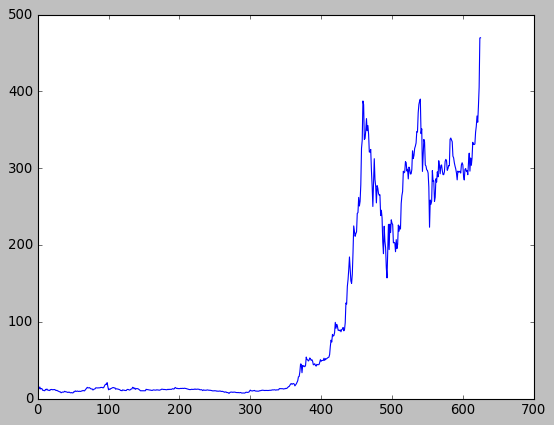

In [6]:
plt.plot(range(df.index.size), df.loc[:, 'PRICE'], '-')

In [7]:
price = df['PRICE'].values

In [8]:
price_train = price[0:525]
price_test = price[525:]

In [9]:
price_train.shape, price_test.shape

((525,), (101,))

In [10]:
INP_SEQ_LEN = 5
OUT_SEQ_LEN = 1

INPUT_TRAIN = []
OUTPUT_TRAIN = []

for i in range(price_train.shape[0] - (INP_SEQ_LEN + OUT_SEQ_LEN) + 1):
    inp_arr = np.array(price_train[i:i+INP_SEQ_LEN])
    out_arr = np.array(price_train[i+INP_SEQ_LEN])    
    if inp_arr.shape[0] == INP_SEQ_LEN and out_arr:
        INPUT_TRAIN.append(inp_arr)
        OUTPUT_TRAIN.append(out_arr)
    else:
        print('Could not append', inp_arr, out_arr)

INPUT_TEST = []
OUTPUT_TEST = []

for i in range(price_test.shape[0] - (INP_SEQ_LEN + OUT_SEQ_LEN) + 1):
    inp_arr = np.array(price_test[i:i+INP_SEQ_LEN])
    out_arr = np.array(price_test[i+INP_SEQ_LEN])    
    if inp_arr.shape[0] == INP_SEQ_LEN and out_arr:
        INPUT_TEST.append(inp_arr)
        OUTPUT_TEST.append(out_arr)
    else:
        print('Could not append', inp_arr, out_arr)

In [11]:
len(INPUT_TRAIN), len(OUTPUT_TRAIN), len(INPUT_TEST), len(OUTPUT_TEST), 

(520, 520, 96, 96)

In [12]:
features_train = np.vstack(INPUT_TRAIN)
features_train = features_train.reshape((features_train.shape[0], features_train.shape[1], 1))
labels_train = np.array(OUTPUT_TRAIN)

In [13]:
features_train.shape, labels_train.shape

((520, 5, 1), (520,))

In [14]:
def normalize(arr: np.ndarray):
    mu = np.mean(arr, axis=1)
    sigma = np.std(arr, axis=1)
    normalized = (arr - mu) /sigma
    return normalized, mu, sigma

In [15]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(LSTM(INP_SEQ_LEN, input_shape=(INP_SEQ_LEN,1)))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(optimizer='adam', loss='mse')

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x=features_train, y=labels_train, batch_size=100, epochs=20000)

Epoch 1/20000
520/520 [==============================] - 3s - loss: 11922.1042     
Epoch 2/20000
520/520 [==============================] - 0s - loss: 11914.6630     
Epoch 3/20000
520/520 [==============================] - 0s - loss: 11906.1474     
Epoch 4/20000
520/520 [==============================] - 0s - loss: 11899.9039     
Epoch 5/20000
520/520 [==============================] - 0s - loss: 11896.5753     
Epoch 6/20000
520/520 [==============================] - 0s - loss: 11893.9704     
Epoch 7/20000
520/520 [==============================] - 0s - loss: 11891.4957     
Epoch 8/20000
520/520 [==============================] - 0s - loss: 11889.1198     
Epoch 9/20000
520/520 [==============================] - 0s - loss: 11886.7779    
Epoch 10/20000
520/520 [==============================] - 0s - loss: 11884.5085    
Epoch 11/20000
520/520 [==============================] - 0s - loss: 11882.2950    
Epoch 12/20000
520/520 [==============================] - 0s - loss: 11880.11

520/520 [==============================] - 0s - loss: 11492.5791    
Epoch 98/20000
520/520 [==============================] - 0s - loss: 11489.8545    
Epoch 99/20000
520/520 [==============================] - 0s - loss: 11487.0534     
Epoch 100/20000
520/520 [==============================] - 0s - loss: 11484.3083    
Epoch 101/20000
520/520 [==============================] - 0s - loss: 11481.6303     
Epoch 102/20000
520/520 [==============================] - 0s - loss: 11478.9809     
Epoch 103/20000
520/520 [==============================] - 0s - loss: 11476.2895     
Epoch 104/20000
520/520 [==============================] - 0s - loss: 11473.5650     
Epoch 105/20000
520/520 [==============================] - 0s - loss: 11470.7696     
Epoch 106/20000
520/520 [==============================] - 0s - loss: 11468.1120     
Epoch 107/20000
520/520 [==============================] - 0s - loss: 11465.3344    
Epoch 108/20000
520/520 [==============================] - 0s - loss: 11462.

520/520 [==============================] - 0s - loss: 11073.5568     
Epoch 193/20000
520/520 [==============================] - 0s - loss: 11069.8398    
Epoch 194/20000
520/520 [==============================] - 0s - loss: 11066.3764    
Epoch 195/20000
520/520 [==============================] - 0s - loss: 11062.9839     
Epoch 196/20000
520/520 [==============================] - 0s - loss: 11059.3470    
Epoch 197/20000
520/520 [==============================] - 0s - loss: 11055.9437     
Epoch 198/20000
520/520 [==============================] - 0s - loss: 11052.2500     
Epoch 199/20000
520/520 [==============================] - 0s - loss: 11048.8909     
Epoch 200/20000
520/520 [==============================] - 0s - loss: 11045.3527     
Epoch 201/20000
520/520 [==============================] - 0s - loss: 11042.1797     
Epoch 202/20000
520/520 [==============================] - 0s - loss: 11038.7805     
Epoch 203/20000
520/520 [==============================] - 0s - loss: 110

520/520 [==============================] - 0s - loss: 10781.8748    
Epoch 288/20000
520/520 [==============================] - 0s - loss: 10779.1975     
Epoch 289/20000
520/520 [==============================] - 0s - loss: 10776.4308    
Epoch 290/20000
520/520 [==============================] - 0s - loss: 10773.6216     
Epoch 291/20000
520/520 [==============================] - 0s - loss: 10770.8392    
Epoch 292/20000
520/520 [==============================] - 0s - loss: 10768.2261     
Epoch 293/20000
520/520 [==============================] - 0s - loss: 10765.4707    
Epoch 294/20000
520/520 [==============================] - 0s - loss: 10762.8391    
Epoch 295/20000
520/520 [==============================] - 0s - loss: 10760.3251    
Epoch 296/20000
520/520 [==============================] - 0s - loss: 10757.6816     
Epoch 297/20000
520/520 [==============================] - 0s - loss: 10755.0317    
Epoch 298/20000
520/520 [==============================] - 0s - loss: 10752.3

520/520 [==============================] - 0s - loss: 10522.3098    
Epoch 383/20000
520/520 [==============================] - 0s - loss: 10519.7682    
Epoch 384/20000
520/520 [==============================] - 0s - loss: 10517.1966    
Epoch 385/20000
520/520 [==============================] - 0s - loss: 10514.5151     
Epoch 386/20000
520/520 [==============================] - 0s - loss: 10511.7960     
Epoch 387/20000
520/520 [==============================] - 0s - loss: 10509.0585     
Epoch 388/20000
520/520 [==============================] - 0s - loss: 10506.4157     
Epoch 389/20000
520/520 [==============================] - 0s - loss: 10503.6173     
Epoch 390/20000
520/520 [==============================] - 0s - loss: 10501.0106     
Epoch 391/20000
520/520 [==============================] - 0s - loss: 10498.4511    
Epoch 392/20000
520/520 [==============================] - 0s - loss: 10495.6953    
Epoch 393/20000
520/520 [==============================] - 0s - loss: 10493

520/520 [==============================] - 0s - loss: 10272.4914    
Epoch 478/20000
520/520 [==============================] - 0s - loss: 10269.7828    
Epoch 479/20000
520/520 [==============================] - 0s - loss: 10267.3501     
Epoch 480/20000
520/520 [==============================] - 0s - loss: 10264.7391     
Epoch 481/20000
520/520 [==============================] - 0s - loss: 10262.0027    
Epoch 482/20000
520/520 [==============================] - 0s - loss: 10259.5598     
Epoch 483/20000
520/520 [==============================] - 0s - loss: 10256.8585     
Epoch 484/20000
520/520 [==============================] - 0s - loss: 10254.3530     
Epoch 485/20000
520/520 [==============================] - 0s - loss: 10251.6996    
Epoch 486/20000
520/520 [==============================] - 0s - loss: 10249.2777     
Epoch 487/20000
520/520 [==============================] - 0s - loss: 10246.6092    
Epoch 488/20000
520/520 [==============================] - 0s - loss: 10244

520/520 [==============================] - 0s - loss: 10027.2941    
Epoch 573/20000
520/520 [==============================] - 0s - loss: 10024.8656    
Epoch 574/20000
520/520 [==============================] - 0s - loss: 10022.4006    
Epoch 575/20000
520/520 [==============================] - 0s - loss: 10019.9603     
Epoch 576/20000
520/520 [==============================] - 0s - loss: 10017.4821     
Epoch 577/20000
520/520 [==============================] - 0s - loss: 10015.1012     
Epoch 578/20000
520/520 [==============================] - 0s - loss: 10012.5439     
Epoch 579/20000
520/520 [==============================] - 0s - loss: 10010.0766     
Epoch 580/20000
520/520 [==============================] - 0s - loss: 10007.5282    
Epoch 581/20000
520/520 [==============================] - 0s - loss: 10005.0442    
Epoch 582/20000
520/520 [==============================] - 0s - loss: 10002.5711     
Epoch 583/20000
520/520 [==============================] - 0s - loss: 10000

520/520 [==============================] - 0s - loss: 9786.9917      
Epoch 668/20000
520/520 [==============================] - 0s - loss: 9784.5215      
Epoch 669/20000
520/520 [==============================] - 0s - loss: 9782.0607      
Epoch 670/20000
520/520 [==============================] - 0s - loss: 9779.4572     
Epoch 671/20000
520/520 [==============================] - 0s - loss: 9776.9572     
Epoch 672/20000
520/520 [==============================] - 0s - loss: 9774.5291      
Epoch 673/20000
520/520 [==============================] - 0s - loss: 9772.0468     
Epoch 674/20000
520/520 [==============================] - 0s - loss: 9769.6273     
Epoch 675/20000
520/520 [==============================] - 0s - loss: 9767.1043      
Epoch 676/20000
520/520 [==============================] - 0s - loss: 9764.6884      
Epoch 677/20000
520/520 [==============================] - 0s - loss: 9762.0430      
Epoch 678/20000
520/520 [==============================] - 0s - loss: 9759

520/520 [==============================] - 0s - loss: 9551.9619     
Epoch 764/20000
520/520 [==============================] - 0s - loss: 9549.6106     
Epoch 765/20000
520/520 [==============================] - 0s - loss: 9547.3617      
Epoch 766/20000
520/520 [==============================] - 0s - loss: 9544.8274      
Epoch 767/20000
520/520 [==============================] - 0s - loss: 9542.4375      
Epoch 768/20000
520/520 [==============================] - 0s - loss: 9540.1842      
Epoch 769/20000
520/520 [==============================] - 0s - loss: 9537.7248      
Epoch 770/20000
520/520 [==============================] - 0s - loss: 9535.2778     
Epoch 771/20000
520/520 [==============================] - 0s - loss: 9532.9742     
Epoch 772/20000
520/520 [==============================] - 0s - loss: 9530.5459      
Epoch 773/20000
520/520 [==============================] - 0s - loss: 9527.8902     
Epoch 774/20000
520/520 [==============================] - 0s - loss: 9525.

520/520 [==============================] - 0s - loss: 9319.2902     
Epoch 860/20000
520/520 [==============================] - 0s - loss: 9316.8822     
Epoch 861/20000
520/520 [==============================] - 0s - loss: 9314.4998      
Epoch 862/20000
520/520 [==============================] - 0s - loss: 9312.1157     
Epoch 863/20000
520/520 [==============================] - 0s - loss: 9309.7453      
Epoch 864/20000
520/520 [==============================] - 0s - loss: 9307.3096     
Epoch 865/20000
520/520 [==============================] - 0s - loss: 9304.9090     
Epoch 866/20000
520/520 [==============================] - 0s - loss: 9302.4301     
Epoch 867/20000
520/520 [==============================] - 0s - loss: 9300.0643     
Epoch 868/20000
520/520 [==============================] - 0s - loss: 9297.6432     
Epoch 869/20000
520/520 [==============================] - 0s - loss: 9295.3061      
Epoch 870/20000
520/520 [==============================] - 0s - loss: 9292.758

520/520 [==============================] - 0s - loss: 9089.9057     
Epoch 956/20000
520/520 [==============================] - 0s - loss: 9087.6512      
Epoch 957/20000
520/520 [==============================] - 0s - loss: 9085.2349     
Epoch 958/20000
520/520 [==============================] - 0s - loss: 9082.8932     
Epoch 959/20000
520/520 [==============================] - 0s - loss: 9080.5181      
Epoch 960/20000
520/520 [==============================] - 0s - loss: 9077.8175     
Epoch 961/20000
520/520 [==============================] - 0s - loss: 9075.4835     
Epoch 962/20000
520/520 [==============================] - 0s - loss: 9073.2100     
Epoch 963/20000
520/520 [==============================] - 0s - loss: 9070.7394     
Epoch 964/20000
520/520 [==============================] - 0s - loss: 9068.4538      
Epoch 965/20000
520/520 [==============================] - 0s - loss: 9066.0870      
Epoch 966/20000
520/520 [==============================] - 0s - loss: 9063.78

520/520 [==============================] - 0s - loss: 8866.8752     
Epoch 1051/20000
520/520 [==============================] - 0s - loss: 8864.6282      
Epoch 1052/20000
520/520 [==============================] - 0s - loss: 8862.3555     
Epoch 1053/20000
520/520 [==============================] - 0s - loss: 8859.9189     
Epoch 1054/20000
520/520 [==============================] - 0s - loss: 8857.5566     
Epoch 1055/20000
520/520 [==============================] - 0s - loss: 8855.1428     
Epoch 1056/20000
520/520 [==============================] - 0s - loss: 8852.6683     
Epoch 1057/20000
520/520 [==============================] - 0s - loss: 8850.2663      
Epoch 1058/20000
520/520 [==============================] - 0s - loss: 8847.8044      
Epoch 1059/20000
520/520 [==============================] - 0s - loss: 8845.3924     
Epoch 1060/20000
520/520 [==============================] - 0s - loss: 8843.0521      
Epoch 1061/20000
520/520 [==============================] - 0s - lo

520/520 [==============================] - 0s - loss: 8648.7878     
Epoch 1146/20000
520/520 [==============================] - 0s - loss: 8646.5257     
Epoch 1147/20000
520/520 [==============================] - 0s - loss: 8644.2491     
Epoch 1148/20000
520/520 [==============================] - 0s - loss: 8642.1195      
Epoch 1149/20000
520/520 [==============================] - 0s - loss: 8639.7115      
Epoch 1150/20000
520/520 [==============================] - 0s - loss: 8637.5109     
Epoch 1151/20000
520/520 [==============================] - 0s - loss: 8635.4451      
Epoch 1152/20000
520/520 [==============================] - 0s - loss: 8633.2532     
Epoch 1153/20000
520/520 [==============================] - 0s - loss: 8631.1079     
Epoch 1154/20000
520/520 [==============================] - 0s - loss: 8628.9871     
Epoch 1155/20000
520/520 [==============================] - 0s - loss: 8626.8046     
Epoch 1156/20000
520/520 [==============================] - 0s - los

520/520 [==============================] - 0s - loss: 8437.7976     
Epoch 1240/20000
520/520 [==============================] - 0s - loss: 8435.5870     
Epoch 1241/20000
520/520 [==============================] - 0s - loss: 8433.4242     
Epoch 1242/20000
520/520 [==============================] - 0s - loss: 8431.1954     
Epoch 1243/20000
520/520 [==============================] - 0s - loss: 8429.0777     
Epoch 1244/20000
520/520 [==============================] - 0s - loss: 8426.8459     
Epoch 1245/20000
520/520 [==============================] - 0s - loss: 8424.8358      
Epoch 1246/20000
520/520 [==============================] - 0s - loss: 8422.5702     
Epoch 1247/20000
520/520 [==============================] - 0s - loss: 8420.4581      
Epoch 1248/20000
520/520 [==============================] - 0s - loss: 8418.2608     
Epoch 1249/20000
520/520 [==============================] - 0s - loss: 8416.0661     
Epoch 1250/20000
520/520 [==============================] - 0s - loss

520/520 [==============================] - 0s - loss: 8230.2656      
Epoch 1335/20000
520/520 [==============================] - 0s - loss: 8228.1695     
Epoch 1336/20000
520/520 [==============================] - 0s - loss: 8225.9122     
Epoch 1337/20000
520/520 [==============================] - 0s - loss: 8223.6977     
Epoch 1338/20000
520/520 [==============================] - 0s - loss: 8221.6284     
Epoch 1339/20000
520/520 [==============================] - 0s - loss: 8219.4796     
Epoch 1340/20000
520/520 [==============================] - 0s - loss: 8217.4384     
Epoch 1341/20000
520/520 [==============================] - 0s - loss: 8215.2483     
Epoch 1342/20000
520/520 [==============================] - 0s - loss: 8213.0895     
Epoch 1343/20000
520/520 [==============================] - 0s - loss: 8210.7440     
Epoch 1344/20000
520/520 [==============================] - 0s - loss: 8208.4324     
Epoch 1345/20000
520/520 [==============================] - 0s - loss:

520/520 [==============================] - 0s - loss: 8027.7251     
Epoch 1430/20000
520/520 [==============================] - 0s - loss: 8025.3377     
Epoch 1431/20000
520/520 [==============================] - 0s - loss: 8023.2108     
Epoch 1432/20000
520/520 [==============================] - 0s - loss: 8020.8947     
Epoch 1433/20000
520/520 [==============================] - 0s - loss: 8018.8710     
Epoch 1434/20000
520/520 [==============================] - 0s - loss: 8016.8442     
Epoch 1435/20000
520/520 [==============================] - 0s - loss: 8014.7633      
Epoch 1436/20000
520/520 [==============================] - 0s - loss: 8012.7261      
Epoch 1437/20000
520/520 [==============================] - 0s - loss: 8010.3757     
Epoch 1438/20000
520/520 [==============================] - 0s - loss: 8008.2077     
Epoch 1439/20000
520/520 [==============================] - 0s - loss: 8005.9337     
Epoch 1440/20000
520/520 [==============================] - 0s - loss

520/520 [==============================] - 0s - loss: 7828.8061      
Epoch 1525/20000
520/520 [==============================] - 0s - loss: 7826.6777     
Epoch 1526/20000
520/520 [==============================] - 0s - loss: 7824.5970     
Epoch 1527/20000
520/520 [==============================] - 0s - loss: 7822.4928     
Epoch 1528/20000
520/520 [==============================] - 0s - loss: 7820.2836     
Epoch 1529/20000
520/520 [==============================] - 0s - loss: 7818.0428     
Epoch 1530/20000
520/520 [==============================] - 0s - loss: 7815.9903     
Epoch 1531/20000
520/520 [==============================] - 0s - loss: 7813.8711     
Epoch 1532/20000
520/520 [==============================] - 0s - loss: 7811.8818     
Epoch 1533/20000
520/520 [==============================] - 0s - loss: 7809.7388     
Epoch 1534/20000
520/520 [==============================] - 0s - loss: 7807.7356     
Epoch 1535/20000
520/520 [==============================] - 0s - loss:

520/520 [==============================] - 0s - loss: 7634.0386     
Epoch 1620/20000
520/520 [==============================] - 0s - loss: 7631.9916     
Epoch 1621/20000
520/520 [==============================] - 0s - loss: 7629.9357     
Epoch 1622/20000
520/520 [==============================] - 0s - loss: 7627.8981     
Epoch 1623/20000
520/520 [==============================] - 0s - loss: 7625.9346     
Epoch 1624/20000
520/520 [==============================] - 0s - loss: 7623.9062     
Epoch 1625/20000
520/520 [==============================] - 0s - loss: 7622.0032      
Epoch 1626/20000
520/520 [==============================] - 0s - loss: 7619.9109     
Epoch 1627/20000
520/520 [==============================] - 0s - loss: 7617.9119     
Epoch 1628/20000
520/520 [==============================] - 0s - loss: 7616.0090      
Epoch 1629/20000
520/520 [==============================] - 0s - loss: 7614.0418     
Epoch 1630/20000
520/520 [==============================] - 0s - loss

520/520 [==============================] - 0s - loss: 7444.2583     
Epoch 1715/20000
520/520 [==============================] - 0s - loss: 7442.1673      
Epoch 1716/20000
520/520 [==============================] - 0s - loss: 7439.8759     
Epoch 1717/20000
520/520 [==============================] - 0s - loss: 7437.8454      
Epoch 1718/20000
520/520 [==============================] - 0s - loss: 7435.7863     
Epoch 1719/20000
520/520 [==============================] - 0s - loss: 7433.8016     
Epoch 1720/20000
520/520 [==============================] - 0s - loss: 7431.7567     
Epoch 1721/20000
520/520 [==============================] - 0s - loss: 7429.7441     
Epoch 1722/20000
520/520 [==============================] - 0s - loss: 7427.7312     
Epoch 1723/20000
520/520 [==============================] - 0s - loss: 7425.8015     
Epoch 1724/20000
520/520 [==============================] - 0s - loss: 7423.8134     
Epoch 1725/20000
520/520 [==============================] - 0s - loss

520/520 [==============================] - 0s - loss: 7256.1773     
Epoch 1810/20000
520/520 [==============================] - 0s - loss: 7254.3487     
Epoch 1811/20000
520/520 [==============================] - 0s - loss: 7252.5277     
Epoch 1812/20000
520/520 [==============================] - 0s - loss: 7250.5138     
Epoch 1813/20000
520/520 [==============================] - 0s - loss: 7248.6133     
Epoch 1814/20000
520/520 [==============================] - 0s - loss: 7246.8018     
Epoch 1815/20000
520/520 [==============================] - 0s - loss: 7244.8576     
Epoch 1816/20000
520/520 [==============================] - 0s - loss: 7242.9309     
Epoch 1817/20000
520/520 [==============================] - 0s - loss: 7241.0503     
Epoch 1818/20000
520/520 [==============================] - 0s - loss: 7239.2365     
Epoch 1819/20000
520/520 [==============================] - 0s - loss: 7237.4650     
Epoch 1820/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 7070.0547     
Epoch 1905/20000
520/520 [==============================] - 0s - loss: 7068.2066     
Epoch 1906/20000
520/520 [==============================] - 0s - loss: 7066.1867     
Epoch 1907/20000
520/520 [==============================] - 0s - loss: 7064.3357     
Epoch 1908/20000
520/520 [==============================] - 0s - loss: 7062.3057     
Epoch 1909/20000
520/520 [==============================] - 0s - loss: 7060.3650     
Epoch 1910/20000
520/520 [==============================] - 0s - loss: 7058.3677     
Epoch 1911/20000
520/520 [==============================] - 0s - loss: 7056.3685     
Epoch 1912/20000
520/520 [==============================] - 0s - loss: 7054.4254     
Epoch 1913/20000
520/520 [==============================] - 0s - loss: 7052.5464     
Epoch 1914/20000
520/520 [==============================] - 0s - loss: 7050.6019     
Epoch 1915/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 6887.4659     
Epoch 2000/20000
520/520 [==============================] - 0s - loss: 6885.5052     
Epoch 2001/20000
520/520 [==============================] - 0s - loss: 6883.5944     
Epoch 2002/20000
520/520 [==============================] - 0s - loss: 6881.7525     
Epoch 2003/20000
520/520 [==============================] - 0s - loss: 6879.8034     
Epoch 2004/20000
520/520 [==============================] - 0s - loss: 6877.7123     
Epoch 2005/20000
520/520 [==============================] - 0s - loss: 6875.8228     
Epoch 2006/20000
520/520 [==============================] - 0s - loss: 6873.8306     
Epoch 2007/20000
520/520 [==============================] - 0s - loss: 6871.9845     
Epoch 2008/20000
520/520 [==============================] - 0s - loss: 6870.0943     
Epoch 2009/20000
520/520 [==============================] - 0s - loss: 6868.2973     
Epoch 2010/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 6706.7084     
Epoch 2095/20000
520/520 [==============================] - 0s - loss: 6704.8333     
Epoch 2096/20000
520/520 [==============================] - 0s - loss: 6702.9996     
Epoch 2097/20000
520/520 [==============================] - 0s - loss: 6700.9608     
Epoch 2098/20000
520/520 [==============================] - 0s - loss: 6699.0217     
Epoch 2099/20000
520/520 [==============================] - 0s - loss: 6697.0996     
Epoch 2100/20000
520/520 [==============================] - 0s - loss: 6695.2251     
Epoch 2101/20000
520/520 [==============================] - 0s - loss: 6693.3361     
Epoch 2102/20000
520/520 [==============================] - 0s - loss: 6691.4307     
Epoch 2103/20000
520/520 [==============================] - 0s - loss: 6689.5999     
Epoch 2104/20000
520/520 [==============================] - 0s - loss: 6687.7190     
Epoch 2105/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 6530.3669     
Epoch 2190/20000
520/520 [==============================] - 0s - loss: 6528.3855     
Epoch 2191/20000
520/520 [==============================] - 0s - loss: 6526.4957     
Epoch 2192/20000
520/520 [==============================] - 0s - loss: 6524.5715     
Epoch 2193/20000
520/520 [==============================] - 0s - loss: 6522.7262     
Epoch 2194/20000
520/520 [==============================] - 0s - loss: 6520.9234     
Epoch 2195/20000
520/520 [==============================] - 0s - loss: 6518.9890     
Epoch 2196/20000
520/520 [==============================] - 0s - loss: 6517.1826     
Epoch 2197/20000
520/520 [==============================] - 0s - loss: 6515.4083     
Epoch 2198/20000
520/520 [==============================] - 0s - loss: 6513.4410     
Epoch 2199/20000
520/520 [==============================] - 0s - loss: 6511.4896     
Epoch 2200/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 6355.3295     
Epoch 2285/20000
520/520 [==============================] - 0s - loss: 6353.6201     
Epoch 2286/20000
520/520 [==============================] - 0s - loss: 6351.9861     
Epoch 2287/20000
520/520 [==============================] - 0s - loss: 6350.2145     
Epoch 2288/20000
520/520 [==============================] - 0s - loss: 6348.4364     
Epoch 2289/20000
520/520 [==============================] - 0s - loss: 6346.7455     
Epoch 2290/20000
520/520 [==============================] - 0s - loss: 6345.0106     
Epoch 2291/20000
520/520 [==============================] - 0s - loss: 6343.1022     
Epoch 2292/20000
520/520 [==============================] - 0s - loss: 6341.3543     
Epoch 2293/20000
520/520 [==============================] - 0s - loss: 6339.4251     
Epoch 2294/20000
520/520 [==============================] - 0s - loss: 6337.7126     
Epoch 2295/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 6185.2800     
Epoch 2380/20000
520/520 [==============================] - 0s - loss: 6183.5503     
Epoch 2381/20000
520/520 [==============================] - 0s - loss: 6181.7711     
Epoch 2382/20000
520/520 [==============================] - 0s - loss: 6179.9637     
Epoch 2383/20000
520/520 [==============================] - 0s - loss: 6178.2543     
Epoch 2384/20000
520/520 [==============================] - 0s - loss: 6176.3101     
Epoch 2385/20000
520/520 [==============================] - 0s - loss: 6174.6822     
Epoch 2386/20000
520/520 [==============================] - 0s - loss: 6172.8489     
Epoch 2387/20000
520/520 [==============================] - 0s - loss: 6171.0305     
Epoch 2388/20000
520/520 [==============================] - 0s - loss: 6169.2101     
Epoch 2389/20000
520/520 [==============================] - 0s - loss: 6167.3581     
Epoch 2390/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 6018.1729     
Epoch 2475/20000
520/520 [==============================] - 0s - loss: 6016.4187     
Epoch 2476/20000
520/520 [==============================] - 0s - loss: 6014.7482     
Epoch 2477/20000
520/520 [==============================] - 0s - loss: 6012.9357     
Epoch 2478/20000
520/520 [==============================] - 0s - loss: 6011.2857     
Epoch 2479/20000
520/520 [==============================] - 0s - loss: 6009.4130     
Epoch 2480/20000
520/520 [==============================] - 0s - loss: 6007.6652     
Epoch 2481/20000
520/520 [==============================] - 0s - loss: 6005.9921     
Epoch 2482/20000
520/520 [==============================] - 0s - loss: 6004.2791     
Epoch 2483/20000
520/520 [==============================] - 0s - loss: 6002.5442     
Epoch 2484/20000
520/520 [==============================] - 0s - loss: 6000.9046     
Epoch 2485/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 5853.9322     
Epoch 2570/20000
520/520 [==============================] - 0s - loss: 5852.1630     
Epoch 2571/20000
520/520 [==============================] - 0s - loss: 5850.4980     
Epoch 2572/20000
520/520 [==============================] - 0s - loss: 5848.8263     
Epoch 2573/20000
520/520 [==============================] - 0s - loss: 5847.1927     
Epoch 2574/20000
520/520 [==============================] - 0s - loss: 5845.4424     
Epoch 2575/20000
520/520 [==============================] - 0s - loss: 5843.8550     
Epoch 2576/20000
520/520 [==============================] - 0s - loss: 5842.0758     
Epoch 2577/20000
520/520 [==============================] - 0s - loss: 5840.2858     
Epoch 2578/20000
520/520 [==============================] - 0s - loss: 5838.5322     
Epoch 2579/20000
520/520 [==============================] - 0s - loss: 5836.8356     
Epoch 2580/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 5693.9842     
Epoch 2665/20000
520/520 [==============================] - 0s - loss: 5692.2570     
Epoch 2666/20000
520/520 [==============================] - 0s - loss: 5690.5857     
Epoch 2667/20000
520/520 [==============================] - 0s - loss: 5689.0166     
Epoch 2668/20000
520/520 [==============================] - 0s - loss: 5687.3323     
Epoch 2669/20000
520/520 [==============================] - 0s - loss: 5685.6263     
Epoch 2670/20000
520/520 [==============================] - 0s - loss: 5683.8955     
Epoch 2671/20000
520/520 [==============================] - 0s - loss: 5682.1538     
Epoch 2672/20000
520/520 [==============================] - 0s - loss: 5680.5448     
Epoch 2673/20000
520/520 [==============================] - 0s - loss: 5678.8822     
Epoch 2674/20000
520/520 [==============================] - 0s - loss: 5677.3769     
Epoch 2675/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 5537.9847     
Epoch 2760/20000
520/520 [==============================] - 0s - loss: 5536.2109     
Epoch 2761/20000
520/520 [==============================] - 0s - loss: 5534.5263     
Epoch 2762/20000
520/520 [==============================] - 0s - loss: 5532.9125     
Epoch 2763/20000
520/520 [==============================] - 0s - loss: 5531.2893     
Epoch 2764/20000
520/520 [==============================] - 0s - loss: 5529.5215     
Epoch 2765/20000
520/520 [==============================] - 0s - loss: 5527.8126     
Epoch 2766/20000
520/520 [==============================] - 0s - loss: 5526.1594     
Epoch 2767/20000
520/520 [==============================] - 0s - loss: 5524.4826     
Epoch 2768/20000
520/520 [==============================] - 0s - loss: 5522.9383     
Epoch 2769/20000
520/520 [==============================] - 0s - loss: 5521.2487     
Epoch 2770/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 5382.6862     
Epoch 2855/20000
520/520 [==============================] - 0s - loss: 5381.3943     
Epoch 2856/20000
520/520 [==============================] - 0s - loss: 5379.5888     
Epoch 2857/20000
520/520 [==============================] - 0s - loss: 5377.9532     
Epoch 2858/20000
520/520 [==============================] - 0s - loss: 5376.2501     
Epoch 2859/20000
520/520 [==============================] - 0s - loss: 5374.5470     
Epoch 2860/20000
520/520 [==============================] - 0s - loss: 5372.9497     
Epoch 2861/20000
520/520 [==============================] - 0s - loss: 5371.5597     
Epoch 2862/20000
520/520 [==============================] - 0s - loss: 5369.7991     
Epoch 2863/20000
520/520 [==============================] - 0s - loss: 5368.1624     
Epoch 2864/20000
520/520 [==============================] - 0s - loss: 5366.6955     
Epoch 2865/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 5229.7473     
Epoch 2950/20000
520/520 [==============================] - 0s - loss: 5228.1272     
Epoch 2951/20000
520/520 [==============================] - 0s - loss: 5226.3925     
Epoch 2952/20000
520/520 [==============================] - 0s - loss: 5224.7509     
Epoch 2953/20000
520/520 [==============================] - 0s - loss: 5223.1657     
Epoch 2954/20000
520/520 [==============================] - 0s - loss: 5221.6221     
Epoch 2955/20000
520/520 [==============================] - 0s - loss: 5220.0537     
Epoch 2956/20000
520/520 [==============================] - 0s - loss: 5218.4269     
Epoch 2957/20000
520/520 [==============================] - 0s - loss: 5216.7950     
Epoch 2958/20000
520/520 [==============================] - 0s - loss: 5215.1654     
Epoch 2959/20000
520/520 [==============================] - 0s - loss: 5213.8167     
Epoch 2960/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 5079.9355     
Epoch 3045/20000
520/520 [==============================] - 0s - loss: 5078.3758     
Epoch 3046/20000
520/520 [==============================] - 0s - loss: 5076.7161     
Epoch 3047/20000
520/520 [==============================] - 0s - loss: 5075.2222     
Epoch 3048/20000
520/520 [==============================] - 0s - loss: 5073.6755     
Epoch 3049/20000
520/520 [==============================] - 0s - loss: 5072.1325     
Epoch 3050/20000
520/520 [==============================] - 0s - loss: 5070.4660     
Epoch 3051/20000
520/520 [==============================] - 0s - loss: 5068.8954     
Epoch 3052/20000
520/520 [==============================] - 0s - loss: 5067.4067     
Epoch 3053/20000
520/520 [==============================] - 0s - loss: 5065.7536     
Epoch 3054/20000
520/520 [==============================] - 0s - loss: 5064.1275     
Epoch 3055/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 4934.6230     
Epoch 3140/20000
520/520 [==============================] - 0s - loss: 4933.1670     
Epoch 3141/20000
520/520 [==============================] - 0s - loss: 4931.5209     
Epoch 3142/20000
520/520 [==============================] - 0s - loss: 4930.2246     
Epoch 3143/20000
520/520 [==============================] - 0s - loss: 4928.6178     
Epoch 3144/20000
520/520 [==============================] - 0s - loss: 4927.0494     
Epoch 3145/20000
520/520 [==============================] - 0s - loss: 4925.4588     
Epoch 3146/20000
520/520 [==============================] - 0s - loss: 4923.8025     
Epoch 3147/20000
520/520 [==============================] - 0s - loss: 4922.3395     
Epoch 3148/20000
520/520 [==============================] - 0s - loss: 4920.7945     
Epoch 3149/20000
520/520 [==============================] - 0s - loss: 4919.1963     
Epoch 3150/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 4792.0505     
Epoch 3235/20000
520/520 [==============================] - 0s - loss: 4790.5168     
Epoch 3236/20000
520/520 [==============================] - 0s - loss: 4789.0831     
Epoch 3237/20000
520/520 [==============================] - 0s - loss: 4787.7508     
Epoch 3238/20000
520/520 [==============================] - 0s - loss: 4786.2694     
Epoch 3239/20000
520/520 [==============================] - 0s - loss: 4784.6710     
Epoch 3240/20000
520/520 [==============================] - 0s - loss: 4783.1737     
Epoch 3241/20000
520/520 [==============================] - 0s - loss: 4781.7438     
Epoch 3242/20000
520/520 [==============================] - 0s - loss: 4780.2452     
Epoch 3243/20000
520/520 [==============================] - 0s - loss: 4778.7523     
Epoch 3244/20000
520/520 [==============================] - 0s - loss: 4777.3727     
Epoch 3245/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 4651.3645     
Epoch 3330/20000
520/520 [==============================] - 0s - loss: 4649.6921     
Epoch 3331/20000
520/520 [==============================] - 0s - loss: 4648.1446     
Epoch 3332/20000
520/520 [==============================] - 0s - loss: 4646.5005     
Epoch 3333/20000
520/520 [==============================] - 0s - loss: 4645.0157     
Epoch 3334/20000
520/520 [==============================] - 0s - loss: 4643.6913     
Epoch 3335/20000
520/520 [==============================] - 0s - loss: 4642.0545     
Epoch 3336/20000
520/520 [==============================] - 0s - loss: 4640.5359     
Epoch 3337/20000
520/520 [==============================] - 0s - loss: 4639.0414     
Epoch 3338/20000
520/520 [==============================] - 0s - loss: 4637.5551     
Epoch 3339/20000
520/520 [==============================] - 0s - loss: 4636.1936     
Epoch 3340/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 4511.7516     
Epoch 3425/20000
520/520 [==============================] - 0s - loss: 4510.3098     
Epoch 3426/20000
520/520 [==============================] - 0s - loss: 4509.0450     
Epoch 3427/20000
520/520 [==============================] - 0s - loss: 4507.6802     
Epoch 3428/20000
520/520 [==============================] - 0s - loss: 4506.3515     
Epoch 3429/20000
520/520 [==============================] - 0s - loss: 4504.9437     
Epoch 3430/20000
520/520 [==============================] - 0s - loss: 4503.6730     
Epoch 3431/20000
520/520 [==============================] - 0s - loss: 4502.2482     
Epoch 3432/20000
520/520 [==============================] - 0s - loss: 4501.0442     
Epoch 3433/20000
520/520 [==============================] - 0s - loss: 4499.6775     
Epoch 3434/20000
520/520 [==============================] - 0s - loss: 4498.1175     
Epoch 3435/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 4376.4730     
Epoch 3520/20000
520/520 [==============================] - 0s - loss: 4375.0568     
Epoch 3521/20000
520/520 [==============================] - 0s - loss: 4373.7148     
Epoch 3522/20000
520/520 [==============================] - 0s - loss: 4372.1030     
Epoch 3523/20000
520/520 [==============================] - 0s - loss: 4370.7780     
Epoch 3524/20000
520/520 [==============================] - 0s - loss: 4369.2885     
Epoch 3525/20000
520/520 [==============================] - 0s - loss: 4367.7878     
Epoch 3526/20000
520/520 [==============================] - 0s - loss: 4366.3132     
Epoch 3527/20000
520/520 [==============================] - 0s - loss: 4365.1558     
Epoch 3528/20000
520/520 [==============================] - 0s - loss: 4364.3020     
Epoch 3529/20000
520/520 [==============================] - 0s - loss: 4362.8362     
Epoch 3530/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 4242.3576     
Epoch 3615/20000
520/520 [==============================] - 0s - loss: 4240.9374     
Epoch 3616/20000
520/520 [==============================] - 0s - loss: 4239.6914     
Epoch 3617/20000
520/520 [==============================] - 0s - loss: 4238.2597     
Epoch 3618/20000
520/520 [==============================] - 0s - loss: 4236.9280     
Epoch 3619/20000
520/520 [==============================] - 0s - loss: 4235.6895     
Epoch 3620/20000
520/520 [==============================] - 0s - loss: 4234.8307     
Epoch 3621/20000
520/520 [==============================] - 0s - loss: 4233.5524     
Epoch 3622/20000
520/520 [==============================] - 0s - loss: 4231.5386     
Epoch 3623/20000
520/520 [==============================] - 0s - loss: 4230.1963     
Epoch 3624/20000
520/520 [==============================] - 0s - loss: 4228.8569     
Epoch 3625/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 4112.6247     
Epoch 3710/20000
520/520 [==============================] - 0s - loss: 4112.5806     
Epoch 3711/20000
520/520 [==============================] - 0s - loss: 4110.5145     
Epoch 3712/20000
520/520 [==============================] - 0s - loss: 4109.3230     
Epoch 3713/20000
520/520 [==============================] - 0s - loss: 4108.1061     
Epoch 3714/20000
520/520 [==============================] - 0s - loss: 4106.0336     
Epoch 3715/20000
520/520 [==============================] - 0s - loss: 4105.0254     
Epoch 3716/20000
520/520 [==============================] - 0s - loss: 4103.7774     
Epoch 3717/20000
520/520 [==============================] - 0s - loss: 4101.9769     
Epoch 3718/20000
520/520 [==============================] - 0s - loss: 4101.2547     
Epoch 3719/20000
520/520 [==============================] - 0s - loss: 4099.3873     
Epoch 3720/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3984.6188     
Epoch 3805/20000
520/520 [==============================] - 0s - loss: 3983.1889     
Epoch 3806/20000
520/520 [==============================] - 0s - loss: 3981.6542     
Epoch 3807/20000
520/520 [==============================] - 0s - loss: 3980.5823     
Epoch 3808/20000
520/520 [==============================] - 0s - loss: 3979.0737     
Epoch 3809/20000
520/520 [==============================] - 0s - loss: 3977.8419     
Epoch 3810/20000
520/520 [==============================] - 0s - loss: 3976.7860     
Epoch 3811/20000
520/520 [==============================] - 0s - loss: 3975.1653     
Epoch 3812/20000
520/520 [==============================] - 0s - loss: 3973.7693     
Epoch 3813/20000
520/520 [==============================] - 0s - loss: 3972.4792     
Epoch 3814/20000
520/520 [==============================] - 0s - loss: 3971.1190     
Epoch 3815/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3859.3027     
Epoch 3900/20000
520/520 [==============================] - 0s - loss: 3858.0023     
Epoch 3901/20000
520/520 [==============================] - 0s - loss: 3856.5164     
Epoch 3902/20000
520/520 [==============================] - 0s - loss: 3855.2953     
Epoch 3903/20000
520/520 [==============================] - 0s - loss: 3854.1775     
Epoch 3904/20000
520/520 [==============================] - 0s - loss: 3853.4185     
Epoch 3905/20000
520/520 [==============================] - 0s - loss: 3851.8359     
Epoch 3906/20000
520/520 [==============================] - 0s - loss: 3850.4563     
Epoch 3907/20000
520/520 [==============================] - 0s - loss: 3848.9024     
Epoch 3908/20000
520/520 [==============================] - 0s - loss: 3847.3886     
Epoch 3909/20000
520/520 [==============================] - 0s - loss: 3846.2233     
Epoch 3910/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3735.3591     
Epoch 3995/20000
520/520 [==============================] - 0s - loss: 3734.1188     
Epoch 3996/20000
520/520 [==============================] - 0s - loss: 3732.7576     
Epoch 3997/20000
520/520 [==============================] - 0s - loss: 3731.3529     
Epoch 3998/20000
520/520 [==============================] - 0s - loss: 3730.1379     
Epoch 3999/20000
520/520 [==============================] - 0s - loss: 3728.7570     
Epoch 4000/20000
520/520 [==============================] - 0s - loss: 3727.8270     
Epoch 4001/20000
520/520 [==============================] - 0s - loss: 3726.4400     
Epoch 4002/20000
520/520 [==============================] - 0s - loss: 3725.0439     
Epoch 4003/20000
520/520 [==============================] - 0s - loss: 3723.9134     
Epoch 4004/20000
520/520 [==============================] - 0s - loss: 3722.1828     
Epoch 4005/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3613.5829     
Epoch 4090/20000
520/520 [==============================] - 0s - loss: 3612.3772     
Epoch 4091/20000
520/520 [==============================] - 0s - loss: 3611.1478     
Epoch 4092/20000
520/520 [==============================] - 0s - loss: 3609.7955     
Epoch 4093/20000
520/520 [==============================] - 0s - loss: 3608.5270     
Epoch 4094/20000
520/520 [==============================] - 0s - loss: 3607.2183     
Epoch 4095/20000
520/520 [==============================] - 0s - loss: 3605.9846     
Epoch 4096/20000
520/520 [==============================] - 0s - loss: 3604.7297     
Epoch 4097/20000
520/520 [==============================] - 0s - loss: 3603.4676     
Epoch 4098/20000
520/520 [==============================] - 0s - loss: 3602.1831     
Epoch 4099/20000
520/520 [==============================] - 0s - loss: 3600.9281     
Epoch 4100/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3495.3191     
Epoch 4185/20000
520/520 [==============================] - 0s - loss: 3494.2002     
Epoch 4186/20000
520/520 [==============================] - 0s - loss: 3492.8003     
Epoch 4187/20000
520/520 [==============================] - 0s - loss: 3492.0084     
Epoch 4188/20000
520/520 [==============================] - 0s - loss: 3490.2864     
Epoch 4189/20000
520/520 [==============================] - 0s - loss: 3490.4105     
Epoch 4190/20000
520/520 [==============================] - 0s - loss: 3488.2582     
Epoch 4191/20000
520/520 [==============================] - 0s - loss: 3486.9326     
Epoch 4192/20000
520/520 [==============================] - 0s - loss: 3485.6741     
Epoch 4193/20000
520/520 [==============================] - 0s - loss: 3484.3555     
Epoch 4194/20000
520/520 [==============================] - 0s - loss: 3483.2249     
Epoch 4195/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3378.9824     
Epoch 4280/20000
520/520 [==============================] - 0s - loss: 3377.6273     
Epoch 4281/20000
520/520 [==============================] - 0s - loss: 3376.4376     
Epoch 4282/20000
520/520 [==============================] - 0s - loss: 3375.1216     
Epoch 4283/20000
520/520 [==============================] - 0s - loss: 3373.8943     
Epoch 4284/20000
520/520 [==============================] - 0s - loss: 3372.7195     
Epoch 4285/20000
520/520 [==============================] - 0s - loss: 3371.6248     
Epoch 4286/20000
520/520 [==============================] - 0s - loss: 3370.3615     
Epoch 4287/20000
520/520 [==============================] - 0s - loss: 3369.0856     
Epoch 4288/20000
520/520 [==============================] - 0s - loss: 3368.0808     
Epoch 4289/20000
520/520 [==============================] - 0s - loss: 3366.6547     
Epoch 4290/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3266.0695     
Epoch 4375/20000
520/520 [==============================] - 0s - loss: 3265.1299     
Epoch 4376/20000
520/520 [==============================] - 0s - loss: 3263.6529     
Epoch 4377/20000
520/520 [==============================] - 0s - loss: 3262.4718     
Epoch 4378/20000
520/520 [==============================] - 0s - loss: 3261.3807     
Epoch 4379/20000
520/520 [==============================] - 0s - loss: 3260.4069     
Epoch 4380/20000
520/520 [==============================] - 0s - loss: 3258.9994     
Epoch 4381/20000
520/520 [==============================] - 0s - loss: 3257.7080     
Epoch 4382/20000
520/520 [==============================] - 0s - loss: 3256.6462     
Epoch 4383/20000
520/520 [==============================] - 0s - loss: 3255.4912     
Epoch 4384/20000
520/520 [==============================] - 0s - loss: 3254.2219     
Epoch 4385/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3154.6159     
Epoch 4470/20000
520/520 [==============================] - 0s - loss: 3153.7276     
Epoch 4471/20000
520/520 [==============================] - 0s - loss: 3152.2332     
Epoch 4472/20000
520/520 [==============================] - 0s - loss: 3151.0302     
Epoch 4473/20000
520/520 [==============================] - 0s - loss: 3149.8343     
Epoch 4474/20000
520/520 [==============================] - 0s - loss: 3148.7315     
Epoch 4475/20000
520/520 [==============================] - 0s - loss: 3147.5592     
Epoch 4476/20000
520/520 [==============================] - 0s - loss: 3146.6273     
Epoch 4477/20000
520/520 [==============================] - 0s - loss: 3145.5178     
Epoch 4478/20000
520/520 [==============================] - 0s - loss: 3144.1023     
Epoch 4479/20000
520/520 [==============================] - 0s - loss: 3143.1628     
Epoch 4480/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 3046.1613     
Epoch 4565/20000
520/520 [==============================] - 0s - loss: 3045.2957     
Epoch 4566/20000
520/520 [==============================] - 0s - loss: 3043.9902     
Epoch 4567/20000
520/520 [==============================] - 0s - loss: 3042.8900     
Epoch 4568/20000
520/520 [==============================] - 0s - loss: 3041.7219     
Epoch 4569/20000
520/520 [==============================] - 0s - loss: 3040.5100     
Epoch 4570/20000
520/520 [==============================] - 0s - loss: 3039.4771     
Epoch 4571/20000
520/520 [==============================] - 0s - loss: 3038.3411     
Epoch 4572/20000
520/520 [==============================] - 0s - loss: 3037.1115     
Epoch 4573/20000
520/520 [==============================] - 0s - loss: 3036.1316     
Epoch 4574/20000
520/520 [==============================] - 0s - loss: 3034.9879     
Epoch 4575/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2940.3169     
Epoch 4660/20000
520/520 [==============================] - 0s - loss: 2939.2813     
Epoch 4661/20000
520/520 [==============================] - 0s - loss: 2938.1990     
Epoch 4662/20000
520/520 [==============================] - 0s - loss: 2936.8766     
Epoch 4663/20000
520/520 [==============================] - 0s - loss: 2935.8992     
Epoch 4664/20000
520/520 [==============================] - 0s - loss: 2934.9238     
Epoch 4665/20000
520/520 [==============================] - 0s - loss: 2933.7040     
Epoch 4666/20000
520/520 [==============================] - 0s - loss: 2932.6406     
Epoch 4667/20000
520/520 [==============================] - 0s - loss: 2931.7534     
Epoch 4668/20000
520/520 [==============================] - 0s - loss: 2930.3746     
Epoch 4669/20000
520/520 [==============================] - 0s - loss: 2929.1582     
Epoch 4670/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2835.9593     
Epoch 4755/20000
520/520 [==============================] - 0s - loss: 2834.9259     
Epoch 4756/20000
520/520 [==============================] - 0s - loss: 2833.8647     
Epoch 4757/20000
520/520 [==============================] - 0s - loss: 2832.8184     
Epoch 4758/20000
520/520 [==============================] - 0s - loss: 2831.7517     
Epoch 4759/20000
520/520 [==============================] - 0s - loss: 2830.6739     
Epoch 4760/20000
520/520 [==============================] - 0s - loss: 2829.5051     
Epoch 4761/20000
520/520 [==============================] - 0s - loss: 2828.5956     
Epoch 4762/20000
520/520 [==============================] - 0s - loss: 2827.1397     
Epoch 4763/20000
520/520 [==============================] - 0s - loss: 2826.3353     
Epoch 4764/20000
520/520 [==============================] - 0s - loss: 2825.1345     
Epoch 4765/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2735.1698     
Epoch 4850/20000
520/520 [==============================] - 0s - loss: 2734.2576     
Epoch 4851/20000
520/520 [==============================] - 0s - loss: 2732.9668     
Epoch 4852/20000
520/520 [==============================] - 0s - loss: 2731.8691     
Epoch 4853/20000
520/520 [==============================] - 0s - loss: 2730.9248     
Epoch 4854/20000
520/520 [==============================] - 0s - loss: 2729.7070     
Epoch 4855/20000
520/520 [==============================] - 0s - loss: 2728.7010     
Epoch 4856/20000
520/520 [==============================] - 0s - loss: 2727.5660     
Epoch 4857/20000
520/520 [==============================] - 0s - loss: 2726.4402     
Epoch 4858/20000
520/520 [==============================] - 0s - loss: 2725.3558     
Epoch 4859/20000
520/520 [==============================] - 0s - loss: 2724.2963     
Epoch 4860/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2635.4628     
Epoch 4945/20000
520/520 [==============================] - 0s - loss: 2634.5084     
Epoch 4946/20000
520/520 [==============================] - 0s - loss: 2633.2620     
Epoch 4947/20000
520/520 [==============================] - 0s - loss: 2632.6121     
Epoch 4948/20000
520/520 [==============================] - 0s - loss: 2631.2842     
Epoch 4949/20000
520/520 [==============================] - 0s - loss: 2630.7627     
Epoch 4950/20000
520/520 [==============================] - 0s - loss: 2629.4693     
Epoch 4951/20000
520/520 [==============================] - 0s - loss: 2628.2911     
Epoch 4952/20000
520/520 [==============================] - 0s - loss: 2627.2084     
Epoch 4953/20000
520/520 [==============================] - 0s - loss: 2626.1651     
Epoch 4954/20000
520/520 [==============================] - 0s - loss: 2625.1614     
Epoch 4955/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2539.8632     
Epoch 5040/20000
520/520 [==============================] - 0s - loss: 2538.4691     
Epoch 5041/20000
520/520 [==============================] - 0s - loss: 2537.5057     
Epoch 5042/20000
520/520 [==============================] - 0s - loss: 2536.5014     
Epoch 5043/20000
520/520 [==============================] - 0s - loss: 2535.2649     
Epoch 5044/20000
520/520 [==============================] - 0s - loss: 2534.4687     
Epoch 5045/20000
520/520 [==============================] - 0s - loss: 2533.2422     
Epoch 5046/20000
520/520 [==============================] - 0s - loss: 2533.0810     
Epoch 5047/20000
520/520 [==============================] - 0s - loss: 2531.8935     
Epoch 5048/20000
520/520 [==============================] - 0s - loss: 2530.3959     
Epoch 5049/20000
520/520 [==============================] - 0s - loss: 2529.6188     
Epoch 5050/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2445.0252     
Epoch 5135/20000
520/520 [==============================] - 0s - loss: 2444.2017     
Epoch 5136/20000
520/520 [==============================] - 0s - loss: 2442.8728     
Epoch 5137/20000
520/520 [==============================] - 0s - loss: 2441.9358     
Epoch 5138/20000
520/520 [==============================] - 0s - loss: 2441.0952     
Epoch 5139/20000
520/520 [==============================] - 0s - loss: 2439.9924     
Epoch 5140/20000
520/520 [==============================] - 0s - loss: 2439.2345     
Epoch 5141/20000
520/520 [==============================] - 0s - loss: 2438.2798     
Epoch 5142/20000
520/520 [==============================] - 0s - loss: 2437.2272     
Epoch 5143/20000
520/520 [==============================] - 0s - loss: 2436.2671     
Epoch 5144/20000
520/520 [==============================] - 0s - loss: 2435.3113     
Epoch 5145/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2354.0049     
Epoch 5230/20000
520/520 [==============================] - 0s - loss: 2353.1522     
Epoch 5231/20000
520/520 [==============================] - 0s - loss: 2352.1109     
Epoch 5232/20000
520/520 [==============================] - 0s - loss: 2351.2220     
Epoch 5233/20000
520/520 [==============================] - 0s - loss: 2350.1865     
Epoch 5234/20000
520/520 [==============================] - 0s - loss: 2349.4497     
Epoch 5235/20000
520/520 [==============================] - 0s - loss: 2348.3328     
Epoch 5236/20000
520/520 [==============================] - 0s - loss: 2347.4972     
Epoch 5237/20000
520/520 [==============================] - 0s - loss: 2346.4211     
Epoch 5238/20000
520/520 [==============================] - 0s - loss: 2345.4438     
Epoch 5239/20000
520/520 [==============================] - 0s - loss: 2344.7808     
Epoch 5240/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2266.5261     
Epoch 5324/20000
520/520 [==============================] - 0s - loss: 2265.2290     
Epoch 5325/20000
520/520 [==============================] - 0s - loss: 2265.8506     
Epoch 5326/20000
520/520 [==============================] - 0s - loss: 2264.1246     
Epoch 5327/20000
520/520 [==============================] - 0s - loss: 2262.8803     
Epoch 5328/20000
520/520 [==============================] - 0s - loss: 2261.7401     
Epoch 5329/20000
520/520 [==============================] - 0s - loss: 2261.0583     
Epoch 5330/20000
520/520 [==============================] - 0s - loss: 2259.8481     
Epoch 5331/20000
520/520 [==============================] - 0s - loss: 2259.0456     
Epoch 5332/20000
520/520 [==============================] - 0s - loss: 2257.8284     
Epoch 5333/20000
520/520 [==============================] - 0s - loss: 2257.3448     
Epoch 5334/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2179.9682     
Epoch 5419/20000
520/520 [==============================] - 0s - loss: 2179.1289     
Epoch 5420/20000
520/520 [==============================] - 0s - loss: 2178.7457     
Epoch 5421/20000
520/520 [==============================] - 0s - loss: 2177.6628     
Epoch 5422/20000
520/520 [==============================] - 0s - loss: 2176.6239     
Epoch 5423/20000
520/520 [==============================] - 0s - loss: 2175.5695     
Epoch 5424/20000
520/520 [==============================] - 0s - loss: 2174.5486     
Epoch 5425/20000
520/520 [==============================] - 0s - loss: 2173.9626     
Epoch 5426/20000
520/520 [==============================] - 0s - loss: 2173.7327     
Epoch 5427/20000
520/520 [==============================] - 0s - loss: 2173.0451     
Epoch 5428/20000
520/520 [==============================] - 0s - loss: 2171.2835     
Epoch 5429/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2095.4156     
Epoch 5514/20000
520/520 [==============================] - 0s - loss: 2094.7834     
Epoch 5515/20000
520/520 [==============================] - 0s - loss: 2093.5980     
Epoch 5516/20000
520/520 [==============================] - 0s - loss: 2092.7155     
Epoch 5517/20000
520/520 [==============================] - 0s - loss: 2092.2235     
Epoch 5518/20000
520/520 [==============================] - 0s - loss: 2091.2414     
Epoch 5519/20000
520/520 [==============================] - 0s - loss: 2090.1014     
Epoch 5520/20000
520/520 [==============================] - 0s - loss: 2089.3264     
Epoch 5521/20000
520/520 [==============================] - 0s - loss: 2088.3141     
Epoch 5522/20000
520/520 [==============================] - 0s - loss: 2087.5572     
Epoch 5523/20000
520/520 [==============================] - 0s - loss: 2086.7508     
Epoch 5524/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 2013.4787     
Epoch 5609/20000
520/520 [==============================] - 0s - loss: 2012.7565     
Epoch 5610/20000
520/520 [==============================] - 0s - loss: 2011.7514     
Epoch 5611/20000
520/520 [==============================] - 0s - loss: 2011.0193     
Epoch 5612/20000
520/520 [==============================] - 0s - loss: 2010.0009     
Epoch 5613/20000
520/520 [==============================] - 0s - loss: 2009.1700     
Epoch 5614/20000
520/520 [==============================] - 0s - loss: 2008.3598     
Epoch 5615/20000
520/520 [==============================] - 0s - loss: 2007.1878     
Epoch 5616/20000
520/520 [==============================] - 0s - loss: 2006.4070     
Epoch 5617/20000
520/520 [==============================] - 0s - loss: 2005.4191     
Epoch 5618/20000
520/520 [==============================] - 0s - loss: 2004.6976     
Epoch 5619/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 1935.0370     
Epoch 5704/20000
520/520 [==============================] - 0s - loss: 1934.5057    
Epoch 5705/20000
520/520 [==============================] - 0s - loss: 1933.2831     
Epoch 5706/20000
520/520 [==============================] - 0s - loss: 1932.3537     
Epoch 5707/20000
520/520 [==============================] - 0s - loss: 1931.3174     
Epoch 5708/20000
520/520 [==============================] - 0s - loss: 1930.7081     
Epoch 5709/20000
520/520 [==============================] - 0s - loss: 1929.7441     
Epoch 5710/20000
520/520 [==============================] - 0s - loss: 1928.9322     
Epoch 5711/20000
520/520 [==============================] - 0s - loss: 1927.9961     
Epoch 5712/20000
520/520 [==============================] - 0s - loss: 1927.2128     
Epoch 5713/20000
520/520 [==============================] - 0s - loss: 1926.5549     
Epoch 5714/20000
520/520 [==============================] - 0s - loss: 1

520/520 [==============================] - 0s - loss: 1858.1088     
Epoch 5799/20000
520/520 [==============================] - 0s - loss: 1857.2922     
Epoch 5800/20000
520/520 [==============================] - 0s - loss: 1856.4308     
Epoch 5801/20000
520/520 [==============================] - 0s - loss: 1855.5987     
Epoch 5802/20000
520/520 [==============================] - 0s - loss: 1854.7316    
Epoch 5803/20000
520/520 [==============================] - 0s - loss: 1853.9512     
Epoch 5804/20000
520/520 [==============================] - 0s - loss: 1853.1681     
Epoch 5805/20000
520/520 [==============================] - 0s - loss: 1853.6638     
Epoch 5806/20000
520/520 [==============================] - 0s - loss: 1852.2531     
Epoch 5807/20000
520/520 [==============================] - 0s - loss: 1850.9548     
Epoch 5808/20000
520/520 [==============================] - 0s - loss: 1850.3135    
Epoch 5809/20000
520/520 [==============================] - 0s - loss: 18

520/520 [==============================] - 0s - loss: 1783.7385     
Epoch 5894/20000
520/520 [==============================] - 0s - loss: 1782.6162     
Epoch 5895/20000
520/520 [==============================] - 0s - loss: 1781.7378     
Epoch 5896/20000
520/520 [==============================] - 0s - loss: 1781.1446     
Epoch 5897/20000
520/520 [==============================] - 0s - loss: 1780.3025     
Epoch 5898/20000
520/520 [==============================] - 0s - loss: 1779.4499     
Epoch 5899/20000
520/520 [==============================] - 0s - loss: 1778.7000     
Epoch 5900/20000
520/520 [==============================] - 0s - loss: 1777.8443     
Epoch 5901/20000
520/520 [==============================] - 0s - loss: 1777.0930    
Epoch 5902/20000
520/520 [==============================] - 0s - loss: 1776.5935     
Epoch 5903/20000
520/520 [==============================] - 0s - loss: 1775.8068     
Epoch 5904/20000
520/520 [==============================] - 0s - loss: 1

520/520 [==============================] - 0s - loss: 1710.3657     
Epoch 5989/20000
520/520 [==============================] - 0s - loss: 1709.5249     
Epoch 5990/20000
520/520 [==============================] - 0s - loss: 1708.7337     
Epoch 5991/20000
520/520 [==============================] - 0s - loss: 1707.9776     
Epoch 5992/20000
520/520 [==============================] - 0s - loss: 1707.1806     
Epoch 5993/20000
520/520 [==============================] - 0s - loss: 1706.3970    
Epoch 5994/20000
520/520 [==============================] - 0s - loss: 1705.6844     
Epoch 5995/20000
520/520 [==============================] - 0s - loss: 1704.7952     
Epoch 5996/20000
520/520 [==============================] - 0s - loss: 1703.9941     
Epoch 5997/20000
520/520 [==============================] - 0s - loss: 1703.3662     
Epoch 5998/20000
520/520 [==============================] - 0s - loss: 1702.6218     
Epoch 5999/20000
520/520 [==============================] - 0s - loss: 1

520/520 [==============================] - 0s - loss: 1640.3432     
Epoch 6084/20000
520/520 [==============================] - 0s - loss: 1639.4768     
Epoch 6085/20000
520/520 [==============================] - 0s - loss: 1638.7457     
Epoch 6086/20000
520/520 [==============================] - 0s - loss: 1638.0154     
Epoch 6087/20000
520/520 [==============================] - 0s - loss: 1637.3071     
Epoch 6088/20000
520/520 [==============================] - 0s - loss: 1636.5387     
Epoch 6089/20000
520/520 [==============================] - 0s - loss: 1635.7888     
Epoch 6090/20000
520/520 [==============================] - 0s - loss: 1635.0868     
Epoch 6091/20000
520/520 [==============================] - 0s - loss: 1634.4733    
Epoch 6092/20000
520/520 [==============================] - 0s - loss: 1633.8248     
Epoch 6093/20000
520/520 [==============================] - 0s - loss: 1632.8386     
Epoch 6094/20000
520/520 [==============================] - 0s - loss: 1

520/520 [==============================] - 0s - loss: 1572.1304    
Epoch 6179/20000
520/520 [==============================] - 0s - loss: 1571.2934     
Epoch 6180/20000
520/520 [==============================] - 0s - loss: 1570.7651     
Epoch 6181/20000
520/520 [==============================] - 0s - loss: 1569.9209    
Epoch 6182/20000
520/520 [==============================] - 0s - loss: 1569.1452    
Epoch 6183/20000
520/520 [==============================] - 0s - loss: 1568.4754     
Epoch 6184/20000
520/520 [==============================] - 0s - loss: 1567.7964     
Epoch 6185/20000
520/520 [==============================] - 0s - loss: 1566.8657     
Epoch 6186/20000
520/520 [==============================] - 0s - loss: 1566.1561     
Epoch 6187/20000
520/520 [==============================] - 0s - loss: 1565.4772     
Epoch 6188/20000
520/520 [==============================] - 0s - loss: 1565.2437     
Epoch 6189/20000
520/520 [==============================] - 0s - loss: 156

520/520 [==============================] - 0s - loss: 1506.2235     
Epoch 6273/20000
520/520 [==============================] - 0s - loss: 1505.5229     
Epoch 6274/20000
520/520 [==============================] - 0s - loss: 1504.9866     
Epoch 6275/20000
520/520 [==============================] - 0s - loss: 1504.2264     
Epoch 6276/20000
520/520 [==============================] - 0s - loss: 1503.8506     
Epoch 6277/20000
520/520 [==============================] - 0s - loss: 1503.0809     
Epoch 6278/20000
520/520 [==============================] - 0s - loss: 1502.5223     
Epoch 6279/20000
520/520 [==============================] - 0s - loss: 1501.7218    
Epoch 6280/20000
520/520 [==============================] - 0s - loss: 1501.2363     
Epoch 6281/20000
520/520 [==============================] - 0s - loss: 1500.3149     
Epoch 6282/20000
520/520 [==============================] - 0s - loss: 1500.0398    
Epoch 6283/20000
520/520 [==============================] - 0s - loss: 14

520/520 [==============================] - 0s - loss: 1443.3388     
Epoch 6368/20000
520/520 [==============================] - 0s - loss: 1442.7043     
Epoch 6369/20000
520/520 [==============================] - 0s - loss: 1442.0392     
Epoch 6370/20000
520/520 [==============================] - 0s - loss: 1441.3054     
Epoch 6371/20000
520/520 [==============================] - 0s - loss: 1440.5993     
Epoch 6372/20000
520/520 [==============================] - 0s - loss: 1440.2755     
Epoch 6373/20000
520/520 [==============================] - 0s - loss: 1439.6149     
Epoch 6374/20000
520/520 [==============================] - 0s - loss: 1438.5881     
Epoch 6375/20000
520/520 [==============================] - 0s - loss: 1438.3218     
Epoch 6376/20000
520/520 [==============================] - 0s - loss: 1437.3090     
Epoch 6377/20000
520/520 [==============================] - 0s - loss: 1436.5117     
Epoch 6378/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 1382.0485     
Epoch 6463/20000
520/520 [==============================] - 0s - loss: 1381.8539     
Epoch 6464/20000
520/520 [==============================] - 0s - loss: 1380.4834     
Epoch 6465/20000
520/520 [==============================] - 0s - loss: 1381.0316    
Epoch 6466/20000
520/520 [==============================] - 0s - loss: 1379.9733     
Epoch 6467/20000
520/520 [==============================] - 0s - loss: 1379.0847     
Epoch 6468/20000
520/520 [==============================] - 0s - loss: 1378.2015     
Epoch 6469/20000
520/520 [==============================] - 0s - loss: 1377.5133     
Epoch 6470/20000
520/520 [==============================] - 0s - loss: 1377.0772     
Epoch 6471/20000
520/520 [==============================] - 0s - loss: 1376.2058     
Epoch 6472/20000
520/520 [==============================] - 0s - loss: 1375.5891     
Epoch 6473/20000
520/520 [==============================] - 0s - loss: 1

520/520 [==============================] - 0s - loss: 1324.2152     
Epoch 6558/20000
520/520 [==============================] - 0s - loss: 1323.5343    
Epoch 6559/20000
520/520 [==============================] - 0s - loss: 1322.8678     
Epoch 6560/20000
520/520 [==============================] - 0s - loss: 1322.4830     
Epoch 6561/20000
520/520 [==============================] - 0s - loss: 1321.7520     
Epoch 6562/20000
520/520 [==============================] - 0s - loss: 1320.9749     
Epoch 6563/20000
520/520 [==============================] - 0s - loss: 1320.5674     
Epoch 6564/20000
520/520 [==============================] - 0s - loss: 1319.8807     
Epoch 6565/20000
520/520 [==============================] - 0s - loss: 1319.2772     
Epoch 6566/20000
520/520 [==============================] - 0s - loss: 1318.6393     
Epoch 6567/20000
520/520 [==============================] - 0s - loss: 1318.0848     
Epoch 6568/20000
520/520 [==============================] - 0s - loss: 1

520/520 [==============================] - 0s - loss: 1267.2528     
Epoch 6653/20000
520/520 [==============================] - 0s - loss: 1266.8216     
Epoch 6654/20000
520/520 [==============================] - 0s - loss: 1266.1307     
Epoch 6655/20000
520/520 [==============================] - 0s - loss: 1265.9524     
Epoch 6656/20000
520/520 [==============================] - 0s - loss: 1264.9740     
Epoch 6657/20000
520/520 [==============================] - 0s - loss: 1264.9319     
Epoch 6658/20000
520/520 [==============================] - 0s - loss: 1263.8123     
Epoch 6659/20000
520/520 [==============================] - 0s - loss: 1264.0783     
Epoch 6660/20000
520/520 [==============================] - 0s - loss: 1262.8385     
Epoch 6661/20000
520/520 [==============================] - 0s - loss: 1262.2642     
Epoch 6662/20000
520/520 [==============================] - 0s - loss: 1262.0818     
Epoch 6663/20000
520/520 [==============================] - 0s - loss: 

520/520 [==============================] - 0s - loss: 1212.3120     
Epoch 6748/20000
520/520 [==============================] - 0s - loss: 1211.6905    
Epoch 6749/20000
520/520 [==============================] - 0s - loss: 1211.0290     
Epoch 6750/20000
520/520 [==============================] - 0s - loss: 1210.8520    
Epoch 6751/20000
520/520 [==============================] - 0s - loss: 1209.8303     
Epoch 6752/20000
520/520 [==============================] - 0s - loss: 1209.6649     
Epoch 6753/20000
520/520 [==============================] - 0s - loss: 1208.6034    
Epoch 6754/20000
520/520 [==============================] - 0s - loss: 1208.2688     
Epoch 6755/20000
520/520 [==============================] - 0s - loss: 1207.6759     
Epoch 6756/20000
520/520 [==============================] - 0s - loss: 1206.8645     
Epoch 6757/20000
520/520 [==============================] - 0s - loss: 1206.3264     
Epoch 6758/20000
520/520 [==============================] - 0s - loss: 120

520/520 [==============================] - 0s - loss: 1158.0181    
Epoch 6843/20000
520/520 [==============================] - 0s - loss: 1157.7659     
Epoch 6844/20000
520/520 [==============================] - 0s - loss: 1157.9516     
Epoch 6845/20000
520/520 [==============================] - 0s - loss: 1157.4095     
Epoch 6846/20000
520/520 [==============================] - 0s - loss: 1155.9983     
Epoch 6847/20000
520/520 [==============================] - 0s - loss: 1155.2804     
Epoch 6848/20000
520/520 [==============================] - 0s - loss: 1154.7190     
Epoch 6849/20000
520/520 [==============================] - 0s - loss: 1154.6306    
Epoch 6850/20000
520/520 [==============================] - 0s - loss: 1153.9681    
Epoch 6851/20000
520/520 [==============================] - 0s - loss: 1153.1408     
Epoch 6852/20000
520/520 [==============================] - 0s - loss: 1153.0952     
Epoch 6853/20000
520/520 [==============================] - 0s - loss: 115

520/520 [==============================] - 0s - loss: 1106.5073    
Epoch 6938/20000
520/520 [==============================] - 0s - loss: 1105.6136     
Epoch 6939/20000
520/520 [==============================] - 0s - loss: 1105.3896    
Epoch 6940/20000
520/520 [==============================] - 0s - loss: 1104.3951     
Epoch 6941/20000
520/520 [==============================] - 0s - loss: 1104.6695     
Epoch 6942/20000
520/520 [==============================] - 0s - loss: 1104.6262    
Epoch 6943/20000
520/520 [==============================] - 0s - loss: 1103.6758     
Epoch 6944/20000
520/520 [==============================] - 0s - loss: 1103.0846     
Epoch 6945/20000
520/520 [==============================] - 0s - loss: 1102.9276     
Epoch 6946/20000
520/520 [==============================] - 0s - loss: 1101.5948    
Epoch 6947/20000
520/520 [==============================] - 0s - loss: 1101.3742     
Epoch 6948/20000
520/520 [==============================] - 0s - loss: 1102

520/520 [==============================] - 0s - loss: 1057.1361     
Epoch 7033/20000
520/520 [==============================] - 0s - loss: 1055.7339    
Epoch 7034/20000
520/520 [==============================] - 0s - loss: 1055.6703    
Epoch 7035/20000
520/520 [==============================] - 0s - loss: 1054.3195    
Epoch 7036/20000
520/520 [==============================] - 0s - loss: 1055.1590     
Epoch 7037/20000
520/520 [==============================] - 0s - loss: 1054.2214     
Epoch 7038/20000
520/520 [==============================] - 0s - loss: 1056.4838    
Epoch 7039/20000
520/520 [==============================] - 0s - loss: 1055.1207    
Epoch 7040/20000
520/520 [==============================] - 0s - loss: 1053.2108    
Epoch 7041/20000
520/520 [==============================] - 0s - loss: 1052.1682    
Epoch 7042/20000
520/520 [==============================] - 0s - loss: 1051.4654     
Epoch 7043/20000
520/520 [==============================] - 0s - loss: 1051.55

520/520 [==============================] - 0s - loss: 1009.2773    
Epoch 7128/20000
520/520 [==============================] - 0s - loss: 1012.3021    
Epoch 7129/20000
520/520 [==============================] - 0s - loss: 1009.3125    
Epoch 7130/20000
520/520 [==============================] - 0s - loss: 1009.9213     
Epoch 7131/20000
520/520 [==============================] - 0s - loss: 1007.6783    
Epoch 7132/20000
520/520 [==============================] - 0s - loss: 1011.0447    
Epoch 7133/20000
520/520 [==============================] - 0s - loss: 1004.9789    
Epoch 7134/20000
520/520 [==============================] - 0s - loss: 1010.1157    
Epoch 7135/20000
520/520 [==============================] - 0s - loss: 1009.2303     
Epoch 7136/20000
520/520 [==============================] - 0s - loss: 1007.8305     
Epoch 7137/20000
520/520 [==============================] - 0s - loss: 1009.8272     
Epoch 7138/20000
520/520 [==============================] - 0s - loss: 1009.59

520/520 [==============================] - 0s - loss: 963.8102     
Epoch 7224/20000
520/520 [==============================] - 0s - loss: 963.5737     
Epoch 7225/20000
520/520 [==============================] - 0s - loss: 962.6265      
Epoch 7226/20000
520/520 [==============================] - 0s - loss: 962.7019     
Epoch 7227/20000
520/520 [==============================] - 0s - loss: 962.0274     
Epoch 7228/20000
520/520 [==============================] - 0s - loss: 961.4389     
Epoch 7229/20000
520/520 [==============================] - 0s - loss: 960.9512     
Epoch 7230/20000
520/520 [==============================] - 0s - loss: 960.3045      
Epoch 7231/20000
520/520 [==============================] - 0s - loss: 959.8346      
Epoch 7232/20000
520/520 [==============================] - 0s - loss: 959.8750      
Epoch 7233/20000
520/520 [==============================] - 0s - loss: 958.7762     
Epoch 7234/20000
520/520 [==============================] - 0s - loss: 959.135

520/520 [==============================] - 0s - loss: 919.3635     
Epoch 7320/20000
520/520 [==============================] - 0s - loss: 918.3915      
Epoch 7321/20000
520/520 [==============================] - 0s - loss: 918.1787     
Epoch 7322/20000
520/520 [==============================] - 0s - loss: 917.6482     
Epoch 7323/20000
520/520 [==============================] - 0s - loss: 917.2078     
Epoch 7324/20000
520/520 [==============================] - 0s - loss: 917.1445     
Epoch 7325/20000
520/520 [==============================] - 0s - loss: 916.7382      
Epoch 7326/20000
520/520 [==============================] - 0s - loss: 916.1623      
Epoch 7327/20000
520/520 [==============================] - 0s - loss: 915.3840     
Epoch 7328/20000
520/520 [==============================] - 0s - loss: 914.9534     
Epoch 7329/20000
520/520 [==============================] - 0s - loss: 914.4709      
Epoch 7330/20000
520/520 [==============================] - 0s - loss: 915.533

520/520 [==============================] - 0s - loss: 878.0675     
Epoch 7416/20000
520/520 [==============================] - 0s - loss: 876.3241     
Epoch 7417/20000
520/520 [==============================] - 0s - loss: 878.0120     
Epoch 7418/20000
520/520 [==============================] - 0s - loss: 876.4797     
Epoch 7419/20000
520/520 [==============================] - 0s - loss: 875.3644      
Epoch 7420/20000
520/520 [==============================] - 0s - loss: 874.9357     
Epoch 7421/20000
520/520 [==============================] - 0s - loss: 874.7247      
Epoch 7422/20000
520/520 [==============================] - 0s - loss: 874.2367      
Epoch 7423/20000
520/520 [==============================] - 0s - loss: 874.6547      
Epoch 7424/20000
520/520 [==============================] - 0s - loss: 873.8471     
Epoch 7425/20000
520/520 [==============================] - 0s - loss: 874.5881     
Epoch 7426/20000
520/520 [==============================] - 0s - loss: 872.188

520/520 [==============================] - 0s - loss: 836.5195     
Epoch 7512/20000
520/520 [==============================] - 0s - loss: 836.3863     
Epoch 7513/20000
520/520 [==============================] - 0s - loss: 835.9111     
Epoch 7514/20000
520/520 [==============================] - 0s - loss: 836.0073     
Epoch 7515/20000
520/520 [==============================] - 0s - loss: 837.2004     
Epoch 7516/20000
520/520 [==============================] - 0s - loss: 834.6730      
Epoch 7517/20000
520/520 [==============================] - 0s - loss: 834.5633     
Epoch 7518/20000
520/520 [==============================] - 0s - loss: 837.1878     
Epoch 7519/20000
520/520 [==============================] - 0s - loss: 835.9646     
Epoch 7520/20000
520/520 [==============================] - 0s - loss: 834.9125      
Epoch 7521/20000
520/520 [==============================] - 0s - loss: 834.2646     
Epoch 7522/20000
520/520 [==============================] - 0s - loss: 831.5610 

520/520 [==============================] - 0s - loss: 799.2707     
Epoch 7608/20000
520/520 [==============================] - 0s - loss: 797.7037      
Epoch 7609/20000
520/520 [==============================] - 0s - loss: 797.4471     
Epoch 7610/20000
520/520 [==============================] - 0s - loss: 797.8013     
Epoch 7611/20000
520/520 [==============================] - 0s - loss: 797.1198      
Epoch 7612/20000
520/520 [==============================] - 0s - loss: 797.3469     
Epoch 7613/20000
520/520 [==============================] - 0s - loss: 796.2276      
Epoch 7614/20000
520/520 [==============================] - 0s - loss: 796.0200     
Epoch 7615/20000
520/520 [==============================] - 0s - loss: 796.1153      
Epoch 7616/20000
520/520 [==============================] - 0s - loss: 794.3860      
Epoch 7617/20000
520/520 [==============================] - 0s - loss: 795.3226      
Epoch 7618/20000
520/520 [==============================] - 0s - loss: 794.3

520/520 [==============================] - 0s - loss: 761.5970      
Epoch 7704/20000
520/520 [==============================] - 0s - loss: 762.4526     
Epoch 7705/20000
520/520 [==============================] - 0s - loss: 763.9462      
Epoch 7706/20000
520/520 [==============================] - 0s - loss: 761.2235     
Epoch 7707/20000
520/520 [==============================] - 0s - loss: 760.1995     
Epoch 7708/20000
520/520 [==============================] - 0s - loss: 759.7391     
Epoch 7709/20000
520/520 [==============================] - 0s - loss: 759.1782      
Epoch 7710/20000
520/520 [==============================] - 0s - loss: 758.7291     
Epoch 7711/20000
520/520 [==============================] - 0s - loss: 758.6063     
Epoch 7712/20000
520/520 [==============================] - 0s - loss: 758.0532      
Epoch 7713/20000
520/520 [==============================] - 0s - loss: 758.6134      
Epoch 7714/20000
520/520 [==============================] - 0s - loss: 757.62

520/520 [==============================] - 0s - loss: 726.1527     
Epoch 7800/20000
520/520 [==============================] - 0s - loss: 730.2311     
Epoch 7801/20000
520/520 [==============================] - 0s - loss: 727.5808      
Epoch 7802/20000
520/520 [==============================] - 0s - loss: 726.3204     
Epoch 7803/20000
520/520 [==============================] - 0s - loss: 726.0164     
Epoch 7804/20000
520/520 [==============================] - 0s - loss: 723.2624     
Epoch 7805/20000
520/520 [==============================] - 0s - loss: 723.8567     
Epoch 7806/20000
520/520 [==============================] - 0s - loss: 723.3821     
Epoch 7807/20000
520/520 [==============================] - 0s - loss: 722.5571     
Epoch 7808/20000
520/520 [==============================] - 0s - loss: 722.5512     
Epoch 7809/20000
520/520 [==============================] - 0s - loss: 721.6515     
Epoch 7810/20000
520/520 [==============================] - 0s - loss: 721.8853  

520/520 [==============================] - 0s - loss: 689.9517     
Epoch 7896/20000
520/520 [==============================] - 0s - loss: 691.0843     
Epoch 7897/20000
520/520 [==============================] - 0s - loss: 688.9455      
Epoch 7898/20000
520/520 [==============================] - 0s - loss: 689.7184     
Epoch 7899/20000
520/520 [==============================] - 0s - loss: 688.4151     
Epoch 7900/20000
520/520 [==============================] - 0s - loss: 688.1544     
Epoch 7901/20000
520/520 [==============================] - 0s - loss: 688.4417     
Epoch 7902/20000
520/520 [==============================] - 0s - loss: 687.4372     
Epoch 7903/20000
520/520 [==============================] - 0s - loss: 687.8646     
Epoch 7904/20000
520/520 [==============================] - 0s - loss: 688.3344     
Epoch 7905/20000
520/520 [==============================] - 0s - loss: 686.9311     
Epoch 7906/20000
520/520 [==============================] - 0s - loss: 686.5542  

520/520 [==============================] - 0s - loss: 656.9437     
Epoch 7992/20000
520/520 [==============================] - 0s - loss: 659.9786     
Epoch 7993/20000
520/520 [==============================] - 0s - loss: 656.5408     
Epoch 7994/20000
520/520 [==============================] - 0s - loss: 661.3480     
Epoch 7995/20000
520/520 [==============================] - 0s - loss: 656.2331     
Epoch 7996/20000
520/520 [==============================] - 0s - loss: 656.1481      
Epoch 7997/20000
520/520 [==============================] - 0s - loss: 653.5399     
Epoch 7998/20000
520/520 [==============================] - 0s - loss: 656.1653     
Epoch 7999/20000
520/520 [==============================] - 0s - loss: 654.0768     
Epoch 8000/20000
520/520 [==============================] - 0s - loss: 653.9211     
Epoch 8001/20000
520/520 [==============================] - 0s - loss: 653.2937     
Epoch 8002/20000
520/520 [==============================] - 0s - loss: 652.7541  

520/520 [==============================] - 0s - loss: 624.8572     
Epoch 8088/20000
520/520 [==============================] - 0s - loss: 626.4853     
Epoch 8089/20000
520/520 [==============================] - 0s - loss: 624.3754     
Epoch 8090/20000
520/520 [==============================] - 0s - loss: 624.5245      
Epoch 8091/20000
520/520 [==============================] - 0s - loss: 625.4398      
Epoch 8092/20000
520/520 [==============================] - 0s - loss: 624.4649     
Epoch 8093/20000
520/520 [==============================] - 0s - loss: 622.2102      
Epoch 8094/20000
520/520 [==============================] - 0s - loss: 622.3536     
Epoch 8095/20000
520/520 [==============================] - 0s - loss: 621.4439     
Epoch 8096/20000
520/520 [==============================] - 0s - loss: 621.2172     
Epoch 8097/20000
520/520 [==============================] - 0s - loss: 621.7494     
Epoch 8098/20000
520/520 [==============================] - 0s - loss: 619.6523

520/520 [==============================] - 0s - loss: 593.7481     
Epoch 8184/20000
520/520 [==============================] - 0s - loss: 592.6936     
Epoch 8185/20000
520/520 [==============================] - 0s - loss: 593.3513     
Epoch 8186/20000
520/520 [==============================] - 0s - loss: 592.1377     
Epoch 8187/20000
520/520 [==============================] - 0s - loss: 592.7488     
Epoch 8188/20000
520/520 [==============================] - 0s - loss: 591.4608     
Epoch 8189/20000
520/520 [==============================] - 0s - loss: 591.4270     
Epoch 8190/20000
520/520 [==============================] - 0s - loss: 591.7900     
Epoch 8191/20000
520/520 [==============================] - 0s - loss: 591.1370     
Epoch 8192/20000
520/520 [==============================] - 0s - loss: 590.4303     
Epoch 8193/20000
520/520 [==============================] - 0s - loss: 590.7869     
Epoch 8194/20000
520/520 [==============================] - 0s - loss: 589.8094   

520/520 [==============================] - 0s - loss: 565.8706     
Epoch 8280/20000
520/520 [==============================] - 0s - loss: 564.4153     
Epoch 8281/20000
520/520 [==============================] - 0s - loss: 565.4732     
Epoch 8282/20000
520/520 [==============================] - 0s - loss: 564.0797     
Epoch 8283/20000
520/520 [==============================] - 0s - loss: 563.6449     
Epoch 8284/20000
520/520 [==============================] - 0s - loss: 563.0283     
Epoch 8285/20000
520/520 [==============================] - 0s - loss: 562.5260      
Epoch 8286/20000
520/520 [==============================] - 0s - loss: 562.7023     
Epoch 8287/20000
520/520 [==============================] - 0s - loss: 562.6178     
Epoch 8288/20000
520/520 [==============================] - 0s - loss: 562.7346     
Epoch 8289/20000
520/520 [==============================] - 0s - loss: 561.3039     
Epoch 8290/20000
520/520 [==============================] - 0s - loss: 562.6655  

520/520 [==============================] - 0s - loss: 543.4403     
Epoch 8376/20000
520/520 [==============================] - 0s - loss: 551.1944     
Epoch 8377/20000
520/520 [==============================] - 0s - loss: 539.5885     
Epoch 8378/20000
520/520 [==============================] - 0s - loss: 538.1011     
Epoch 8379/20000
520/520 [==============================] - 0s - loss: 537.6371     
Epoch 8380/20000
520/520 [==============================] - 0s - loss: 538.2765     
Epoch 8381/20000
520/520 [==============================] - 0s - loss: 535.9132     
Epoch 8382/20000
520/520 [==============================] - 0s - loss: 536.4138     
Epoch 8383/20000
520/520 [==============================] - 0s - loss: 536.0489     
Epoch 8384/20000
520/520 [==============================] - 0s - loss: 534.5094     
Epoch 8385/20000
520/520 [==============================] - 0s - loss: 534.6714     
Epoch 8386/20000
520/520 [==============================] - 0s - loss: 534.0941   

520/520 [==============================] - 0s - loss: 512.6232     
Epoch 8472/20000
520/520 [==============================] - 0s - loss: 511.2853     
Epoch 8473/20000
520/520 [==============================] - 0s - loss: 511.3444     
Epoch 8474/20000
520/520 [==============================] - 0s - loss: 510.3118     
Epoch 8475/20000
520/520 [==============================] - 0s - loss: 510.3325     
Epoch 8476/20000
520/520 [==============================] - 0s - loss: 510.2402     
Epoch 8477/20000
520/520 [==============================] - 0s - loss: 511.1635     
Epoch 8478/20000
520/520 [==============================] - 0s - loss: 510.2342     
Epoch 8479/20000
520/520 [==============================] - 0s - loss: 509.7899     
Epoch 8480/20000
520/520 [==============================] - 0s - loss: 509.0890     
Epoch 8481/20000
520/520 [==============================] - 0s - loss: 511.0844     
Epoch 8482/20000
520/520 [==============================] - 0s - loss: 508.3012   

520/520 [==============================] - 0s - loss: 486.2430     
Epoch 8568/20000
520/520 [==============================] - 0s - loss: 485.2320     
Epoch 8569/20000
520/520 [==============================] - 0s - loss: 486.7589     
Epoch 8570/20000
520/520 [==============================] - 0s - loss: 485.7340     
Epoch 8571/20000
520/520 [==============================] - 0s - loss: 485.2347     
Epoch 8572/20000
520/520 [==============================] - 0s - loss: 484.8864     
Epoch 8573/20000
520/520 [==============================] - 0s - loss: 485.0086     
Epoch 8574/20000
520/520 [==============================] - 0s - loss: 486.1617     
Epoch 8575/20000
520/520 [==============================] - 0s - loss: 488.5095     
Epoch 8576/20000
520/520 [==============================] - 0s - loss: 485.6001     
Epoch 8577/20000
520/520 [==============================] - 0s - loss: 485.3042     
Epoch 8578/20000
520/520 [==============================] - 0s - loss: 483.2002   

520/520 [==============================] - 0s - loss: 463.1322     
Epoch 8664/20000
520/520 [==============================] - 0s - loss: 464.9775     
Epoch 8665/20000
520/520 [==============================] - 0s - loss: 463.3500     
Epoch 8666/20000
520/520 [==============================] - 0s - loss: 462.3920     
Epoch 8667/20000
520/520 [==============================] - 0s - loss: 462.1928     
Epoch 8668/20000
520/520 [==============================] - 0s - loss: 462.3039     
Epoch 8669/20000
520/520 [==============================] - 0s - loss: 462.3528     
Epoch 8670/20000
520/520 [==============================] - 0s - loss: 461.2643     
Epoch 8671/20000
520/520 [==============================] - 0s - loss: 461.9066     
Epoch 8672/20000
520/520 [==============================] - 0s - loss: 460.5889     
Epoch 8673/20000
520/520 [==============================] - 0s - loss: 460.9380     
Epoch 8674/20000
520/520 [==============================] - 0s - loss: 459.8285   

520/520 [==============================] - 0s - loss: 443.9297     
Epoch 8760/20000
520/520 [==============================] - 0s - loss: 440.5537     
Epoch 8761/20000
520/520 [==============================] - 0s - loss: 440.2430     
Epoch 8762/20000
520/520 [==============================] - 0s - loss: 448.4884     
Epoch 8763/20000
520/520 [==============================] - 0s - loss: 443.0379     
Epoch 8764/20000
520/520 [==============================] - 0s - loss: 442.5517     
Epoch 8765/20000
520/520 [==============================] - 0s - loss: 440.6917     
Epoch 8766/20000
520/520 [==============================] - 0s - loss: 438.6039     
Epoch 8767/20000
520/520 [==============================] - 0s - loss: 439.2202     
Epoch 8768/20000
520/520 [==============================] - 0s - loss: 438.3194     
Epoch 8769/20000
520/520 [==============================] - 0s - loss: 437.8724     
Epoch 8770/20000
520/520 [==============================] - 0s - loss: 437.7529   

520/520 [==============================] - 0s - loss: 421.5430     
Epoch 8856/20000
520/520 [==============================] - 0s - loss: 420.2541     
Epoch 8857/20000
520/520 [==============================] - 0s - loss: 419.1450     
Epoch 8858/20000
520/520 [==============================] - 0s - loss: 420.4542     
Epoch 8859/20000
520/520 [==============================] - 0s - loss: 419.9550     
Epoch 8860/20000
520/520 [==============================] - 0s - loss: 418.4015    
Epoch 8861/20000
520/520 [==============================] - 0s - loss: 418.3697     
Epoch 8862/20000
520/520 [==============================] - 0s - loss: 419.2944     
Epoch 8863/20000
520/520 [==============================] - 0s - loss: 418.9745     
Epoch 8864/20000
520/520 [==============================] - 0s - loss: 417.9136     
Epoch 8865/20000
520/520 [==============================] - 0s - loss: 417.1726     
Epoch 8866/20000
520/520 [==============================] - 0s - loss: 417.8390    

520/520 [==============================] - 0s - loss: 400.7661     
Epoch 8952/20000
520/520 [==============================] - 0s - loss: 401.1509     
Epoch 8953/20000
520/520 [==============================] - 0s - loss: 400.8307     
Epoch 8954/20000
520/520 [==============================] - 0s - loss: 398.5025     
Epoch 8955/20000
520/520 [==============================] - 0s - loss: 401.7572     
Epoch 8956/20000
520/520 [==============================] - 0s - loss: 396.5406     
Epoch 8957/20000
520/520 [==============================] - 0s - loss: 402.7128     
Epoch 8958/20000
520/520 [==============================] - 0s - loss: 399.4741     
Epoch 8959/20000
520/520 [==============================] - 0s - loss: 397.8072     
Epoch 8960/20000
520/520 [==============================] - 0s - loss: 398.4673     
Epoch 8961/20000
520/520 [==============================] - 0s - loss: 397.3250     
Epoch 8962/20000
520/520 [==============================] - 0s - loss: 396.2860   

520/520 [==============================] - 0s - loss: 379.3965     
Epoch 9048/20000
520/520 [==============================] - 0s - loss: 378.1670     
Epoch 9049/20000
520/520 [==============================] - 0s - loss: 377.8120     
Epoch 9050/20000
520/520 [==============================] - 0s - loss: 379.1244     
Epoch 9051/20000
520/520 [==============================] - 0s - loss: 378.4101     
Epoch 9052/20000
520/520 [==============================] - 0s - loss: 379.1514     
Epoch 9053/20000
520/520 [==============================] - 0s - loss: 380.7991     
Epoch 9054/20000
520/520 [==============================] - 0s - loss: 378.1657     
Epoch 9055/20000
520/520 [==============================] - 0s - loss: 377.1999     
Epoch 9056/20000
520/520 [==============================] - 0s - loss: 376.6136     
Epoch 9057/20000
520/520 [==============================] - 0s - loss: 377.3306     
Epoch 9058/20000
520/520 [==============================] - 0s - loss: 376.2450   

520/520 [==============================] - 0s - loss: 360.0440     
Epoch 9144/20000
520/520 [==============================] - 0s - loss: 359.0987     
Epoch 9145/20000
520/520 [==============================] - 0s - loss: 359.0234     
Epoch 9146/20000
520/520 [==============================] - 0s - loss: 358.7904     
Epoch 9147/20000
520/520 [==============================] - 0s - loss: 358.1961     
Epoch 9148/20000
520/520 [==============================] - 0s - loss: 358.0809     
Epoch 9149/20000
520/520 [==============================] - 0s - loss: 358.9688     
Epoch 9150/20000
520/520 [==============================] - 0s - loss: 357.1538     
Epoch 9151/20000
520/520 [==============================] - 0s - loss: 358.5839     
Epoch 9152/20000
520/520 [==============================] - 0s - loss: 357.3498     
Epoch 9153/20000
520/520 [==============================] - 0s - loss: 356.7014     
Epoch 9154/20000
520/520 [==============================] - 0s - loss: 356.9595   

520/520 [==============================] - 0s - loss: 340.8420     
Epoch 9240/20000
520/520 [==============================] - 0s - loss: 341.2544     
Epoch 9241/20000
520/520 [==============================] - 0s - loss: 341.8901     
Epoch 9242/20000
520/520 [==============================] - 0s - loss: 340.1042     
Epoch 9243/20000
520/520 [==============================] - 0s - loss: 341.2606     
Epoch 9244/20000
520/520 [==============================] - 0s - loss: 340.2535     
Epoch 9245/20000
520/520 [==============================] - 0s - loss: 340.9030     
Epoch 9246/20000
520/520 [==============================] - 0s - loss: 342.8427     
Epoch 9247/20000
520/520 [==============================] - 0s - loss: 340.7343     
Epoch 9248/20000
520/520 [==============================] - 0s - loss: 340.3640     
Epoch 9249/20000
520/520 [==============================] - 0s - loss: 340.0982     
Epoch 9250/20000
520/520 [==============================] - 0s - loss: 340.9795   

520/520 [==============================] - 0s - loss: 324.1569     
Epoch 9336/20000
520/520 [==============================] - 0s - loss: 325.6655     
Epoch 9337/20000
520/520 [==============================] - 0s - loss: 326.0698     
Epoch 9338/20000
520/520 [==============================] - 0s - loss: 325.6044     
Epoch 9339/20000
520/520 [==============================] - 0s - loss: 325.1024     
Epoch 9340/20000
520/520 [==============================] - 0s - loss: 323.9860     
Epoch 9341/20000
520/520 [==============================] - 0s - loss: 323.9206     
Epoch 9342/20000
520/520 [==============================] - 0s - loss: 323.4233     
Epoch 9343/20000
520/520 [==============================] - 0s - loss: 325.3056     
Epoch 9344/20000
520/520 [==============================] - 0s - loss: 322.6268     
Epoch 9345/20000
520/520 [==============================] - 0s - loss: 322.4660     
Epoch 9346/20000
520/520 [==============================] - 0s - loss: 322.9911   

520/520 [==============================] - 0s - loss: 308.4776     
Epoch 9432/20000
520/520 [==============================] - 0s - loss: 308.5188     
Epoch 9433/20000
520/520 [==============================] - 0s - loss: 308.0132     
Epoch 9434/20000
520/520 [==============================] - 0s - loss: 308.7662     
Epoch 9435/20000
520/520 [==============================] - 0s - loss: 307.6231     
Epoch 9436/20000
520/520 [==============================] - 0s - loss: 310.1016     
Epoch 9437/20000
520/520 [==============================] - 0s - loss: 307.2726     
Epoch 9438/20000
520/520 [==============================] - 0s - loss: 308.2567     
Epoch 9439/20000
520/520 [==============================] - 0s - loss: 307.8313     
Epoch 9440/20000
520/520 [==============================] - 0s - loss: 308.5804     
Epoch 9441/20000
520/520 [==============================] - 0s - loss: 306.6549     
Epoch 9442/20000
520/520 [==============================] - 0s - loss: 306.5957   

520/520 [==============================] - 0s - loss: 295.2189     
Epoch 9528/20000
520/520 [==============================] - 0s - loss: 292.8800     
Epoch 9529/20000
520/520 [==============================] - 0s - loss: 292.8323    
Epoch 9530/20000
520/520 [==============================] - 0s - loss: 293.3783     
Epoch 9531/20000
520/520 [==============================] - 0s - loss: 295.0479     
Epoch 9532/20000
520/520 [==============================] - 0s - loss: 296.7423     
Epoch 9533/20000
520/520 [==============================] - 0s - loss: 295.9497     
Epoch 9534/20000
520/520 [==============================] - 0s - loss: 292.6509     
Epoch 9535/20000
520/520 [==============================] - 0s - loss: 292.7691     
Epoch 9536/20000
520/520 [==============================] - 0s - loss: 292.7833     
Epoch 9537/20000
520/520 [==============================] - 0s - loss: 291.4960     
Epoch 9538/20000
520/520 [==============================] - 0s - loss: 291.2880    

520/520 [==============================] - 0s - loss: 279.5440     
Epoch 9624/20000
520/520 [==============================] - 0s - loss: 281.9829     
Epoch 9625/20000
520/520 [==============================] - 0s - loss: 278.9094     
Epoch 9626/20000
520/520 [==============================] - 0s - loss: 280.4661     
Epoch 9627/20000
520/520 [==============================] - 0s - loss: 279.9967     
Epoch 9628/20000
520/520 [==============================] - 0s - loss: 278.8121     
Epoch 9629/20000
520/520 [==============================] - 0s - loss: 278.2120     
Epoch 9630/20000
520/520 [==============================] - 0s - loss: 279.6285     
Epoch 9631/20000
520/520 [==============================] - 0s - loss: 279.6621     
Epoch 9632/20000
520/520 [==============================] - 0s - loss: 277.8563     
Epoch 9633/20000
520/520 [==============================] - 0s - loss: 277.7866     
Epoch 9634/20000
520/520 [==============================] - 0s - loss: 277.8798   

520/520 [==============================] - 0s - loss: 265.7773     
Epoch 9720/20000
520/520 [==============================] - 0s - loss: 265.6125     
Epoch 9721/20000
520/520 [==============================] - 0s - loss: 266.1691     
Epoch 9722/20000
520/520 [==============================] - 0s - loss: 265.1218     
Epoch 9723/20000
520/520 [==============================] - 0s - loss: 266.6293     
Epoch 9724/20000
520/520 [==============================] - 0s - loss: 266.5653     
Epoch 9725/20000
520/520 [==============================] - 0s - loss: 270.0097     
Epoch 9726/20000
520/520 [==============================] - 0s - loss: 267.0058     
Epoch 9727/20000
520/520 [==============================] - 0s - loss: 266.0905     
Epoch 9728/20000
520/520 [==============================] - 0s - loss: 264.8936     
Epoch 9729/20000
520/520 [==============================] - 0s - loss: 266.2948    
Epoch 9730/20000
520/520 [==============================] - 0s - loss: 265.9267    

520/520 [==============================] - 0s - loss: 254.2168     
Epoch 9816/20000
520/520 [==============================] - 0s - loss: 252.3653     
Epoch 9817/20000
520/520 [==============================] - 0s - loss: 253.7452     
Epoch 9818/20000
520/520 [==============================] - 0s - loss: 252.1687     
Epoch 9819/20000
520/520 [==============================] - 0s - loss: 253.2311     
Epoch 9820/20000
520/520 [==============================] - 0s - loss: 254.2030     
Epoch 9821/20000
520/520 [==============================] - 0s - loss: 253.4521     
Epoch 9822/20000
520/520 [==============================] - 0s - loss: 254.4438     
Epoch 9823/20000
520/520 [==============================] - 0s - loss: 251.8966     
Epoch 9824/20000
520/520 [==============================] - 0s - loss: 252.3407     
Epoch 9825/20000
520/520 [==============================] - 0s - loss: 254.6588    
Epoch 9826/20000
520/520 [==============================] - 0s - loss: 252.4333    

520/520 [==============================] - 0s - loss: 242.0677    
Epoch 9912/20000
520/520 [==============================] - 0s - loss: 240.9514     
Epoch 9913/20000
520/520 [==============================] - 0s - loss: 243.8112     
Epoch 9914/20000
520/520 [==============================] - 0s - loss: 243.7040     
Epoch 9915/20000
520/520 [==============================] - 0s - loss: 245.4796     
Epoch 9916/20000
520/520 [==============================] - 0s - loss: 240.3059     
Epoch 9917/20000
520/520 [==============================] - 0s - loss: 240.8068     
Epoch 9918/20000
520/520 [==============================] - 0s - loss: 239.7658     
Epoch 9919/20000
520/520 [==============================] - 0s - loss: 239.8131     
Epoch 9920/20000
520/520 [==============================] - 0s - loss: 239.2089     
Epoch 9921/20000
520/520 [==============================] - 0s - loss: 240.6688    
Epoch 9922/20000
520/520 [==============================] - 0s - loss: 245.5940     

520/520 [==============================] - 0s - loss: 231.0190     
Epoch 10008/20000
520/520 [==============================] - 0s - loss: 232.7227     
Epoch 10009/20000
520/520 [==============================] - 0s - loss: 232.9341     
Epoch 10010/20000
520/520 [==============================] - 0s - loss: 228.9062     
Epoch 10011/20000
520/520 [==============================] - 0s - loss: 230.5748     
Epoch 10012/20000
520/520 [==============================] - 0s - loss: 230.3154     
Epoch 10013/20000
520/520 [==============================] - 0s - loss: 227.5960    
Epoch 10014/20000
520/520 [==============================] - 0s - loss: 235.2340     
Epoch 10015/20000
520/520 [==============================] - 0s - loss: 230.9229     
Epoch 10016/20000
520/520 [==============================] - 0s - loss: 230.1537     
Epoch 10017/20000
520/520 [==============================] - 0s - loss: 227.9696     
Epoch 10018/20000
520/520 [==============================] - 0s - loss: 2

520/520 [==============================] - 0s - loss: 218.9600     
Epoch 10103/20000
520/520 [==============================] - 0s - loss: 220.3780     
Epoch 10104/20000
520/520 [==============================] - 0s - loss: 219.3603     
Epoch 10105/20000
520/520 [==============================] - 0s - loss: 221.6646    
Epoch 10106/20000
520/520 [==============================] - 0s - loss: 217.3009     
Epoch 10107/20000
520/520 [==============================] - 0s - loss: 219.8578    
Epoch 10108/20000
520/520 [==============================] - 0s - loss: 221.4620     
Epoch 10109/20000
520/520 [==============================] - 0s - loss: 222.3598     
Epoch 10110/20000
520/520 [==============================] - 0s - loss: 218.0297     
Epoch 10111/20000
520/520 [==============================] - 0s - loss: 218.3661    
Epoch 10112/20000
520/520 [==============================] - 0s - loss: 217.8605     
Epoch 10113/20000
520/520 [==============================] - 0s - loss: 218

520/520 [==============================] - 0s - loss: 209.0108     
Epoch 10198/20000
520/520 [==============================] - 0s - loss: 209.9691     
Epoch 10199/20000
520/520 [==============================] - 0s - loss: 208.1203     
Epoch 10200/20000
520/520 [==============================] - 0s - loss: 209.7063    
Epoch 10201/20000
520/520 [==============================] - 0s - loss: 214.4636     
Epoch 10202/20000
520/520 [==============================] - 0s - loss: 219.9453    
Epoch 10203/20000
520/520 [==============================] - ETA: 0s - loss: 149.805 - 0s - loss: 212.2785     
Epoch 10204/20000
520/520 [==============================] - 0s - loss: 210.3982     
Epoch 10205/20000
520/520 [==============================] - 0s - loss: 209.7213     
Epoch 10206/20000
520/520 [==============================] - 0s - loss: 209.2979     
Epoch 10207/20000
520/520 [==============================] - 0s - loss: 207.7246     
Epoch 10208/20000
520/520 [=====================

520/520 [==============================] - 0s - loss: 198.8562     
Epoch 10292/20000
520/520 [==============================] - 0s - loss: 199.1850     
Epoch 10293/20000
520/520 [==============================] - 0s - loss: 203.8274    
Epoch 10294/20000
520/520 [==============================] - 0s - loss: 199.9123     
Epoch 10295/20000
520/520 [==============================] - 0s - loss: 200.5837     
Epoch 10296/20000
520/520 [==============================] - 0s - loss: 197.4823     
Epoch 10297/20000
520/520 [==============================] - 0s - loss: 200.8707     
Epoch 10298/20000
520/520 [==============================] - 0s - loss: 199.4970     
Epoch 10299/20000
520/520 [==============================] - 0s - loss: 198.5856     
Epoch 10300/20000
520/520 [==============================] - 0s - loss: 199.0158     
Epoch 10301/20000
520/520 [==============================] - 0s - loss: 200.1161     
Epoch 10302/20000
520/520 [==============================] - 0s - loss: 1

520/520 [==============================] - 0s - loss: 191.7513    
Epoch 10387/20000
520/520 [==============================] - 0s - loss: 198.3648     
Epoch 10388/20000
520/520 [==============================] - 0s - loss: 191.7110     
Epoch 10389/20000
520/520 [==============================] - 0s - loss: 188.0819    
Epoch 10390/20000
520/520 [==============================] - 0s - loss: 194.9734     
Epoch 10391/20000
520/520 [==============================] - 0s - loss: 192.0467     
Epoch 10392/20000
520/520 [==============================] - 0s - loss: 191.3240     
Epoch 10393/20000
520/520 [==============================] - 0s - loss: 191.7036     
Epoch 10394/20000
520/520 [==============================] - 0s - loss: 187.9542     
Epoch 10395/20000
520/520 [==============================] - 0s - loss: 196.4423     
Epoch 10396/20000
520/520 [==============================] - 0s - loss: 189.3690     
Epoch 10397/20000
520/520 [==============================] - 0s - loss: 19

520/520 [==============================] - 0s - loss: 181.6426     
Epoch 10482/20000
520/520 [==============================] - 0s - loss: 181.1824     
Epoch 10483/20000
520/520 [==============================] - 0s - loss: 181.4296     
Epoch 10484/20000
520/520 [==============================] - 0s - loss: 186.3647     
Epoch 10485/20000
520/520 [==============================] - 0s - loss: 179.4421     
Epoch 10486/20000
520/520 [==============================] - 0s - loss: 184.0410    
Epoch 10487/20000
520/520 [==============================] - 0s - loss: 183.8583     
Epoch 10488/20000
520/520 [==============================] - 0s - loss: 180.7740     
Epoch 10489/20000
520/520 [==============================] - 0s - loss: 180.6833     
Epoch 10490/20000
520/520 [==============================] - 0s - loss: 180.6311    
Epoch 10491/20000
520/520 [==============================] - 0s - loss: 182.2712     
Epoch 10492/20000
520/520 [==============================] - 0s - loss: 18

520/520 [==============================] - 0s - loss: 177.1088     
Epoch 10577/20000
520/520 [==============================] - 0s - loss: 174.4722     
Epoch 10578/20000
520/520 [==============================] - 0s - loss: 175.8209    
Epoch 10579/20000
520/520 [==============================] - 0s - loss: 174.4731     
Epoch 10580/20000
520/520 [==============================] - 0s - loss: 172.7704    
Epoch 10581/20000
520/520 [==============================] - 0s - loss: 173.5455     
Epoch 10582/20000
520/520 [==============================] - 0s - loss: 172.2771     
Epoch 10583/20000
520/520 [==============================] - 0s - loss: 173.0034    
Epoch 10584/20000
520/520 [==============================] - 0s - loss: 172.2648    
Epoch 10585/20000
520/520 [==============================] - 0s - loss: 174.3311     
Epoch 10586/20000
520/520 [==============================] - 0s - loss: 173.5462    
Epoch 10587/20000
520/520 [==============================] - 0s - loss: 171.0

520/520 [==============================] - 0s - loss: 165.0741     
Epoch 10672/20000
520/520 [==============================] - 0s - loss: 168.0634     
Epoch 10673/20000
520/520 [==============================] - 0s - loss: 166.8649     
Epoch 10674/20000
520/520 [==============================] - 0s - loss: 166.5012     
Epoch 10675/20000
520/520 [==============================] - 0s - loss: 166.2620     
Epoch 10676/20000
520/520 [==============================] - 0s - loss: 164.5988     
Epoch 10677/20000
520/520 [==============================] - 0s - loss: 166.5877     
Epoch 10678/20000
520/520 [==============================] - 0s - loss: 165.4010     
Epoch 10679/20000
520/520 [==============================] - 0s - loss: 165.2137     
Epoch 10680/20000
520/520 [==============================] - 0s - loss: 168.1877     
Epoch 10681/20000
520/520 [==============================] - 0s - loss: 167.6412    
Epoch 10682/20000
520/520 [==============================] - 0s - loss: 1

520/520 [==============================] - 0s - loss: 158.5438     
Epoch 10767/20000
520/520 [==============================] - 0s - loss: 162.9355     
Epoch 10768/20000
520/520 [==============================] - 0s - loss: 157.6935    
Epoch 10769/20000
520/520 [==============================] - 0s - loss: 160.5637     
Epoch 10770/20000
520/520 [==============================] - 0s - loss: 162.3627     
Epoch 10771/20000
520/520 [==============================] - 0s - loss: 160.4289     
Epoch 10772/20000
520/520 [==============================] - 0s - loss: 158.3564     
Epoch 10773/20000
520/520 [==============================] - 0s - loss: 157.7249    
Epoch 10774/20000
520/520 [==============================] - 0s - loss: 163.4047     
Epoch 10775/20000
520/520 [==============================] - 0s - loss: 160.8259    
Epoch 10776/20000
520/520 [==============================] - 0s - loss: 162.2160     
Epoch 10777/20000
520/520 [==============================] - 0s - loss: 163

520/520 [==============================] - 0s - loss: 160.6717     
Epoch 10862/20000
520/520 [==============================] - 0s - loss: 155.2816     
Epoch 10863/20000
520/520 [==============================] - 0s - loss: 155.0236     
Epoch 10864/20000
520/520 [==============================] - 0s - loss: 152.7424    
Epoch 10865/20000
520/520 [==============================] - 0s - loss: 152.5231     
Epoch 10866/20000
520/520 [==============================] - 0s - loss: 154.5753     
Epoch 10867/20000
520/520 [==============================] - 0s - loss: 152.0921    
Epoch 10868/20000
520/520 [==============================] - 0s - loss: 152.7879     
Epoch 10869/20000
520/520 [==============================] - 0s - loss: 151.9500     
Epoch 10870/20000
520/520 [==============================] - 0s - loss: 151.8699     
Epoch 10871/20000
520/520 [==============================] - 0s - loss: 155.5092     
Epoch 10872/20000
520/520 [==============================] - 0s - loss: 15

520/520 [==============================] - 0s - loss: 149.3001     
Epoch 10957/20000
520/520 [==============================] - 0s - loss: 147.0582     
Epoch 10958/20000
520/520 [==============================] - 0s - loss: 149.1464     
Epoch 10959/20000
520/520 [==============================] - 0s - loss: 145.8822    
Epoch 10960/20000
520/520 [==============================] - 0s - loss: 147.4166     
Epoch 10961/20000
520/520 [==============================] - 0s - loss: 150.0179    
Epoch 10962/20000
520/520 [==============================] - 0s - loss: 149.4458     
Epoch 10963/20000
520/520 [==============================] - 0s - loss: 149.1127     
Epoch 10964/20000
520/520 [==============================] - 0s - loss: 145.8087     
Epoch 10965/20000
520/520 [==============================] - 0s - loss: 147.7508     
Epoch 10966/20000
520/520 [==============================] - 0s - loss: 145.7262     
Epoch 10967/20000
520/520 [==============================] - 0s - loss: 15

520/520 [==============================] - 0s - loss: 141.1576     
Epoch 11052/20000
520/520 [==============================] - 0s - loss: 142.4285    
Epoch 11053/20000
520/520 [==============================] - 0s - loss: 141.2744     
Epoch 11054/20000
520/520 [==============================] - 0s - loss: 140.3019     
Epoch 11055/20000
520/520 [==============================] - 0s - loss: 143.3120     
Epoch 11056/20000
520/520 [==============================] - 0s - loss: 141.7298     
Epoch 11057/20000
520/520 [==============================] - 0s - loss: 140.9099     
Epoch 11058/20000
520/520 [==============================] - 0s - loss: 141.1177     
Epoch 11059/20000
520/520 [==============================] - 0s - loss: 141.1427     
Epoch 11060/20000
520/520 [==============================] - 0s - loss: 141.3914     
Epoch 11061/20000
520/520 [==============================] - 0s - loss: 141.7808    
Epoch 11062/20000
520/520 [==============================] - 0s - loss: 14

520/520 [==============================] - 0s - loss: 146.9417     
Epoch 11147/20000
520/520 [==============================] - 0s - loss: 139.7956     
Epoch 11148/20000
520/520 [==============================] - 0s - loss: 139.1424     
Epoch 11149/20000
520/520 [==============================] - 0s - loss: 140.2335     
Epoch 11150/20000
520/520 [==============================] - 0s - loss: 138.0692    
Epoch 11151/20000
520/520 [==============================] - 0s - loss: 136.3097     
Epoch 11152/20000
520/520 [==============================] - 0s - loss: 148.1075     
Epoch 11153/20000
520/520 [==============================] - 0s - loss: 137.3538    
Epoch 11154/20000
520/520 [==============================] - 0s - loss: 139.1741     
Epoch 11155/20000
520/520 [==============================] - 0s - loss: 138.2934     
Epoch 11156/20000
520/520 [==============================] - 0s - loss: 134.9470     
Epoch 11157/20000
520/520 [==============================] - 0s - loss: 13

520/520 [==============================] - 0s - loss: 131.6243     
Epoch 11242/20000
520/520 [==============================] - 0s - loss: 131.4549     
Epoch 11243/20000
520/520 [==============================] - 0s - loss: 131.2529    
Epoch 11244/20000
520/520 [==============================] - 0s - loss: 132.1368    
Epoch 11245/20000
520/520 [==============================] - 0s - loss: 131.1006     
Epoch 11246/20000
520/520 [==============================] - 0s - loss: 132.3869    
Epoch 11247/20000
520/520 [==============================] - 0s - loss: 130.7884    
Epoch 11248/20000
520/520 [==============================] - 0s - loss: 131.8848     
Epoch 11249/20000
520/520 [==============================] - 0s - loss: 131.5622    
Epoch 11250/20000
520/520 [==============================] - 0s - loss: 131.5528     
Epoch 11251/20000
520/520 [==============================] - 0s - loss: 131.0114     
Epoch 11252/20000
520/520 [==============================] - 0s - loss: 130.6

520/520 [==============================] - 0s - loss: 127.5053     
Epoch 11337/20000
520/520 [==============================] - 0s - loss: 129.7957    
Epoch 11338/20000
520/520 [==============================] - 0s - loss: 127.6206    
Epoch 11339/20000
520/520 [==============================] - 0s - loss: 131.5033     
Epoch 11340/20000
520/520 [==============================] - 0s - loss: 126.9420     
Epoch 11341/20000
520/520 [==============================] - 0s - loss: 129.3726    
Epoch 11342/20000
520/520 [==============================] - 0s - loss: 128.4318     
Epoch 11343/20000
520/520 [==============================] - 0s - loss: 129.1780     
Epoch 11344/20000
520/520 [==============================] - 0s - loss: 127.7517     
Epoch 11345/20000
520/520 [==============================] - 0s - loss: 127.1020    
Epoch 11346/20000
520/520 [==============================] - 0s - loss: 128.9551     
Epoch 11347/20000
520/520 [==============================] - 0s - loss: 131.

520/520 [==============================] - 0s - loss: 124.5773     
Epoch 11432/20000
520/520 [==============================] - 0s - loss: 123.7952    
Epoch 11433/20000
520/520 [==============================] - 0s - loss: 124.0769     
Epoch 11434/20000
520/520 [==============================] - 0s - loss: 123.9425     
Epoch 11435/20000
520/520 [==============================] - 0s - loss: 125.8967    
Epoch 11436/20000
520/520 [==============================] - 0s - loss: 123.8915    
Epoch 11437/20000
520/520 [==============================] - 0s - loss: 123.7021    
Epoch 11438/20000
520/520 [==============================] - 0s - loss: 123.3483     
Epoch 11439/20000
520/520 [==============================] - 0s - loss: 131.5569     
Epoch 11440/20000
520/520 [==============================] - 0s - loss: 124.6477     
Epoch 11441/20000
520/520 [==============================] - 0s - loss: 126.4305    
Epoch 11442/20000
520/520 [==============================] - 0s - loss: 124.0

520/520 [==============================] - 0s - loss: 121.6798     
Epoch 11527/20000
520/520 [==============================] - 0s - loss: 120.7161    
Epoch 11528/20000
520/520 [==============================] - 0s - loss: 120.2621    
Epoch 11529/20000
520/520 [==============================] - 0s - loss: 121.7700     
Epoch 11530/20000
520/520 [==============================] - 0s - loss: 120.1572     
Epoch 11531/20000
520/520 [==============================] - 0s - loss: 121.8932     
Epoch 11532/20000
520/520 [==============================] - 0s - loss: 122.5034     
Epoch 11533/20000
520/520 [==============================] - 0s - loss: 119.3825     
Epoch 11534/20000
520/520 [==============================] - 0s - loss: 120.3107    
Epoch 11535/20000
520/520 [==============================] - 0s - loss: 120.3566     
Epoch 11536/20000
520/520 [==============================] - 0s - loss: 121.7379    
Epoch 11537/20000
520/520 [==============================] - 0s - loss: 119.

520/520 [==============================] - 0s - loss: 116.2530    
Epoch 11622/20000
520/520 [==============================] - 0s - loss: 116.4666    
Epoch 11623/20000
520/520 [==============================] - 0s - loss: 117.3799     
Epoch 11624/20000
520/520 [==============================] - 0s - loss: 116.6494     
Epoch 11625/20000
520/520 [==============================] - 0s - loss: 118.3553     
Epoch 11626/20000
520/520 [==============================] - 0s - loss: 115.6380     
Epoch 11627/20000
520/520 [==============================] - 0s - loss: 117.2546    
Epoch 11628/20000
520/520 [==============================] - 0s - loss: 116.3870    
Epoch 11629/20000
520/520 [==============================] - 0s - loss: 116.7216    
Epoch 11630/20000
520/520 [==============================] - 0s - loss: 116.0030    
Epoch 11631/20000
520/520 [==============================] - 0s - loss: 118.9260    
Epoch 11632/20000
520/520 [==============================] - 0s - loss: 116.753

520/520 [==============================] - 0s - loss: 114.3555     
Epoch 11717/20000
520/520 [==============================] - 0s - loss: 116.4564    
Epoch 11718/20000
520/520 [==============================] - 0s - loss: 115.0849    
Epoch 11719/20000
520/520 [==============================] - 0s - loss: 116.4485    
Epoch 11720/20000
520/520 [==============================] - 0s - loss: 118.1565     
Epoch 11721/20000
520/520 [==============================] - 0s - loss: 113.7409     
Epoch 11722/20000
520/520 [==============================] - 0s - loss: 115.3606     
Epoch 11723/20000
520/520 [==============================] - 0s - loss: 114.3705    
Epoch 11724/20000
520/520 [==============================] - 0s - loss: 113.0464    
Epoch 11725/20000
520/520 [==============================] - 0s - loss: 121.2118    
Epoch 11726/20000
520/520 [==============================] - 0s - loss: 117.4213     
Epoch 11727/20000
520/520 [==============================] - 0s - loss: 116.11

520/520 [==============================] - 0s - loss: 110.5185    
Epoch 11812/20000
520/520 [==============================] - 0s - loss: 110.7562    
Epoch 11813/20000
520/520 [==============================] - 0s - loss: 111.3050     
Epoch 11814/20000
520/520 [==============================] - 0s - loss: 111.5143     
Epoch 11815/20000
520/520 [==============================] - 0s - loss: 111.1627     
Epoch 11816/20000
520/520 [==============================] - 0s - loss: 113.3538    
Epoch 11817/20000
520/520 [==============================] - 0s - loss: 110.1186    
Epoch 11818/20000
520/520 [==============================] - 0s - loss: 109.9130     
Epoch 11819/20000
520/520 [==============================] - 0s - loss: 111.2424    
Epoch 11820/20000
520/520 [==============================] - 0s - loss: 112.9089    
Epoch 11821/20000
520/520 [==============================] - 0s - loss: 112.1885     
Epoch 11822/20000
520/520 [==============================] - 0s - loss: 110.53

520/520 [==============================] - 0s - loss: 108.8685     
Epoch 11907/20000
520/520 [==============================] - 0s - loss: 108.2077    
Epoch 11908/20000
520/520 [==============================] - 0s - loss: 109.5307    
Epoch 11909/20000
520/520 [==============================] - 0s - loss: 108.0228    
Epoch 11910/20000
520/520 [==============================] - 0s - loss: 107.5136     
Epoch 11911/20000
520/520 [==============================] - 0s - loss: 108.4207     
Epoch 11912/20000
520/520 [==============================] - 0s - loss: 108.0990     
Epoch 11913/20000
520/520 [==============================] - 0s - loss: 108.5760     
Epoch 11914/20000
520/520 [==============================] - 0s - loss: 108.0190    
Epoch 11915/20000
520/520 [==============================] - 0s - loss: 107.1091     
Epoch 11916/20000
520/520 [==============================] - 0s - loss: 107.6431     
Epoch 11917/20000
520/520 [==============================] - 0s - loss: 107.

520/520 [==============================] - 0s - loss: 108.8598    
Epoch 12002/20000
520/520 [==============================] - 0s - loss: 107.4240     
Epoch 12003/20000
520/520 [==============================] - 0s - loss: 118.6439    
Epoch 12004/20000
520/520 [==============================] - 0s - loss: 108.8011    
Epoch 12005/20000
520/520 [==============================] - 0s - loss: 111.3392    
Epoch 12006/20000
520/520 [==============================] - 0s - loss: 116.2531     
Epoch 12007/20000
520/520 [==============================] - 0s - loss: 105.6344     
Epoch 12008/20000
520/520 [==============================] - 0s - loss: 106.1120     
Epoch 12009/20000
520/520 [==============================] - 0s - loss: 105.7252     
Epoch 12010/20000
520/520 [==============================] - 0s - loss: 107.1972     
Epoch 12011/20000
520/520 [==============================] - 0s - loss: 105.0334     
Epoch 12012/20000
520/520 [==============================] - 0s - loss: 105.

520/520 [==============================] - 0s - loss: 103.0082    
Epoch 12098/20000
520/520 [==============================] - 0s - loss: 104.5465    
Epoch 12099/20000
520/520 [==============================] - 0s - loss: 101.6295    
Epoch 12100/20000
520/520 [==============================] - 0s - loss: 103.0585    
Epoch 12101/20000
520/520 [==============================] - 0s - loss: 101.6877     
Epoch 12102/20000
520/520 [==============================] - 0s - loss: 102.6846    
Epoch 12103/20000
520/520 [==============================] - 0s - loss: 102.7293     
Epoch 12104/20000
520/520 [==============================] - 0s - loss: 101.8996     
Epoch 12105/20000
520/520 [==============================] - 0s - loss: 102.1345    
Epoch 12106/20000
520/520 [==============================] - 0s - loss: 102.1077     
Epoch 12107/20000
520/520 [==============================] - 0s - loss: 101.3279    
Epoch 12108/20000
520/520 [==============================] - 0s - loss: 103.273

520/520 [==============================] - 0s - loss: 101.8032     
Epoch 12194/20000
520/520 [==============================] - 0s - loss: 100.4037    
Epoch 12195/20000
520/520 [==============================] - 0s - loss: 100.7233    
Epoch 12196/20000
520/520 [==============================] - 0s - loss: 99.5913     
Epoch 12197/20000
520/520 [==============================] - 0s - loss: 105.5465     
Epoch 12198/20000
520/520 [==============================] - 0s - loss: 105.1247     
Epoch 12199/20000
520/520 [==============================] - 0s - loss: 108.5992     
Epoch 12200/20000
520/520 [==============================] - 0s - loss: 101.3802     
Epoch 12201/20000
520/520 [==============================] - 0s - loss: 100.8482     
Epoch 12202/20000
520/520 [==============================] - 0s - loss: 100.3212     
Epoch 12203/20000
520/520 [==============================] - 0s - loss: 100.3005    
Epoch 12204/20000
520/520 [==============================] - 0s - loss: 107.

520/520 [==============================] - 0s - loss: 100.1265     
Epoch 12290/20000
520/520 [==============================] - 0s - loss: 99.4529     
Epoch 12291/20000
520/520 [==============================] - 0s - loss: 97.8496      
Epoch 12292/20000
520/520 [==============================] - 0s - loss: 99.1836     
Epoch 12293/20000
520/520 [==============================] - 0s - loss: 96.3042     
Epoch 12294/20000
520/520 [==============================] - 0s - loss: 99.5656     
Epoch 12295/20000
520/520 [==============================] - 0s - loss: 100.3080     
Epoch 12296/20000
520/520 [==============================] - 0s - loss: 97.4181      
Epoch 12297/20000
520/520 [==============================] - 0s - loss: 100.7046    
Epoch 12298/20000
520/520 [==============================] - 0s - loss: 102.0264    
Epoch 12299/20000
520/520 [==============================] - 0s - loss: 98.8472     
Epoch 12300/20000
520/520 [==============================] - 0s - loss: 107.353

520/520 [==============================] - 0s - loss: 100.0661    
Epoch 12386/20000
520/520 [==============================] - 0s - loss: 99.0759     
Epoch 12387/20000
520/520 [==============================] - 0s - loss: 99.0908     
Epoch 12388/20000
520/520 [==============================] - 0s - loss: 95.4743     
Epoch 12389/20000
520/520 [==============================] - 0s - loss: 97.6055      
Epoch 12390/20000
520/520 [==============================] - 0s - loss: 94.1417      
Epoch 12391/20000
520/520 [==============================] - 0s - loss: 97.8506     
Epoch 12392/20000
520/520 [==============================] - 0s - loss: 96.3525      
Epoch 12393/20000
520/520 [==============================] - 0s - loss: 96.0061      
Epoch 12394/20000
520/520 [==============================] - 0s - loss: 95.6596     
Epoch 12395/20000
520/520 [==============================] - 0s - loss: 96.3292     
Epoch 12396/20000
520/520 [==============================] - 0s - loss: 96.5833

520/520 [==============================] - 0s - loss: 98.6064      
Epoch 12482/20000
520/520 [==============================] - 0s - loss: 94.7693     
Epoch 12483/20000
520/520 [==============================] - 0s - loss: 96.4112      
Epoch 12484/20000
520/520 [==============================] - 0s - loss: 92.9976     
Epoch 12485/20000
520/520 [==============================] - 0s - loss: 94.5365     
Epoch 12486/20000
520/520 [==============================] - 0s - loss: 94.6252     
Epoch 12487/20000
520/520 [==============================] - 0s - loss: 100.0458    
Epoch 12488/20000
520/520 [==============================] - 0s - loss: 96.1122      
Epoch 12489/20000
520/520 [==============================] - 0s - loss: 94.4492     
Epoch 12490/20000
520/520 [==============================] - 0s - loss: 93.1911      
Epoch 12491/20000
520/520 [==============================] - 0s - loss: 95.1869     
Epoch 12492/20000
520/520 [==============================] - 0s - loss: 93.1536

520/520 [==============================] - 0s - loss: 92.6212      
Epoch 12578/20000
520/520 [==============================] - 0s - loss: 92.4445      
Epoch 12579/20000
520/520 [==============================] - 0s - loss: 92.5606     
Epoch 12580/20000
520/520 [==============================] - 0s - loss: 94.4712     
Epoch 12581/20000
520/520 [==============================] - 0s - loss: 97.1716      
Epoch 12582/20000
520/520 [==============================] - 0s - loss: 93.3807     
Epoch 12583/20000
520/520 [==============================] - 0s - loss: 93.6026     
Epoch 12584/20000
520/520 [==============================] - 0s - loss: 93.3152      
Epoch 12585/20000
520/520 [==============================] - 0s - loss: 93.9148     
Epoch 12586/20000
520/520 [==============================] - 0s - loss: 91.2597     
Epoch 12587/20000
520/520 [==============================] - 0s - loss: 91.8801     
Epoch 12588/20000
520/520 [==============================] - 0s - loss: 103.463

520/520 [==============================] - 0s - loss: 94.2828     
Epoch 12674/20000
520/520 [==============================] - 0s - loss: 87.6229      
Epoch 12675/20000
520/520 [==============================] - 0s - loss: 94.5545     
Epoch 12676/20000
520/520 [==============================] - 0s - loss: 95.8779      
Epoch 12677/20000
520/520 [==============================] - 0s - loss: 89.5359      
Epoch 12678/20000
520/520 [==============================] - 0s - loss: 90.9487     
Epoch 12679/20000
520/520 [==============================] - 0s - loss: 89.7668     
Epoch 12680/20000
520/520 [==============================] - 0s - loss: 89.5580      
Epoch 12681/20000
520/520 [==============================] - 0s - loss: 89.1038      
Epoch 12682/20000
520/520 [==============================] - 0s - loss: 88.7105     
Epoch 12683/20000
520/520 [==============================] - 0s - loss: 89.8678     
Epoch 12684/20000
520/520 [==============================] - 0s - loss: 89.161

520/520 [==============================] - 0s - loss: 90.0042      
Epoch 12770/20000
520/520 [==============================] - 0s - loss: 87.5961     
Epoch 12771/20000
520/520 [==============================] - 0s - loss: 94.4779     
Epoch 12772/20000
520/520 [==============================] - 0s - loss: 90.0809     
Epoch 12773/20000
520/520 [==============================] - 0s - loss: 89.2478     
Epoch 12774/20000
520/520 [==============================] - 0s - loss: 93.2662     
Epoch 12775/20000
520/520 [==============================] - 0s - loss: 89.2135      
Epoch 12776/20000
520/520 [==============================] - 0s - loss: 92.2680     
Epoch 12777/20000
520/520 [==============================] - 0s - loss: 90.3233     
Epoch 12778/20000
520/520 [==============================] - 0s - loss: 87.4939     
Epoch 12779/20000
520/520 [==============================] - 0s - loss: 93.4200     
Epoch 12780/20000
520/520 [==============================] - 0s - loss: 86.9345  

520/520 [==============================] - 0s - loss: 103.4462    
Epoch 12866/20000
520/520 [==============================] - 0s - loss: 89.1047      
Epoch 12867/20000
520/520 [==============================] - 0s - loss: 96.8222     
Epoch 12868/20000
520/520 [==============================] - 0s - loss: 86.8107     
Epoch 12869/20000
520/520 [==============================] - 0s - loss: 89.3271     
Epoch 12870/20000
520/520 [==============================] - 0s - loss: 89.0779      
Epoch 12871/20000
520/520 [==============================] - 0s - loss: 95.1415     
Epoch 12872/20000
520/520 [==============================] - 0s - loss: 86.9755     
Epoch 12873/20000
520/520 [==============================] - 0s - loss: 92.3576     
Epoch 12874/20000
520/520 [==============================] - 0s - loss: 88.4228     
Epoch 12875/20000
520/520 [==============================] - 0s - loss: 89.4223     
Epoch 12876/20000
520/520 [==============================] - 0s - loss: 88.9676  

520/520 [==============================] - 0s - loss: 85.4519      
Epoch 12962/20000
520/520 [==============================] - 0s - loss: 84.6025     
Epoch 12963/20000
520/520 [==============================] - 0s - loss: 81.8758     
Epoch 12964/20000
520/520 [==============================] - 0s - loss: 84.7864     
Epoch 12965/20000
520/520 [==============================] - 0s - loss: 84.2235     
Epoch 12966/20000
520/520 [==============================] - 0s - loss: 83.5669     
Epoch 12967/20000
520/520 [==============================] - 0s - loss: 89.1140     
Epoch 12968/20000
520/520 [==============================] - 0s - loss: 83.3458      
Epoch 12969/20000
520/520 [==============================] - 0s - loss: 84.4790      
Epoch 12970/20000
520/520 [==============================] - 0s - loss: 85.6170     
Epoch 12971/20000
520/520 [==============================] - 0s - loss: 83.7850     
Epoch 12972/20000
520/520 [==============================] - 0s - loss: 85.2455 

520/520 [==============================] - 0s - loss: 84.3397     
Epoch 13058/20000
520/520 [==============================] - 0s - loss: 82.6545     
Epoch 13059/20000
520/520 [==============================] - 0s - loss: 82.5468     
Epoch 13060/20000
520/520 [==============================] - 0s - loss: 82.4094     
Epoch 13061/20000
520/520 [==============================] - 0s - loss: 83.0467     
Epoch 13062/20000
520/520 [==============================] - 0s - loss: 87.7267      
Epoch 13063/20000
520/520 [==============================] - 0s - loss: 84.4108     
Epoch 13064/20000
520/520 [==============================] - 0s - loss: 85.5801      
Epoch 13065/20000
520/520 [==============================] - 0s - loss: 90.2609      
Epoch 13066/20000
520/520 [==============================] - 0s - loss: 103.5262     
Epoch 13067/20000
520/520 [==============================] - 0s - loss: 91.0698      
Epoch 13068/20000
520/520 [==============================] - 0s - loss: 89.427

520/520 [==============================] - 0s - loss: 88.8912     
Epoch 13154/20000
520/520 [==============================] - 0s - loss: 82.1114     
Epoch 13155/20000
520/520 [==============================] - 0s - loss: 81.0867     
Epoch 13156/20000
520/520 [==============================] - 0s - loss: 85.0353      
Epoch 13157/20000
520/520 [==============================] - 0s - loss: 84.3798     
Epoch 13158/20000
520/520 [==============================] - 0s - loss: 82.0708     
Epoch 13159/20000
520/520 [==============================] - 0s - loss: 80.2688     
Epoch 13160/20000
520/520 [==============================] - 0s - loss: 81.1716      
Epoch 13161/20000
520/520 [==============================] - 0s - loss: 85.5214     
Epoch 13162/20000
520/520 [==============================] - 0s - loss: 76.7387      
Epoch 13163/20000
520/520 [==============================] - 0s - loss: 90.6049     
Epoch 13164/20000
520/520 [==============================] - 0s - loss: 85.7163 

520/520 [==============================] - 0s - loss: 86.6138      
Epoch 13250/20000
520/520 [==============================] - 0s - loss: 87.0684     
Epoch 13251/20000
520/520 [==============================] - 0s - loss: 83.4940     
Epoch 13252/20000
520/520 [==============================] - 0s - loss: 91.2921      
Epoch 13253/20000
520/520 [==============================] - 0s - loss: 78.9124     
Epoch 13254/20000
520/520 [==============================] - 0s - loss: 99.4789     
Epoch 13255/20000
520/520 [==============================] - 0s - loss: 84.6045     
Epoch 13256/20000
520/520 [==============================] - 0s - loss: 83.1629      
Epoch 13257/20000
520/520 [==============================] - 0s - loss: 79.5761     
Epoch 13258/20000
520/520 [==============================] - 0s - loss: 82.2307     
Epoch 13259/20000
520/520 [==============================] - 0s - loss: 81.5221     
Epoch 13260/20000
520/520 [==============================] - 0s - loss: 80.0353 

520/520 [==============================] - 0s - loss: 77.2283     
Epoch 13346/20000
520/520 [==============================] - 0s - loss: 87.4612     
Epoch 13347/20000
520/520 [==============================] - 0s - loss: 80.3117     
Epoch 13348/20000
520/520 [==============================] - 0s - loss: 78.5144     
Epoch 13349/20000
520/520 [==============================] - 0s - loss: 84.3045      
Epoch 13350/20000
520/520 [==============================] - 0s - loss: 80.5399     
Epoch 13351/20000
520/520 [==============================] - 0s - loss: 78.4655     
Epoch 13352/20000
520/520 [==============================] - 0s - loss: 82.8877     
Epoch 13353/20000
520/520 [==============================] - 0s - loss: 87.9922     
Epoch 13354/20000
520/520 [==============================] - 0s - loss: 86.3293      
Epoch 13355/20000
520/520 [==============================] - 0s - loss: 79.9825     
Epoch 13356/20000
520/520 [==============================] - 0s - loss: 80.4100  

520/520 [==============================] - 0s - loss: 78.1675     
Epoch 13442/20000
520/520 [==============================] - 0s - loss: 81.4819      
Epoch 13443/20000
520/520 [==============================] - 0s - loss: 78.8001     
Epoch 13444/20000
520/520 [==============================] - 0s - loss: 76.7269     
Epoch 13445/20000
520/520 [==============================] - 0s - loss: 79.3243     
Epoch 13446/20000
520/520 [==============================] - 0s - loss: 86.9467      
Epoch 13447/20000
520/520 [==============================] - 0s - loss: 78.7505     
Epoch 13448/20000
520/520 [==============================] - 0s - loss: 85.0705      
Epoch 13449/20000
520/520 [==============================] - 0s - loss: 78.8328     
Epoch 13450/20000
520/520 [==============================] - 0s - loss: 80.6913     
Epoch 13451/20000
520/520 [==============================] - 0s - loss: 77.9232     
Epoch 13452/20000
520/520 [==============================] - 0s - loss: 79.1495 

520/520 [==============================] - 0s - loss: 78.1796      
Epoch 13538/20000
520/520 [==============================] - 0s - loss: 76.2934      
Epoch 13539/20000
520/520 [==============================] - 0s - loss: 74.0724     
Epoch 13540/20000
520/520 [==============================] - 0s - loss: 82.5913     
Epoch 13541/20000
520/520 [==============================] - 0s - loss: 76.3264     
Epoch 13542/20000
520/520 [==============================] - 0s - loss: 79.4518     
Epoch 13543/20000
520/520 [==============================] - 0s - loss: 76.2455      
Epoch 13544/20000
520/520 [==============================] - 0s - loss: 74.8333     
Epoch 13545/20000
520/520 [==============================] - 0s - loss: 76.4623     
Epoch 13546/20000
520/520 [==============================] - 0s - loss: 77.6696     
Epoch 13547/20000
520/520 [==============================] - 0s - loss: 79.4343     
Epoch 13548/20000
520/520 [==============================] - 0s - loss: 74.5393 

520/520 [==============================] - 0s - loss: 74.0224     
Epoch 13634/20000
520/520 [==============================] - 0s - loss: 75.4713      
Epoch 13635/20000
520/520 [==============================] - 0s - loss: 76.0820     
Epoch 13636/20000
520/520 [==============================] - 0s - loss: 77.1470      
Epoch 13637/20000
520/520 [==============================] - ETA: 0s - loss: 108.015 - 0s - loss: 77.9853      
Epoch 13638/20000
520/520 [==============================] - 0s - loss: 75.7178     
Epoch 13639/20000
520/520 [==============================] - 0s - loss: 74.4656     
Epoch 13640/20000
520/520 [==============================] - 0s - loss: 79.9366     
Epoch 13641/20000
520/520 [==============================] - 0s - loss: 75.0302     
Epoch 13642/20000
520/520 [==============================] - 0s - loss: 74.2783     
Epoch 13643/20000
520/520 [==============================] - 0s - loss: 75.9655     
Epoch 13644/20000
520/520 [===========================

520/520 [==============================] - 0s - loss: 88.7425     
Epoch 13729/20000
520/520 [==============================] - 0s - loss: 74.2149     
Epoch 13730/20000
520/520 [==============================] - 0s - loss: 79.4720      
Epoch 13731/20000
520/520 [==============================] - ETA: 0s - loss: 57.96 - 0s - loss: 76.7256     
Epoch 13732/20000
520/520 [==============================] - 0s - loss: 75.5318     
Epoch 13733/20000
520/520 [==============================] - 0s - loss: 74.1272     
Epoch 13734/20000
520/520 [==============================] - 0s - loss: 74.1052     
Epoch 13735/20000
520/520 [==============================] - 0s - loss: 73.1924     
Epoch 13736/20000
520/520 [==============================] - 0s - loss: 74.3154     
Epoch 13737/20000
520/520 [==============================] - 0s - loss: 75.4146     
Epoch 13738/20000
520/520 [==============================] - 0s - loss: 77.7684     
Epoch 13739/20000
520/520 [==============================]

520/520 [==============================] - 0s - loss: 80.2796     
Epoch 13825/20000
520/520 [==============================] - 0s - loss: 72.5822     
Epoch 13826/20000
520/520 [==============================] - 0s - loss: 75.5552     
Epoch 13827/20000
520/520 [==============================] - 0s - loss: 72.7221     
Epoch 13828/20000
520/520 [==============================] - 0s - loss: 92.7218      
Epoch 13829/20000
520/520 [==============================] - 0s - loss: 85.1680      
Epoch 13830/20000
520/520 [==============================] - 0s - loss: 78.0398     
Epoch 13831/20000
520/520 [==============================] - 0s - loss: 75.2536     
Epoch 13832/20000
520/520 [==============================] - 0s - loss: 77.8621      
Epoch 13833/20000
520/520 [==============================] - 0s - loss: 72.8359     
Epoch 13834/20000
520/520 [==============================] - 0s - loss: 75.4737     
Epoch 13835/20000
520/520 [==============================] - 0s - loss: 81.9022 

520/520 [==============================] - 0s - loss: 95.8411      
Epoch 13921/20000
520/520 [==============================] - 0s - loss: 78.0274     
Epoch 13922/20000
520/520 [==============================] - 0s - loss: 82.4336      
Epoch 13923/20000
520/520 [==============================] - 0s - loss: 77.7425     
Epoch 13924/20000
520/520 [==============================] - 0s - loss: 75.1635      
Epoch 13925/20000
520/520 [==============================] - 0s - loss: 79.3307      
Epoch 13926/20000
520/520 [==============================] - 0s - loss: 75.5934     
Epoch 13927/20000
520/520 [==============================] - 0s - loss: 72.4423     
Epoch 13928/20000
520/520 [==============================] - 0s - loss: 80.7325      
Epoch 13929/20000
520/520 [==============================] - 0s - loss: 82.4874     
Epoch 13930/20000
520/520 [==============================] - 0s - loss: 74.6961     
Epoch 13931/20000
520/520 [==============================] - 0s - loss: 80.601

520/520 [==============================] - 0s - loss: 72.5917     
Epoch 14017/20000
520/520 [==============================] - 0s - loss: 72.6736     
Epoch 14018/20000
520/520 [==============================] - 0s - loss: 73.4188     
Epoch 14019/20000
520/520 [==============================] - 0s - loss: 76.4691      
Epoch 14020/20000
520/520 [==============================] - 0s - loss: 76.1836     
Epoch 14021/20000
520/520 [==============================] - 0s - loss: 89.0080     
Epoch 14022/20000
520/520 [==============================] - 0s - loss: 71.9622      
Epoch 14023/20000
520/520 [==============================] - 0s - loss: 85.4372     
Epoch 14024/20000
520/520 [==============================] - 0s - loss: 80.1806     
Epoch 14025/20000
520/520 [==============================] - 0s - loss: 71.9327     
Epoch 14026/20000
520/520 [==============================] - 0s - loss: 82.2885     
Epoch 14027/20000
520/520 [==============================] - 0s - loss: 71.5695  

520/520 [==============================] - 0s - loss: 70.1516     
Epoch 14113/20000
520/520 [==============================] - 0s - loss: 70.1625     
Epoch 14114/20000
520/520 [==============================] - 0s - loss: 71.2292     
Epoch 14115/20000
520/520 [==============================] - 0s - loss: 72.0753     
Epoch 14116/20000
520/520 [==============================] - 0s - loss: 70.2738     
Epoch 14117/20000
520/520 [==============================] - 0s - loss: 72.0346     
Epoch 14118/20000
520/520 [==============================] - 0s - loss: 70.5381     
Epoch 14119/20000
520/520 [==============================] - 0s - loss: 73.9475     
Epoch 14120/20000
520/520 [==============================] - 0s - loss: 71.8176     
Epoch 14121/20000
520/520 [==============================] - 0s - loss: 71.8442     
Epoch 14122/20000
520/520 [==============================] - ETA: 0s - loss: 40.60 - 0s - loss: 72.6861     
Epoch 14123/20000
520/520 [==============================] 

520/520 [==============================] - 0s - loss: 71.2876      
Epoch 14209/20000
520/520 [==============================] - 0s - loss: 74.5528     
Epoch 14210/20000
520/520 [==============================] - 0s - loss: 68.9648     
Epoch 14211/20000
520/520 [==============================] - 0s - loss: 73.8644     
Epoch 14212/20000
520/520 [==============================] - 0s - loss: 71.2735      
Epoch 14213/20000
520/520 [==============================] - 0s - loss: 71.6652     
Epoch 14214/20000
520/520 [==============================] - 0s - loss: 75.4534     
Epoch 14215/20000
520/520 [==============================] - 0s - loss: 72.5134     
Epoch 14216/20000
520/520 [==============================] - 0s - loss: 72.6415     
Epoch 14217/20000
520/520 [==============================] - 0s - loss: 69.7193     
Epoch 14218/20000
520/520 [==============================] - 0s - loss: 70.3190     
Epoch 14219/20000
520/520 [==============================] - 0s - loss: 69.6014  

520/520 [==============================] - 0s - loss: 70.1020     
Epoch 14305/20000
520/520 [==============================] - 0s - loss: 69.6602     
Epoch 14306/20000
520/520 [==============================] - 0s - loss: 71.0055     
Epoch 14307/20000
520/520 [==============================] - 0s - loss: 74.6168     
Epoch 14308/20000
520/520 [==============================] - 0s - loss: 69.7371     
Epoch 14309/20000
520/520 [==============================] - 0s - loss: 73.2542     
Epoch 14310/20000
520/520 [==============================] - 0s - loss: 67.4027      
Epoch 14311/20000
520/520 [==============================] - 0s - loss: 73.4095     
Epoch 14312/20000
520/520 [==============================] - 0s - loss: 71.7230     
Epoch 14313/20000
520/520 [==============================] - 0s - loss: 70.4635     
Epoch 14314/20000
520/520 [==============================] - 0s - loss: 69.3665     
Epoch 14315/20000
520/520 [==============================] - 0s - loss: 68.7428   

520/520 [==============================] - 0s - loss: 70.7537      
Epoch 14401/20000
520/520 [==============================] - 0s - loss: 71.8310     
Epoch 14402/20000
520/520 [==============================] - 0s - loss: 72.2960     
Epoch 14403/20000
520/520 [==============================] - 0s - loss: 76.1454     
Epoch 14404/20000
520/520 [==============================] - 0s - loss: 68.7248     
Epoch 14405/20000
520/520 [==============================] - 0s - loss: 69.3638     
Epoch 14406/20000
520/520 [==============================] - 0s - loss: 69.1967     
Epoch 14407/20000
520/520 [==============================] - 0s - loss: 69.2777     
Epoch 14408/20000
520/520 [==============================] - 0s - loss: 68.6360     
Epoch 14409/20000
520/520 [==============================] - 0s - loss: 72.7974      
Epoch 14410/20000
520/520 [==============================] - 0s - loss: 67.5596     
Epoch 14411/20000
520/520 [==============================] - 0s - loss: 74.6688  

520/520 [==============================] - 0s - loss: 82.4716      
Epoch 14497/20000
520/520 [==============================] - 0s - loss: 75.5898     
Epoch 14498/20000
520/520 [==============================] - 0s - loss: 71.3909     
Epoch 14499/20000
520/520 [==============================] - 0s - loss: 75.3473     
Epoch 14500/20000
520/520 [==============================] - 0s - loss: 72.7290     
Epoch 14501/20000
520/520 [==============================] - 0s - loss: 67.1398     
Epoch 14502/20000
520/520 [==============================] - 0s - loss: 73.9198      
Epoch 14503/20000
520/520 [==============================] - 0s - loss: 68.0880      
Epoch 14504/20000
520/520 [==============================] - 0s - loss: 68.3047     
Epoch 14505/20000
520/520 [==============================] - 0s - loss: 69.6302     
Epoch 14506/20000
520/520 [==============================] - 0s - loss: 68.9433     
Epoch 14507/20000
520/520 [==============================] - 0s - loss: 69.3131 

520/520 [==============================] - 0s - loss: 70.4925     
Epoch 14593/20000
520/520 [==============================] - 0s - loss: 69.6476     
Epoch 14594/20000
520/520 [==============================] - 0s - loss: 70.9914     
Epoch 14595/20000
520/520 [==============================] - 0s - loss: 70.7701     
Epoch 14596/20000
520/520 [==============================] - 0s - loss: 73.0018     
Epoch 14597/20000
520/520 [==============================] - 0s - loss: 73.1552     
Epoch 14598/20000
520/520 [==============================] - 0s - loss: 68.8782     
Epoch 14599/20000
520/520 [==============================] - 0s - loss: 71.1563     
Epoch 14600/20000
520/520 [==============================] - 0s - loss: 69.6555     
Epoch 14601/20000
520/520 [==============================] - 0s - loss: 68.4766      
Epoch 14602/20000
520/520 [==============================] - 0s - loss: 70.1955     
Epoch 14603/20000
520/520 [==============================] - 0s - loss: 70.5908   

520/520 [==============================] - 0s - loss: 68.5692     
Epoch 14689/20000
520/520 [==============================] - 0s - loss: 67.8085     
Epoch 14690/20000
520/520 [==============================] - 0s - loss: 69.5778     
Epoch 14691/20000
520/520 [==============================] - 0s - loss: 67.5280     
Epoch 14692/20000
520/520 [==============================] - 0s - loss: 67.7789     
Epoch 14693/20000
520/520 [==============================] - 0s - loss: 66.9078     
Epoch 14694/20000
520/520 [==============================] - 0s - loss: 68.9920     
Epoch 14695/20000
520/520 [==============================] - 0s - loss: 67.2015     
Epoch 14696/20000
520/520 [==============================] - 0s - loss: 67.2777     
Epoch 14697/20000
520/520 [==============================] - 0s - loss: 68.9094     
Epoch 14698/20000
520/520 [==============================] - 0s - loss: 73.0521     
Epoch 14699/20000
520/520 [==============================] - 0s - loss: 67.5842    

520/520 [==============================] - 0s - loss: 75.9106     
Epoch 14785/20000
520/520 [==============================] - 0s - loss: 79.8075     
Epoch 14786/20000
520/520 [==============================] - 0s - loss: 71.3279     
Epoch 14787/20000
520/520 [==============================] - 0s - loss: 66.4740     
Epoch 14788/20000
520/520 [==============================] - 0s - loss: 70.8693     
Epoch 14789/20000
520/520 [==============================] - 0s - loss: 68.8632     
Epoch 14790/20000
520/520 [==============================] - 0s - loss: 68.7475     
Epoch 14791/20000
520/520 [==============================] - 0s - loss: 66.1153     
Epoch 14792/20000
520/520 [==============================] - 0s - loss: 66.8500     
Epoch 14793/20000
520/520 [==============================] - 0s - loss: 66.5946     
Epoch 14794/20000
520/520 [==============================] - 0s - loss: 66.3963     
Epoch 14795/20000
520/520 [==============================] - 0s - loss: 68.0622    

520/520 [==============================] - 0s - loss: 70.1928     
Epoch 14881/20000
520/520 [==============================] - 0s - loss: 69.1732     
Epoch 14882/20000
520/520 [==============================] - 0s - loss: 71.3209     
Epoch 14883/20000
520/520 [==============================] - 0s - loss: 74.6692     
Epoch 14884/20000
520/520 [==============================] - 0s - loss: 77.3928     
Epoch 14885/20000
520/520 [==============================] - 0s - loss: 68.8477     
Epoch 14886/20000
520/520 [==============================] - 0s - loss: 73.6698     
Epoch 14887/20000
520/520 [==============================] - 0s - loss: 70.2105      
Epoch 14888/20000
520/520 [==============================] - 0s - loss: 65.8990     
Epoch 14889/20000
520/520 [==============================] - 0s - loss: 65.8157     
Epoch 14890/20000
520/520 [==============================] - 0s - loss: 65.6898      
Epoch 14891/20000
520/520 [==============================] - 0s - loss: 67.6658  

520/520 [==============================] - 0s - loss: 72.3136     
Epoch 14977/20000
520/520 [==============================] - 0s - loss: 64.8608     
Epoch 14978/20000
520/520 [==============================] - 0s - loss: 72.6921     
Epoch 14979/20000
520/520 [==============================] - 0s - loss: 69.0324     
Epoch 14980/20000
520/520 [==============================] - 0s - loss: 77.0273     
Epoch 14981/20000
520/520 [==============================] - 0s - loss: 77.6811     
Epoch 14982/20000
520/520 [==============================] - 0s - loss: 67.7011     
Epoch 14983/20000
520/520 [==============================] - 0s - loss: 70.1211     
Epoch 14984/20000
520/520 [==============================] - 0s - loss: 67.7757     
Epoch 14985/20000
520/520 [==============================] - 0s - loss: 67.8400     
Epoch 14986/20000
520/520 [==============================] - 0s - loss: 70.4050     
Epoch 14987/20000
520/520 [==============================] - 0s - loss: 69.3240    

520/520 [==============================] - 0s - loss: 66.1567      
Epoch 15073/20000
520/520 [==============================] - 0s - loss: 66.7876      
Epoch 15074/20000
520/520 [==============================] - 0s - loss: 66.1572     
Epoch 15075/20000
520/520 [==============================] - 0s - loss: 65.7075     
Epoch 15076/20000
520/520 [==============================] - 0s - loss: 66.3241     
Epoch 15077/20000
520/520 [==============================] - 0s - loss: 69.6743     
Epoch 15078/20000
520/520 [==============================] - 0s - loss: 65.6501     
Epoch 15079/20000
520/520 [==============================] - 0s - loss: 73.2513     
Epoch 15080/20000
520/520 [==============================] - 0s - loss: 63.7265     
Epoch 15081/20000
520/520 [==============================] - 0s - loss: 66.8666      
Epoch 15082/20000
520/520 [==============================] - 0s - loss: 68.4076     
Epoch 15083/20000
520/520 [==============================] - 0s - loss: 67.8828 

520/520 [==============================] - 0s - loss: 66.1528     
Epoch 15169/20000
520/520 [==============================] - 0s - loss: 67.9141     
Epoch 15170/20000
520/520 [==============================] - 0s - loss: 65.2532     
Epoch 15171/20000
520/520 [==============================] - 0s - loss: 70.0696     
Epoch 15172/20000
520/520 [==============================] - 0s - loss: 66.8049     
Epoch 15173/20000
520/520 [==============================] - 0s - loss: 66.3251     
Epoch 15174/20000
520/520 [==============================] - 0s - loss: 64.6733     
Epoch 15175/20000
520/520 [==============================] - 0s - loss: 64.7854     
Epoch 15176/20000
520/520 [==============================] - 0s - loss: 65.1465      
Epoch 15177/20000
520/520 [==============================] - 0s - loss: 67.7892     
Epoch 15178/20000
520/520 [==============================] - 0s - loss: 67.2616     
Epoch 15179/20000
520/520 [==============================] - 0s - loss: 67.2842   

520/520 [==============================] - 0s - loss: 68.3787     
Epoch 15265/20000
520/520 [==============================] - 0s - loss: 65.1921     
Epoch 15266/20000
520/520 [==============================] - 0s - loss: 71.2787     
Epoch 15267/20000
520/520 [==============================] - 0s - loss: 67.2906     
Epoch 15268/20000
520/520 [==============================] - 0s - loss: 68.5091     
Epoch 15269/20000
520/520 [==============================] - 0s - loss: 70.2447     
Epoch 15270/20000
520/520 [==============================] - 0s - loss: 65.7571     
Epoch 15271/20000
520/520 [==============================] - 0s - loss: 65.9820     
Epoch 15272/20000
520/520 [==============================] - 0s - loss: 65.1291     
Epoch 15273/20000
520/520 [==============================] - 0s - loss: 67.1707     
Epoch 15274/20000
520/520 [==============================] - 0s - loss: 65.5345      
Epoch 15275/20000
520/520 [==============================] - 0s - loss: 67.3833   

520/520 [==============================] - 0s - loss: 64.7663     
Epoch 15361/20000
520/520 [==============================] - 0s - loss: 65.2279     
Epoch 15362/20000
520/520 [==============================] - 0s - loss: 65.3551     
Epoch 15363/20000
520/520 [==============================] - 0s - loss: 64.8135     
Epoch 15364/20000
520/520 [==============================] - 0s - loss: 66.0112     
Epoch 15365/20000
520/520 [==============================] - 0s - loss: 65.2685     
Epoch 15366/20000
520/520 [==============================] - 0s - loss: 69.8947     
Epoch 15367/20000
520/520 [==============================] - 0s - loss: 64.8867     
Epoch 15368/20000
520/520 [==============================] - 0s - loss: 66.6135     
Epoch 15369/20000
520/520 [==============================] - 0s - loss: 66.6983     
Epoch 15370/20000
520/520 [==============================] - 0s - loss: 71.6296     
Epoch 15371/20000
520/520 [==============================] - 0s - loss: 66.1648    

520/520 [==============================] - 0s - loss: 67.4615     
Epoch 15457/20000
520/520 [==============================] - 0s - loss: 65.0017     
Epoch 15458/20000
520/520 [==============================] - 0s - loss: 64.7668     
Epoch 15459/20000
520/520 [==============================] - 0s - loss: 65.9064     
Epoch 15460/20000
520/520 [==============================] - 0s - loss: 65.4915     
Epoch 15461/20000
520/520 [==============================] - 0s - loss: 67.1177     
Epoch 15462/20000
520/520 [==============================] - 0s - loss: 68.7230     
Epoch 15463/20000
520/520 [==============================] - 0s - loss: 67.8364     
Epoch 15464/20000
520/520 [==============================] - 0s - loss: 70.1991     
Epoch 15465/20000
520/520 [==============================] - 0s - loss: 63.6234     
Epoch 15466/20000
520/520 [==============================] - 0s - loss: 66.0225     
Epoch 15467/20000
520/520 [==============================] - 0s - loss: 70.6742    

520/520 [==============================] - 0s - loss: 65.4019     
Epoch 15553/20000
520/520 [==============================] - 0s - loss: 65.9242     
Epoch 15554/20000
520/520 [==============================] - 0s - loss: 65.8376     
Epoch 15555/20000
520/520 [==============================] - 0s - loss: 63.7720     
Epoch 15556/20000
520/520 [==============================] - 0s - loss: 74.8328     
Epoch 15557/20000
520/520 [==============================] - 0s - loss: 72.7955     
Epoch 15558/20000
520/520 [==============================] - 0s - loss: 68.0714     
Epoch 15559/20000
520/520 [==============================] - 0s - loss: 66.7250      
Epoch 15560/20000
520/520 [==============================] - 0s - loss: 77.8071      
Epoch 15561/20000
520/520 [==============================] - 0s - loss: 66.5287     
Epoch 15562/20000
520/520 [==============================] - 0s - loss: 68.3595     
Epoch 15563/20000
520/520 [==============================] - 0s - loss: 69.8469  

520/520 [==============================] - 0s - loss: 65.8120     
Epoch 15649/20000
520/520 [==============================] - 0s - loss: 66.4480     
Epoch 15650/20000
520/520 [==============================] - 0s - loss: 65.8264     
Epoch 15651/20000
520/520 [==============================] - 0s - loss: 65.2608     
Epoch 15652/20000
520/520 [==============================] - 0s - loss: 64.0392     
Epoch 15653/20000
520/520 [==============================] - 0s - loss: 67.2061     
Epoch 15654/20000
520/520 [==============================] - 0s - loss: 65.1428     
Epoch 15655/20000
520/520 [==============================] - 0s - loss: 66.5535     
Epoch 15656/20000
520/520 [==============================] - 0s - loss: 68.9498     
Epoch 15657/20000
520/520 [==============================] - 0s - loss: 63.3349     
Epoch 15658/20000
520/520 [==============================] - 0s - loss: 72.5238     
Epoch 15659/20000
520/520 [==============================] - 0s - loss: 67.8116    

520/520 [==============================] - 0s - loss: 64.1764     
Epoch 15745/20000
520/520 [==============================] - 0s - loss: 63.9446     
Epoch 15746/20000
520/520 [==============================] - 0s - loss: 66.0335      
Epoch 15747/20000
520/520 [==============================] - 0s - loss: 63.6766     
Epoch 15748/20000
520/520 [==============================] - 0s - loss: 63.6525     
Epoch 15749/20000
520/520 [==============================] - 0s - loss: 63.9309     
Epoch 15750/20000
520/520 [==============================] - 0s - loss: 63.8572     
Epoch 15751/20000
520/520 [==============================] - 0s - loss: 68.2198     
Epoch 15752/20000
520/520 [==============================] - 0s - loss: 62.1380     
Epoch 15753/20000
520/520 [==============================] - 0s - loss: 68.0263     
Epoch 15754/20000
520/520 [==============================] - 0s - loss: 64.0900     
Epoch 15755/20000
520/520 [==============================] - 0s - loss: 63.4356   

520/520 [==============================] - 0s - loss: 82.2069     
Epoch 15841/20000
520/520 [==============================] - 0s - loss: 72.3472     
Epoch 15842/20000
520/520 [==============================] - 0s - loss: 66.5397     
Epoch 15843/20000
520/520 [==============================] - 0s - loss: 67.8569     
Epoch 15844/20000
520/520 [==============================] - 0s - loss: 64.0689     
Epoch 15845/20000
520/520 [==============================] - 0s - loss: 71.5550     
Epoch 15846/20000
520/520 [==============================] - 0s - loss: 65.3120     
Epoch 15847/20000
520/520 [==============================] - 0s - loss: 63.5770     
Epoch 15848/20000
520/520 [==============================] - 0s - loss: 63.7551     
Epoch 15849/20000
520/520 [==============================] - 0s - loss: 63.6359     
Epoch 15850/20000
520/520 [==============================] - 0s - loss: 64.1943     
Epoch 15851/20000
520/520 [==============================] - 0s - loss: 64.0189    

520/520 [==============================] - 0s - loss: 63.0995     
Epoch 15937/20000
520/520 [==============================] - 0s - loss: 63.8682     
Epoch 15938/20000
520/520 [==============================] - 0s - loss: 65.4649      
Epoch 15939/20000
520/520 [==============================] - 0s - loss: 64.8593     
Epoch 15940/20000
520/520 [==============================] - 0s - loss: 63.7882     
Epoch 15941/20000
520/520 [==============================] - 0s - loss: 64.3777     
Epoch 15942/20000
520/520 [==============================] - 0s - loss: 68.0497     
Epoch 15943/20000
520/520 [==============================] - 0s - loss: 63.6625     
Epoch 15944/20000
520/520 [==============================] - 0s - loss: 63.8364      
Epoch 15945/20000
520/520 [==============================] - 0s - loss: 63.1506     
Epoch 15946/20000
520/520 [==============================] - 0s - loss: 65.3840      
Epoch 15947/20000
520/520 [==============================] - 0s - loss: 64.2252 

520/520 [==============================] - 0s - loss: 64.5588     
Epoch 16033/20000
520/520 [==============================] - 0s - loss: 63.4767     
Epoch 16034/20000
520/520 [==============================] - 0s - loss: 63.7851     
Epoch 16035/20000
520/520 [==============================] - 0s - loss: 64.3774     
Epoch 16036/20000
520/520 [==============================] - 0s - loss: 63.1683     
Epoch 16037/20000
520/520 [==============================] - 0s - loss: 64.2195     
Epoch 16038/20000
520/520 [==============================] - 0s - loss: 72.9528     
Epoch 16039/20000
520/520 [==============================] - 0s - loss: 77.1737     
Epoch 16040/20000
520/520 [==============================] - 0s - loss: 69.8167     
Epoch 16041/20000
520/520 [==============================] - 0s - loss: 69.4324     
Epoch 16042/20000
520/520 [==============================] - 0s - loss: 66.7103     
Epoch 16043/20000
520/520 [==============================] - 0s - loss: 63.6052    

520/520 [==============================] - 0s - loss: 64.7607     
Epoch 16129/20000
520/520 [==============================] - 0s - loss: 64.7296     
Epoch 16130/20000
520/520 [==============================] - 0s - loss: 63.3868     
Epoch 16131/20000
520/520 [==============================] - 0s - loss: 64.6703     
Epoch 16132/20000
520/520 [==============================] - 0s - loss: 68.5218     
Epoch 16133/20000
520/520 [==============================] - 0s - loss: 63.9381     
Epoch 16134/20000
520/520 [==============================] - 0s - loss: 62.9100     
Epoch 16135/20000
520/520 [==============================] - 0s - loss: 64.8025     
Epoch 16136/20000
520/520 [==============================] - 0s - loss: 70.2768     
Epoch 16137/20000
520/520 [==============================] - 0s - loss: 64.4321     
Epoch 16138/20000
520/520 [==============================] - 0s - loss: 65.4687     
Epoch 16139/20000
520/520 [==============================] - 0s - loss: 63.2425    

520/520 [==============================] - 0s - loss: 64.5066     
Epoch 16224/20000
520/520 [==============================] - 0s - loss: 63.4692     
Epoch 16225/20000
520/520 [==============================] - 0s - loss: 63.8849      
Epoch 16226/20000
520/520 [==============================] - 0s - loss: 65.3076     
Epoch 16227/20000
520/520 [==============================] - 0s - loss: 64.9290     
Epoch 16228/20000
520/520 [==============================] - 0s - loss: 63.9662     
Epoch 16229/20000
520/520 [==============================] - 0s - loss: 68.5222     
Epoch 16230/20000
520/520 [==============================] - 0s - loss: 67.2265     
Epoch 16231/20000
520/520 [==============================] - 0s - loss: 64.8888     
Epoch 16232/20000
520/520 [==============================] - 0s - loss: 64.7378     
Epoch 16233/20000
520/520 [==============================] - 0s - loss: 70.1897     
Epoch 16234/20000
520/520 [==============================] - 0s - loss: 64.3075   

520/520 [==============================] - 0s - loss: 63.6300     
Epoch 16320/20000
520/520 [==============================] - 0s - loss: 65.4668      
Epoch 16321/20000
520/520 [==============================] - 0s - loss: 62.8497     
Epoch 16322/20000
520/520 [==============================] - 0s - loss: 63.1795     
Epoch 16323/20000
520/520 [==============================] - 0s - loss: 64.4734     
Epoch 16324/20000
520/520 [==============================] - 0s - loss: 63.4171     
Epoch 16325/20000
520/520 [==============================] - 0s - loss: 62.7975     
Epoch 16326/20000
520/520 [==============================] - 0s - loss: 62.4753     
Epoch 16327/20000
520/520 [==============================] - 0s - loss: 63.5065     
Epoch 16328/20000
520/520 [==============================] - 0s - loss: 81.8061     
Epoch 16329/20000
520/520 [==============================] - 0s - loss: 71.1776     
Epoch 16330/20000
520/520 [==============================] - 0s - loss: 71.9355   

520/520 [==============================] - 0s - loss: 71.6473     
Epoch 16416/20000
520/520 [==============================] - 0s - loss: 72.6359     
Epoch 16417/20000
520/520 [==============================] - 0s - loss: 67.8565     
Epoch 16418/20000
520/520 [==============================] - 0s - loss: 72.7639     
Epoch 16419/20000
520/520 [==============================] - 0s - loss: 64.3910     
Epoch 16420/20000
520/520 [==============================] - 0s - loss: 62.9794     
Epoch 16421/20000
520/520 [==============================] - 0s - loss: 62.9552     
Epoch 16422/20000
520/520 [==============================] - 0s - loss: 68.6130     
Epoch 16423/20000
520/520 [==============================] - 0s - loss: 67.6160     
Epoch 16424/20000
520/520 [==============================] - 0s - loss: 63.4171     
Epoch 16425/20000
520/520 [==============================] - 0s - loss: 63.0495     
Epoch 16426/20000
520/520 [==============================] - 0s - loss: 63.5275    

520/520 [==============================] - 0s - loss: 62.4476     
Epoch 16512/20000
520/520 [==============================] - 0s - loss: 64.0600     
Epoch 16513/20000
520/520 [==============================] - 0s - loss: 64.1455     
Epoch 16514/20000
520/520 [==============================] - 0s - loss: 62.7758     
Epoch 16515/20000
520/520 [==============================] - 0s - loss: 64.9262     
Epoch 16516/20000
520/520 [==============================] - 0s - loss: 65.1857     
Epoch 16517/20000
520/520 [==============================] - 0s - loss: 62.7839     
Epoch 16518/20000
520/520 [==============================] - 0s - loss: 63.3688     
Epoch 16519/20000
520/520 [==============================] - 0s - loss: 62.4815     
Epoch 16520/20000
520/520 [==============================] - 0s - loss: 63.2729     
Epoch 16521/20000
520/520 [==============================] - 0s - loss: 63.6813     
Epoch 16522/20000
520/520 [==============================] - 0s - loss: 63.4529    

520/520 [==============================] - 0s - loss: 62.0992     
Epoch 16608/20000
520/520 [==============================] - 0s - loss: 63.1065     
Epoch 16609/20000
520/520 [==============================] - 0s - loss: 62.2453      
Epoch 16610/20000
520/520 [==============================] - 0s - loss: 63.2669      
Epoch 16611/20000
520/520 [==============================] - 0s - loss: 62.5553     
Epoch 16612/20000
520/520 [==============================] - 0s - loss: 64.4711     
Epoch 16613/20000
520/520 [==============================] - 0s - loss: 64.0217     
Epoch 16614/20000
520/520 [==============================] - 0s - loss: 62.9113     
Epoch 16615/20000
520/520 [==============================] - 0s - loss: 64.6831     
Epoch 16616/20000
520/520 [==============================] - 0s - loss: 64.1348     
Epoch 16617/20000
520/520 [==============================] - 0s - loss: 64.2323     
Epoch 16618/20000
520/520 [==============================] - 0s - loss: 65.8010  

520/520 [==============================] - 0s - loss: 62.9837     
Epoch 16704/20000
520/520 [==============================] - 0s - loss: 63.3029     
Epoch 16705/20000
520/520 [==============================] - 0s - loss: 62.9356     
Epoch 16706/20000
520/520 [==============================] - 0s - loss: 63.3902     
Epoch 16707/20000
520/520 [==============================] - 0s - loss: 65.4008     
Epoch 16708/20000
520/520 [==============================] - 0s - loss: 64.5520     
Epoch 16709/20000
520/520 [==============================] - 0s - loss: 63.9167      
Epoch 16710/20000
520/520 [==============================] - 0s - loss: 68.7351     
Epoch 16711/20000
520/520 [==============================] - 0s - loss: 63.8823     
Epoch 16712/20000
520/520 [==============================] - 0s - loss: 62.0255      
Epoch 16713/20000
520/520 [==============================] - 0s - loss: 65.7601     
Epoch 16714/20000
520/520 [==============================] - 0s - loss: 64.2429  

520/520 [==============================] - 0s - loss: 61.9342     
Epoch 16800/20000
520/520 [==============================] - 0s - loss: 63.5471     
Epoch 16801/20000
520/520 [==============================] - 0s - loss: 62.4356     
Epoch 16802/20000
520/520 [==============================] - 0s - loss: 61.9373     
Epoch 16803/20000
520/520 [==============================] - 0s - loss: 65.6966     
Epoch 16804/20000
520/520 [==============================] - 0s - loss: 62.5570     
Epoch 16805/20000
520/520 [==============================] - 0s - loss: 64.1096     
Epoch 16806/20000
520/520 [==============================] - 0s - loss: 64.5843     
Epoch 16807/20000
520/520 [==============================] - 0s - loss: 65.4571     
Epoch 16808/20000
520/520 [==============================] - 0s - loss: 62.3441     
Epoch 16809/20000
520/520 [==============================] - 0s - loss: 61.6604     
Epoch 16810/20000
520/520 [==============================] - 0s - loss: 63.3817    

520/520 [==============================] - 0s - loss: 62.5180     
Epoch 16896/20000
520/520 [==============================] - 0s - loss: 73.9674     
Epoch 16897/20000
520/520 [==============================] - 0s - loss: 78.5096     
Epoch 16898/20000
520/520 [==============================] - 0s - loss: 64.1141     
Epoch 16899/20000
520/520 [==============================] - 0s - loss: 81.9403     
Epoch 16900/20000
520/520 [==============================] - 0s - loss: 69.0406     
Epoch 16901/20000
520/520 [==============================] - 0s - loss: 63.7079     
Epoch 16902/20000
520/520 [==============================] - 0s - loss: 73.4439     
Epoch 16903/20000
520/520 [==============================] - 0s - loss: 64.1240     
Epoch 16904/20000
520/520 [==============================] - 0s - loss: 62.4031     
Epoch 16905/20000
520/520 [==============================] - 0s - loss: 61.5065     
Epoch 16906/20000
520/520 [==============================] - 0s - loss: 64.1020    

520/520 [==============================] - 0s - loss: 62.7892     
Epoch 16992/20000
520/520 [==============================] - 0s - loss: 61.8099     
Epoch 16993/20000
520/520 [==============================] - 0s - loss: 62.9690     
Epoch 16994/20000
520/520 [==============================] - 0s - loss: 61.5156     
Epoch 16995/20000
520/520 [==============================] - 0s - loss: 72.7843     
Epoch 16996/20000
520/520 [==============================] - 0s - loss: 66.2294     
Epoch 16997/20000
520/520 [==============================] - 0s - loss: 63.8773     
Epoch 16998/20000
520/520 [==============================] - 0s - loss: 64.9560     
Epoch 16999/20000
520/520 [==============================] - 0s - loss: 65.0616     
Epoch 17000/20000
520/520 [==============================] - 0s - loss: 64.3233     
Epoch 17001/20000
520/520 [==============================] - 0s - loss: 64.1528     
Epoch 17002/20000
520/520 [==============================] - 0s - loss: 65.6833    

520/520 [==============================] - 0s - loss: 68.5217     
Epoch 17088/20000
520/520 [==============================] - 0s - loss: 62.9335     
Epoch 17089/20000
520/520 [==============================] - 0s - loss: 62.0480     
Epoch 17090/20000
520/520 [==============================] - 0s - loss: 62.6172     
Epoch 17091/20000
520/520 [==============================] - 0s - loss: 64.3987     
Epoch 17092/20000
520/520 [==============================] - 0s - loss: 62.8150     
Epoch 17093/20000
520/520 [==============================] - 0s - loss: 62.3945     
Epoch 17094/20000
520/520 [==============================] - 0s - loss: 64.5256     
Epoch 17095/20000
520/520 [==============================] - 0s - loss: 62.3886     
Epoch 17096/20000
520/520 [==============================] - 0s - loss: 68.2809      
Epoch 17097/20000
520/520 [==============================] - 0s - loss: 66.2964     
Epoch 17098/20000
520/520 [==============================] - 0s - loss: 67.2555   

520/520 [==============================] - 0s - loss: 61.9663     
Epoch 17184/20000
520/520 [==============================] - 0s - loss: 68.2940     
Epoch 17185/20000
520/520 [==============================] - 0s - loss: 63.7337      
Epoch 17186/20000
520/520 [==============================] - 0s - loss: 62.0163     
Epoch 17187/20000
520/520 [==============================] - 0s - loss: 62.2163     
Epoch 17188/20000
520/520 [==============================] - 0s - loss: 68.3639     
Epoch 17189/20000
520/520 [==============================] - 0s - loss: 61.4706     
Epoch 17190/20000
520/520 [==============================] - 0s - loss: 71.7600     
Epoch 17191/20000
520/520 [==============================] - 0s - loss: 67.6350     
Epoch 17192/20000
520/520 [==============================] - 0s - loss: 63.8920     
Epoch 17193/20000
520/520 [==============================] - 0s - loss: 64.8424     
Epoch 17194/20000
520/520 [==============================] - 0s - loss: 62.4331   

520/520 [==============================] - 0s - loss: 65.6619     
Epoch 17280/20000
520/520 [==============================] - 0s - loss: 62.3865     
Epoch 17281/20000
520/520 [==============================] - 0s - loss: 63.8332     
Epoch 17282/20000
520/520 [==============================] - 0s - loss: 63.4484     
Epoch 17283/20000
520/520 [==============================] - 0s - loss: 63.0339     
Epoch 17284/20000
520/520 [==============================] - 0s - loss: 63.5785     
Epoch 17285/20000
520/520 [==============================] - 0s - loss: 77.4857     
Epoch 17286/20000
520/520 [==============================] - 0s - loss: 71.7455     
Epoch 17287/20000
520/520 [==============================] - 0s - loss: 66.1101     
Epoch 17288/20000
520/520 [==============================] - 0s - loss: 66.3118     
Epoch 17289/20000
520/520 [==============================] - 0s - loss: 63.0564     
Epoch 17290/20000
520/520 [==============================] - 0s - loss: 70.4262    

520/520 [==============================] - 0s - loss: 63.2447     
Epoch 17376/20000
520/520 [==============================] - 0s - loss: 61.5415     
Epoch 17377/20000
520/520 [==============================] - 0s - loss: 68.8660     
Epoch 17378/20000
520/520 [==============================] - 0s - loss: 61.6060     
Epoch 17379/20000
520/520 [==============================] - 0s - loss: 62.4748     
Epoch 17380/20000
520/520 [==============================] - 0s - loss: 61.5060     
Epoch 17381/20000
520/520 [==============================] - 0s - loss: 63.4341      
Epoch 17382/20000
520/520 [==============================] - 0s - loss: 62.4381     
Epoch 17383/20000
520/520 [==============================] - 0s - loss: 66.3152     
Epoch 17384/20000
520/520 [==============================] - 0s - loss: 65.3579     
Epoch 17385/20000
520/520 [==============================] - 0s - loss: 61.1767     
Epoch 17386/20000
520/520 [==============================] - 0s - loss: 63.6270   

520/520 [==============================] - 0s - loss: 71.5745     
Epoch 17472/20000
520/520 [==============================] - 0s - loss: 59.4107      
Epoch 17473/20000
520/520 [==============================] - 0s - loss: 67.6031     
Epoch 17474/20000
520/520 [==============================] - 0s - loss: 65.4574     
Epoch 17475/20000
520/520 [==============================] - 0s - loss: 67.9814     
Epoch 17476/20000
520/520 [==============================] - 0s - loss: 63.5498      
Epoch 17477/20000
520/520 [==============================] - 0s - loss: 64.7585     
Epoch 17478/20000
520/520 [==============================] - 0s - loss: 63.2739     
Epoch 17479/20000
520/520 [==============================] - 0s - loss: 61.9426     
Epoch 17480/20000
520/520 [==============================] - 0s - loss: 71.3837     
Epoch 17481/20000
520/520 [==============================] - 0s - loss: 64.5523     
Epoch 17482/20000
520/520 [==============================] - 0s - loss: 64.7695  

520/520 [==============================] - 0s - loss: 62.9736     
Epoch 17568/20000
520/520 [==============================] - 0s - loss: 62.9602     
Epoch 17569/20000
520/520 [==============================] - 0s - loss: 62.7095     
Epoch 17570/20000
520/520 [==============================] - 0s - loss: 63.6852     
Epoch 17571/20000
520/520 [==============================] - 0s - loss: 69.4764     
Epoch 17572/20000
520/520 [==============================] - 0s - loss: 70.4821      
Epoch 17573/20000
520/520 [==============================] - 0s - loss: 62.8491     
Epoch 17574/20000
520/520 [==============================] - 0s - loss: 62.8091     
Epoch 17575/20000
520/520 [==============================] - 0s - loss: 64.2631     
Epoch 17576/20000
520/520 [==============================] - 0s - loss: 62.7566     
Epoch 17577/20000
520/520 [==============================] - 0s - loss: 65.9827     
Epoch 17578/20000
520/520 [==============================] - 0s - loss: 68.0791   

520/520 [==============================] - 0s - loss: 62.7733     
Epoch 17664/20000
520/520 [==============================] - 0s - loss: 61.6652     
Epoch 17665/20000
520/520 [==============================] - 0s - loss: 62.3503     
Epoch 17666/20000
520/520 [==============================] - 0s - loss: 65.1038     
Epoch 17667/20000
520/520 [==============================] - 0s - loss: 62.3242     
Epoch 17668/20000
520/520 [==============================] - 0s - loss: 61.9823     
Epoch 17669/20000
520/520 [==============================] - 0s - loss: 63.3745     
Epoch 17670/20000
520/520 [==============================] - 0s - loss: 63.8718     
Epoch 17671/20000
520/520 [==============================] - 0s - loss: 73.5079      
Epoch 17672/20000
520/520 [==============================] - 0s - loss: 61.9820     
Epoch 17673/20000
520/520 [==============================] - 0s - loss: 63.2263     
Epoch 17674/20000
520/520 [==============================] - 0s - loss: 64.1141   

520/520 [==============================] - 0s - loss: 63.6268     
Epoch 17760/20000
520/520 [==============================] - 0s - loss: 63.9083     
Epoch 17761/20000
520/520 [==============================] - 0s - loss: 62.8567     
Epoch 17762/20000
520/520 [==============================] - 0s - loss: 64.2833     
Epoch 17763/20000
520/520 [==============================] - 0s - loss: 62.9023      
Epoch 17764/20000
520/520 [==============================] - 0s - loss: 61.3050     
Epoch 17765/20000
520/520 [==============================] - 0s - loss: 62.8309     
Epoch 17766/20000
520/520 [==============================] - 0s - loss: 61.9308     
Epoch 17767/20000
520/520 [==============================] - 0s - loss: 61.3688     
Epoch 17768/20000
520/520 [==============================] - 0s - loss: 62.5723     
Epoch 17769/20000
520/520 [==============================] - 0s - loss: 62.8377     
Epoch 17770/20000
520/520 [==============================] - 0s - loss: 61.0907   

520/520 [==============================] - 0s - loss: 70.1167     
Epoch 17856/20000
520/520 [==============================] - 0s - loss: 61.5872     
Epoch 17857/20000
520/520 [==============================] - 0s - loss: 62.2933     
Epoch 17858/20000
520/520 [==============================] - 0s - loss: 64.4204     
Epoch 17859/20000
520/520 [==============================] - 0s - loss: 61.2692      
Epoch 17860/20000
520/520 [==============================] - 0s - loss: 63.7284     
Epoch 17861/20000
520/520 [==============================] - 0s - loss: 62.4124     
Epoch 17862/20000
520/520 [==============================] - 0s - loss: 65.5498     
Epoch 17863/20000
520/520 [==============================] - 0s - loss: 63.2639     
Epoch 17864/20000
520/520 [==============================] - 0s - loss: 62.3104     
Epoch 17865/20000
520/520 [==============================] - 0s - loss: 62.8022     
Epoch 17866/20000
520/520 [==============================] - 0s - loss: 62.9679   

520/520 [==============================] - 0s - loss: 65.5390     
Epoch 17952/20000
520/520 [==============================] - 0s - loss: 64.3804     
Epoch 17953/20000
520/520 [==============================] - 0s - loss: 62.4318     
Epoch 17954/20000
520/520 [==============================] - 0s - loss: 61.8173     
Epoch 17955/20000
520/520 [==============================] - 0s - loss: 61.9097      
Epoch 17956/20000
520/520 [==============================] - 0s - loss: 61.6159     
Epoch 17957/20000
520/520 [==============================] - 0s - loss: 62.6687     
Epoch 17958/20000
520/520 [==============================] - 0s - loss: 61.8061     
Epoch 17959/20000
520/520 [==============================] - 0s - loss: 61.4741      
Epoch 17960/20000
520/520 [==============================] - 0s - loss: 69.9490     
Epoch 17961/20000
520/520 [==============================] - 0s - loss: 66.1970     
Epoch 17962/20000
520/520 [==============================] - 0s - loss: 63.6302  

520/520 [==============================] - 0s - loss: 63.2230      
Epoch 18048/20000
520/520 [==============================] - 0s - loss: 63.4987     
Epoch 18049/20000
520/520 [==============================] - 0s - loss: 61.8657     
Epoch 18050/20000
520/520 [==============================] - 0s - loss: 61.0519     
Epoch 18051/20000
520/520 [==============================] - 0s - loss: 64.2215     
Epoch 18052/20000
520/520 [==============================] - 0s - loss: 63.8171      
Epoch 18053/20000
520/520 [==============================] - 0s - loss: 66.5017     
Epoch 18054/20000
520/520 [==============================] - 0s - loss: 64.6397     
Epoch 18055/20000
520/520 [==============================] - 0s - loss: 65.5880     
Epoch 18056/20000
520/520 [==============================] - 0s - loss: 66.2024     
Epoch 18057/20000
520/520 [==============================] - 0s - loss: 61.7705     
Epoch 18058/20000
520/520 [==============================] - 0s - loss: 64.1713  

520/520 [==============================] - 0s - loss: 63.8504     
Epoch 18144/20000
520/520 [==============================] - 0s - loss: 61.0882     
Epoch 18145/20000
520/520 [==============================] - 0s - loss: 61.7124     
Epoch 18146/20000
520/520 [==============================] - 0s - loss: 70.7939     
Epoch 18147/20000
520/520 [==============================] - 0s - loss: 61.3273     
Epoch 18148/20000
520/520 [==============================] - 0s - loss: 71.7757     
Epoch 18149/20000
520/520 [==============================] - 0s - loss: 66.0120     
Epoch 18150/20000
520/520 [==============================] - 0s - loss: 76.5328     
Epoch 18151/20000
520/520 [==============================] - 0s - loss: 64.5081     
Epoch 18152/20000
520/520 [==============================] - 0s - loss: 61.9416     
Epoch 18153/20000
520/520 [==============================] - 0s - loss: 76.8062     
Epoch 18154/20000
520/520 [==============================] - 0s - loss: 71.0626    

520/520 [==============================] - 0s - loss: 63.1097     
Epoch 18240/20000
520/520 [==============================] - 0s - loss: 63.3714     
Epoch 18241/20000
520/520 [==============================] - 0s - loss: 64.9480     
Epoch 18242/20000
520/520 [==============================] - 0s - loss: 65.6991     
Epoch 18243/20000
520/520 [==============================] - 0s - loss: 61.1803     
Epoch 18244/20000
520/520 [==============================] - 0s - loss: 61.4262     
Epoch 18245/20000
520/520 [==============================] - 0s - loss: 62.5478     
Epoch 18246/20000
520/520 [==============================] - 0s - loss: 64.7228     
Epoch 18247/20000
520/520 [==============================] - 0s - loss: 62.8414     
Epoch 18248/20000
520/520 [==============================] - 0s - loss: 61.6991     
Epoch 18249/20000
520/520 [==============================] - 0s - loss: 61.3714     
Epoch 18250/20000
520/520 [==============================] - 0s - loss: 61.5156    

520/520 [==============================] - 0s - loss: 64.4565     
Epoch 18335/20000
520/520 [==============================] - 0s - loss: 61.4332     
Epoch 18336/20000
520/520 [==============================] - 0s - loss: 61.0937     
Epoch 18337/20000
520/520 [==============================] - 0s - loss: 61.4520      
Epoch 18338/20000
520/520 [==============================] - 0s - loss: 61.8179     
Epoch 18339/20000
520/520 [==============================] - 0s - loss: 61.5642     
Epoch 18340/20000
520/520 [==============================] - 0s - loss: 61.8380     
Epoch 18341/20000
520/520 [==============================] - 0s - loss: 61.7517     
Epoch 18342/20000
520/520 [==============================] - 0s - loss: 63.4588     
Epoch 18343/20000
520/520 [==============================] - 0s - loss: 61.7658     
Epoch 18344/20000
520/520 [==============================] - 0s - loss: 65.1901     
Epoch 18345/20000
520/520 [==============================] - 0s - loss: 69.7381   

520/520 [==============================] - 0s - loss: 62.5650     
Epoch 18431/20000
520/520 [==============================] - 0s - loss: 66.3736     
Epoch 18432/20000
520/520 [==============================] - 0s - loss: 65.6266     
Epoch 18433/20000
520/520 [==============================] - 0s - loss: 63.8073     
Epoch 18434/20000
520/520 [==============================] - 0s - loss: 64.8767      
Epoch 18435/20000
520/520 [==============================] - 0s - loss: 61.4407     
Epoch 18436/20000
520/520 [==============================] - 0s - loss: 61.6728     
Epoch 18437/20000
520/520 [==============================] - 0s - loss: 63.2535     
Epoch 18438/20000
520/520 [==============================] - 0s - loss: 64.9028     
Epoch 18439/20000
520/520 [==============================] - 0s - loss: 62.2331     
Epoch 18440/20000
520/520 [==============================] - 0s - loss: 62.9639     
Epoch 18441/20000
520/520 [==============================] - 0s - loss: 61.7323   

520/520 [==============================] - 0s - loss: 63.2692     
Epoch 18527/20000
520/520 [==============================] - 0s - loss: 64.6173     
Epoch 18528/20000
520/520 [==============================] - 0s - loss: 67.6601     
Epoch 18529/20000
520/520 [==============================] - 0s - loss: 61.2648     
Epoch 18530/20000
520/520 [==============================] - 0s - loss: 64.3531     
Epoch 18531/20000
520/520 [==============================] - 0s - loss: 71.0263     
Epoch 18532/20000
520/520 [==============================] - 0s - loss: 62.7218     
Epoch 18533/20000
520/520 [==============================] - 0s - loss: 69.0100      
Epoch 18534/20000
520/520 [==============================] - 0s - loss: 61.7412     
Epoch 18535/20000
520/520 [==============================] - 0s - loss: 61.3343     
Epoch 18536/20000
520/520 [==============================] - 0s - loss: 64.0243     
Epoch 18537/20000
520/520 [==============================] - 0s - loss: 63.9857   

520/520 [==============================] - 0s - loss: 62.4165     
Epoch 18623/20000
520/520 [==============================] - 0s - loss: 64.0029     
Epoch 18624/20000
520/520 [==============================] - 0s - loss: 67.1994     
Epoch 18625/20000
520/520 [==============================] - 0s - loss: 69.8927     
Epoch 18626/20000
520/520 [==============================] - 0s - loss: 64.5645     
Epoch 18627/20000
520/520 [==============================] - 0s - loss: 61.5545     
Epoch 18628/20000
520/520 [==============================] - 0s - loss: 61.2318     
Epoch 18629/20000
520/520 [==============================] - 0s - loss: 61.8046     
Epoch 18630/20000
520/520 [==============================] - 0s - loss: 61.2295     
Epoch 18631/20000
520/520 [==============================] - 0s - loss: 63.2045     
Epoch 18632/20000
520/520 [==============================] - 0s - loss: 61.4240     
Epoch 18633/20000
520/520 [==============================] - 0s - loss: 62.8800    

520/520 [==============================] - 0s - loss: 75.8684     
Epoch 18719/20000
520/520 [==============================] - 0s - loss: 67.5497     
Epoch 18720/20000
520/520 [==============================] - 0s - loss: 65.5425     
Epoch 18721/20000
520/520 [==============================] - 0s - loss: 62.0446     
Epoch 18722/20000
520/520 [==============================] - 0s - loss: 62.9014     
Epoch 18723/20000
520/520 [==============================] - 0s - loss: 63.8038     
Epoch 18724/20000
520/520 [==============================] - 0s - loss: 64.5360     
Epoch 18725/20000
520/520 [==============================] - 0s - loss: 62.1545     
Epoch 18726/20000
520/520 [==============================] - 0s - loss: 62.5328     
Epoch 18727/20000
520/520 [==============================] - 0s - loss: 62.4765     
Epoch 18728/20000
520/520 [==============================] - 0s - loss: 62.4686     
Epoch 18729/20000
520/520 [==============================] - 0s - loss: 61.6374    

520/520 [==============================] - 0s - loss: 61.0442     
Epoch 18814/20000
520/520 [==============================] - 0s - loss: 61.0828     
Epoch 18815/20000
520/520 [==============================] - 0s - loss: 63.4698     
Epoch 18816/20000
520/520 [==============================] - 0s - loss: 61.0615     
Epoch 18817/20000
520/520 [==============================] - 0s - loss: 63.2306     
Epoch 18818/20000
520/520 [==============================] - 0s - loss: 68.1463     
Epoch 18819/20000
520/520 [==============================] - 0s - loss: 66.9211     
Epoch 18820/20000
520/520 [==============================] - 0s - loss: 64.1485     
Epoch 18821/20000
520/520 [==============================] - 0s - loss: 65.8373     
Epoch 18822/20000
520/520 [==============================] - 0s - loss: 62.2153      
Epoch 18823/20000
520/520 [==============================] - 0s - loss: 69.1537     
Epoch 18824/20000
520/520 [==============================] - 0s - loss: 67.4462   

520/520 [==============================] - 0s - loss: 66.6298     
Epoch 18910/20000
520/520 [==============================] - 0s - loss: 66.6046     
Epoch 18911/20000
520/520 [==============================] - 0s - loss: 61.3109     
Epoch 18912/20000
520/520 [==============================] - 0s - loss: 65.1918     
Epoch 18913/20000
520/520 [==============================] - 0s - loss: 60.9142     
Epoch 18914/20000
520/520 [==============================] - 0s - loss: 62.4777     
Epoch 18915/20000
520/520 [==============================] - 0s - loss: 63.4310     
Epoch 18916/20000
520/520 [==============================] - 0s - loss: 71.1405     
Epoch 18917/20000
520/520 [==============================] - 0s - loss: 66.2843     
Epoch 18918/20000
520/520 [==============================] - 0s - loss: 65.5994     
Epoch 18919/20000
520/520 [==============================] - 0s - loss: 64.0695     
Epoch 18920/20000
520/520 [==============================] - 0s - loss: 61.7058    

520/520 [==============================] - 0s - loss: 64.7575     
Epoch 19006/20000
520/520 [==============================] - 0s - loss: 63.1937     
Epoch 19007/20000
520/520 [==============================] - 0s - loss: 61.1544     
Epoch 19008/20000
520/520 [==============================] - 0s - loss: 61.6841     
Epoch 19009/20000
520/520 [==============================] - 0s - loss: 62.5682     
Epoch 19010/20000
520/520 [==============================] - 0s - loss: 64.1651     
Epoch 19011/20000
520/520 [==============================] - 0s - loss: 63.6635     
Epoch 19012/20000
520/520 [==============================] - 0s - loss: 63.6018     
Epoch 19013/20000
520/520 [==============================] - 0s - loss: 68.2217     
Epoch 19014/20000
520/520 [==============================] - 0s - loss: 63.1680      
Epoch 19015/20000
520/520 [==============================] - 0s - loss: 62.6626     
Epoch 19016/20000
520/520 [==============================] - 0s - loss: 68.6120   

520/520 [==============================] - 0s - loss: 64.9093     
Epoch 19102/20000
520/520 [==============================] - 0s - loss: 63.1947     
Epoch 19103/20000
520/520 [==============================] - 0s - loss: 61.7692     
Epoch 19104/20000
520/520 [==============================] - 0s - loss: 62.8550     
Epoch 19105/20000
520/520 [==============================] - 0s - loss: 66.5811     
Epoch 19106/20000
520/520 [==============================] - 0s - loss: 63.8429     
Epoch 19107/20000
520/520 [==============================] - 0s - loss: 63.1162     
Epoch 19108/20000
520/520 [==============================] - 0s - loss: 64.0534     
Epoch 19109/20000
520/520 [==============================] - 0s - loss: 64.1402     
Epoch 19110/20000
520/520 [==============================] - 0s - loss: 60.7360     
Epoch 19111/20000
520/520 [==============================] - 0s - loss: 64.1934     
Epoch 19112/20000
520/520 [==============================] - 0s - loss: 63.1503    

520/520 [==============================] - 0s - loss: 61.3421     
Epoch 19198/20000
520/520 [==============================] - 0s - loss: 68.8261      
Epoch 19199/20000
520/520 [==============================] - 0s - loss: 68.3261     
Epoch 19200/20000
520/520 [==============================] - 0s - loss: 70.9377     
Epoch 19201/20000
520/520 [==============================] - 0s - loss: 66.5164     
Epoch 19202/20000
520/520 [==============================] - 0s - loss: 62.2137     
Epoch 19203/20000
520/520 [==============================] - 0s - loss: 62.7469     
Epoch 19204/20000
520/520 [==============================] - 0s - loss: 61.2540     
Epoch 19205/20000
520/520 [==============================] - 0s - loss: 61.4847     
Epoch 19206/20000
520/520 [==============================] - 0s - loss: 65.4001     
Epoch 19207/20000
520/520 [==============================] - 0s - loss: 63.3895     
Epoch 19208/20000
520/520 [==============================] - 0s - loss: 64.5692   

520/520 [==============================] - 0s - loss: 67.0930     
Epoch 19294/20000
520/520 [==============================] - 0s - loss: 59.5220     
Epoch 19295/20000
520/520 [==============================] - 0s - loss: 64.1024     
Epoch 19296/20000
520/520 [==============================] - 0s - loss: 62.4366     
Epoch 19297/20000
520/520 [==============================] - 0s - loss: 63.8229     
Epoch 19298/20000
520/520 [==============================] - 0s - loss: 64.4939     
Epoch 19299/20000
520/520 [==============================] - 0s - loss: 63.1699     
Epoch 19300/20000
520/520 [==============================] - 0s - loss: 62.7330     
Epoch 19301/20000
520/520 [==============================] - 0s - loss: 61.9879     
Epoch 19302/20000
520/520 [==============================] - 0s - loss: 61.7673     
Epoch 19303/20000
520/520 [==============================] - 0s - loss: 61.2277     
Epoch 19304/20000
520/520 [==============================] - 0s - loss: 67.9438    

520/520 [==============================] - 0s - loss: 63.8184     
Epoch 19390/20000
520/520 [==============================] - 0s - loss: 63.5140     
Epoch 19391/20000
520/520 [==============================] - 0s - loss: 63.5306     
Epoch 19392/20000
520/520 [==============================] - 0s - loss: 65.3790     
Epoch 19393/20000
520/520 [==============================] - 0s - loss: 61.0672     
Epoch 19394/20000
520/520 [==============================] - 0s - loss: 61.2676     
Epoch 19395/20000
520/520 [==============================] - 0s - loss: 61.9882     
Epoch 19396/20000
520/520 [==============================] - 0s - loss: 62.0956     
Epoch 19397/20000
520/520 [==============================] - 0s - loss: 61.8741     
Epoch 19398/20000
520/520 [==============================] - 0s - loss: 61.5601     
Epoch 19399/20000
520/520 [==============================] - 0s - loss: 63.1533     
Epoch 19400/20000
520/520 [==============================] - 0s - loss: 63.5429    

520/520 [==============================] - 0s - loss: 70.8642     
Epoch 19486/20000
520/520 [==============================] - 0s - loss: 60.5950     
Epoch 19487/20000
520/520 [==============================] - 0s - loss: 66.3593     
Epoch 19488/20000
520/520 [==============================] - 0s - loss: 70.8700      
Epoch 19489/20000
520/520 [==============================] - 0s - loss: 62.1433     
Epoch 19490/20000
520/520 [==============================] - 0s - loss: 66.7041     
Epoch 19491/20000
520/520 [==============================] - 0s - loss: 64.1209     
Epoch 19492/20000
520/520 [==============================] - 0s - loss: 65.1939     
Epoch 19493/20000
520/520 [==============================] - 0s - loss: 70.0354     
Epoch 19494/20000
520/520 [==============================] - 0s - loss: 69.3515     
Epoch 19495/20000
520/520 [==============================] - 0s - loss: 61.7604     
Epoch 19496/20000
520/520 [==============================] - 0s - loss: 71.1547   

520/520 [==============================] - 0s - loss: 63.1402     
Epoch 19582/20000
520/520 [==============================] - 0s - loss: 74.4778      
Epoch 19583/20000
520/520 [==============================] - 0s - loss: 69.3689     
Epoch 19584/20000
520/520 [==============================] - 0s - loss: 64.1372     
Epoch 19585/20000
520/520 [==============================] - 0s - loss: 62.4206     
Epoch 19586/20000
520/520 [==============================] - 0s - loss: 62.0899     
Epoch 19587/20000
520/520 [==============================] - 0s - loss: 64.4225     
Epoch 19588/20000
520/520 [==============================] - 0s - loss: 60.4791     
Epoch 19589/20000
520/520 [==============================] - 0s - loss: 62.9069     
Epoch 19590/20000
520/520 [==============================] - 0s - loss: 63.3935     
Epoch 19591/20000
520/520 [==============================] - 0s - loss: 62.6949     
Epoch 19592/20000
520/520 [==============================] - 0s - loss: 62.6012   

520/520 [==============================] - 0s - loss: 67.5187     
Epoch 19678/20000
520/520 [==============================] - 0s - loss: 67.3421     
Epoch 19679/20000
520/520 [==============================] - 0s - loss: 60.9370     
Epoch 19680/20000
520/520 [==============================] - 0s - loss: 66.6595     
Epoch 19681/20000
520/520 [==============================] - 0s - loss: 61.5331     
Epoch 19682/20000
520/520 [==============================] - 0s - loss: 61.7960     
Epoch 19683/20000
520/520 [==============================] - 0s - loss: 61.6272     
Epoch 19684/20000
520/520 [==============================] - 0s - loss: 61.6947     
Epoch 19685/20000
520/520 [==============================] - 0s - loss: 61.3917     
Epoch 19686/20000
520/520 [==============================] - 0s - loss: 62.7316     
Epoch 19687/20000
520/520 [==============================] - 0s - loss: 60.0829     
Epoch 19688/20000
520/520 [==============================] - 0s - loss: 62.9654    

520/520 [==============================] - 0s - loss: 61.9108     
Epoch 19774/20000
520/520 [==============================] - 0s - loss: 62.2153     
Epoch 19775/20000
520/520 [==============================] - 0s - loss: 63.9707     
Epoch 19776/20000
520/520 [==============================] - 0s - loss: 61.9628     
Epoch 19777/20000
520/520 [==============================] - 0s - loss: 61.5556     
Epoch 19778/20000
520/520 [==============================] - 0s - loss: 63.1651     
Epoch 19779/20000
520/520 [==============================] - 0s - loss: 61.3823     
Epoch 19780/20000
520/520 [==============================] - 0s - loss: 64.4140     
Epoch 19781/20000
520/520 [==============================] - 0s - loss: 64.2172     
Epoch 19782/20000
520/520 [==============================] - 0s - loss: 61.3303     
Epoch 19783/20000
520/520 [==============================] - 0s - loss: 62.1986     
Epoch 19784/20000
520/520 [==============================] - 0s - loss: 60.6499    

520/520 [==============================] - 0s - loss: 68.2754     
Epoch 19870/20000
520/520 [==============================] - 0s - loss: 63.6696     
Epoch 19871/20000
520/520 [==============================] - 0s - loss: 61.4034     
Epoch 19872/20000
520/520 [==============================] - 0s - loss: 60.9747     
Epoch 19873/20000
520/520 [==============================] - 0s - loss: 61.1373      
Epoch 19874/20000
520/520 [==============================] - 0s - loss: 61.7657     
Epoch 19875/20000
520/520 [==============================] - 0s - loss: 62.2619     
Epoch 19876/20000
520/520 [==============================] - 0s - loss: 62.5854     
Epoch 19877/20000
520/520 [==============================] - 0s - loss: 60.6522     
Epoch 19878/20000
520/520 [==============================] - 0s - loss: 60.5550     
Epoch 19879/20000
520/520 [==============================] - 0s - loss: 61.4844      
Epoch 19880/20000
520/520 [==============================] - 0s - loss: 61.1809  

520/520 [==============================] - 0s - loss: 62.3918     
Epoch 19966/20000
520/520 [==============================] - 0s - loss: 62.2458     
Epoch 19967/20000
520/520 [==============================] - 0s - loss: 61.2462     
Epoch 19968/20000
520/520 [==============================] - 0s - loss: 60.9853     
Epoch 19969/20000
520/520 [==============================] - 0s - loss: 60.9933     
Epoch 19970/20000
520/520 [==============================] - 0s - loss: 62.6874     
Epoch 19971/20000
520/520 [==============================] - 0s - loss: 62.9565     
Epoch 19972/20000
520/520 [==============================] - 0s - loss: 62.7449     
Epoch 19973/20000
520/520 [==============================] - 0s - loss: 70.0008     
Epoch 19974/20000
520/520 [==============================] - 0s - loss: 62.9667     
Epoch 19975/20000
520/520 [==============================] - 0s - loss: 65.0851     
Epoch 19976/20000
520/520 [==============================] - 0s - loss: 73.0520    

In [19]:
features_test = np.vstack(INPUT_TEST)
features_test = features_test.reshape((features_test.shape[0], features_test.shape[1], 1))
labels_test = np.array(OUTPUT_TEST)

In [20]:
features_test.shape, labels_test.shape

((96, 5, 1), (96,))

In [21]:
seed = features_test[0]
seed.shape

(5, 1)

In [22]:
inp = seed.reshape(1, INP_SEQ_LEN, 1)
# result = model.predict(inp)
results = []
for i in range(96):
    result = model.predict(inp)
    results.append(result)
    inp = inp[0]
    temp = np.vstack([inp, result])[1:]
    inp = temp.reshape(1, INP_SEQ_LEN, 1)

In [23]:
results_arr = np.array(results).reshape(96)
results_arr.shape

(96,)

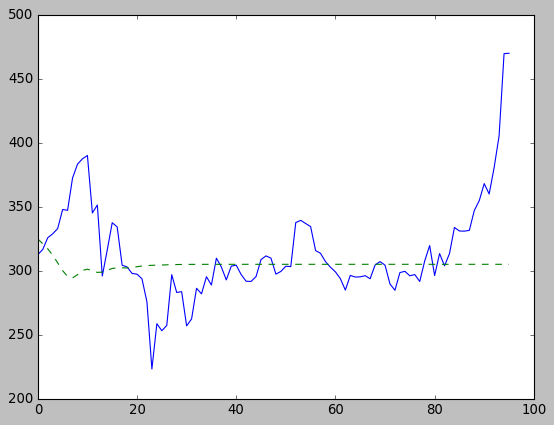

In [24]:
plt.plot(range(96), labels_test, '-')
plt.plot(range(96), results_arr, '--')

In [25]:
labels_pred = model.predict(features_test)

In [26]:
labels_pred.shape, labels_test.shape

((96, 1), (96,))

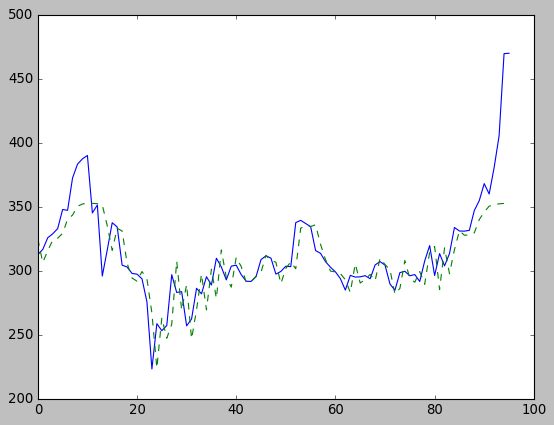

In [28]:
plt.plot(range(96), labels_test, '-')
plt.plot(range(96), labels_pred, '--')